## Data Sci Eng Methods
## Assignment 3 – Model Interpretability 
## **Model Interpretability** 

#### Abstract

##### In this notebook we interpret the models based on the following tasks:

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

## Data Description

##### 1. hotel : Hotel(There is only two categories one is resort hotel and other is city hotel)

##### 2. is_canceled : The value represents 1 if the booking is canceled or it represents 0 .

##### 3. lead_time :It is the number of days between the time a guest books their room and the time they are scheduled to arive at the hotel.

##### 4. arrival_date_year : It indicates the year in which the guest will arrive to the hotel.

##### 5. arrival_date_month : It indicates the month in which guest will arrive to the hotel.

##### 6. arrival_date_week_number : This indicates the week number in which the guest will arrive to the hotel

##### 7. arrival_date_day_of_month : This indicates the day of the month in which the guest will arrive to the hotel.

##### 8. stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

##### 9. stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

##### 10. adults : Number of adults

##### 11. children : Number of children

##### 12. babies : Number of babies

##### 13. meal : Type of meal booked . Categories are presented in standard hospitality meal packages:

##### (BB:"Bed & Breakfast"; HB:"Bed,Breakfast & Dinner ; FB: "Bed & All meals(Breakfast,Lunch & Dinner)

##### 14. country : Country of origin.

##### 15. market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

##### 16. distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

##### 17. is_repeated_guest : The value represents 1 if the booking name was from a repeated guest or it represents 0 .

##### 18 .previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

##### 19. previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

##### 20. reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

##### 21. assigned_room_type : Code for the type of room assigned to the booking.

##### 22. booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

##### 23. deposit_type : Indication on if the customer made a deposit to guarantee the booking.

##### 24. agent : ID of the travel agency that made the booking

##### 25. company : ID of the company/entity that made the booking or responsible for paying the booking.

##### 26. days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

##### 27. customer_type : Type of booking, assuming one of four categories

##### 28. adr : Average Daily Rate (ADR) measures the average rental revenue earned for an occupied room per day .

##### "The operating performance of a hotel or other lodging business can be determined by using the ADR."

##### 29. required_car_parking_spaces : Number of car parking spaces required by the customer

##### 30. total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

##### 31. reservation_status : Reservation last status, assuming one of three categories

##### Canceled – booking was canceled by the customer

##### Check-Out – customer has checked in but already departed

##### No-Show – customer did not check-in and did inform the hotel of the reason why

##### 32. reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to  understand when was the booking canceled or when did the customer checked-out of the hotel

## Installing packages and Importing required Libraries

In [1]:
# Installing packages
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install shap
!pip install probatus==1.7.0
!pip install xgboost
!pip install pydot
!pip install graphviz


!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import libraries
# Use pip install or conda install if missing a library
import warnings
warnings.filterwarnings('ignore')
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydot
import graphviz
import matplotlib.image as mpimg
from sklearn.inspection import plot_partial_dependence

# MAE
from sklearn.metrics import mean_absolute_error

# SHAP
import shap
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Reading CSV file into Pandas DataFrame
data=pd.read_csv("https://raw.githubusercontent.com/namandiwan10/data-science-assignments/main/hotel_bookings.csv")

In [4]:
# Showing the data head
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [5]:
# Getting info on data telling count, datatypes and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Getting the mean, standard deviation, max, min etc on the data
data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [7]:
# Getting rows and columns for the dataset
data.shape

(119390, 32)

In [8]:
# Cheking what features are null
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
# calculate the percentage of missing values for each column
missing_values_percentage = (data.isnull().sum() / data.shape[0]) * 100

# print the columns with missing values and their percentage
print(missing_values_percentage[missing_values_percentage > 0])

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


In [10]:
#lets create a fuction that returns the percentage of missing values(null) = (sum of null rows)*100/ (total number of rows)
def percent_missing(data):
    percent_nan = 100* data.isnull().sum() / len(data)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [11]:
#dropping company column since 94% rows are missing
data = data.drop(['company'],axis=1)

In [12]:
#dropping company column since 14% rows are missing
data = data.drop("agent", axis=1)

In [13]:
#dropping company column since 0.003% rows are missing
data[data['children'].isnull()]

hotel  is_canceled  lead_time  arrival_date_year  \
40600  City Hotel            1          2               2015   
40667  City Hotel            1          1               2015   
40679  City Hotel            1          1               2015   
41160  City Hotel            1          8               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40600             August                        32                          3   
40667             August                        32                          5   
40679             August                        32                          5   
41160             August                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40600                        1                     0       2  ...   
40667                        0                     2       2  ...   
40679                        0                     2       3  ...   
41160                        2                     5       2  ...   

       assigned_room_type  booking_changes deposit_type days_in_waiting_list  \
40600                   B                0   No Deposit                    0   
40667                   B                0   No Deposit                    0   
40679                   B                0   No Deposit                    0   
41160                   B                0   No Deposit                    0   

         customer_type   adr  required_car_parking_spaces  \
40600  Transient-Party  12.0                            0   
40667  Transient-Party  12.0                            0   
40679  Transient-Party  18.0                            0   
41160  Transient-Party  76.5                            0   

       total_of_special_requests  reservation_status reservation_status_date  
40600                          1            Canceled              2015-08-01  
40667                          1            Canceled              2015-08-04  
40679                          2            Canceled              2015-08-04  
41160                          1            Canceled              2015-08-09  

[4 rows x 30 columns]

In [14]:
#dropping company column since 0.40% rows are missing
data[data['country'].isnull()]

hotel  is_canceled  lead_time  arrival_date_year  \
30      Resort Hotel            0        118               2015   
4127    Resort Hotel            1          0               2016   
7092    Resort Hotel            1          8               2016   
7860    Resort Hotel            1         39               2016   
8779    Resort Hotel            1          0               2016   
...              ...          ...        ...                ...   
65908     City Hotel            1          0               2017   
65909     City Hotel            1          0               2017   
65910     City Hotel            1          0               2017   
80830     City Hotel            0          4               2015   
101488    City Hotel            0          1               2016   

       arrival_date_month  arrival_date_week_number  \
30                   July                        27   
4127             February                         8   
7092                 July                        30   
7860               August                        36   
8779              October                        42   
...                   ...                       ...   
65908               April                        15   
65909               April                        15   
65910               April                        15   
80830            November                        48   
101488           November                        47   

        arrival_date_day_of_month  stays_in_weekend_nights  \
30                              1                        4   
4127                           15                        0   
7092                           21                        0   
7860                           30                        0   
8779                           13                        0   
...                           ...                      ...   
65908                          10                        0   
65909                          10                        0   
65910                          10                        0   
80830                          23                        1   
101488                         13                        2   

        stays_in_week_nights  adults  ...  assigned_room_type  \
30                        10       1  ...                   A   
4127                       0       0  ...                   P   
7092                       1       1  ...                   A   
7860                       5       2  ...                   A   
8779                       1       1  ...                   A   
...                      ...     ...  ...                 ...   
65908                      0       0  ...                   P   
65909                      0       0  ...                   P   
65910                      0       0  ...                   P   
80830                      2       1  ...                   A   
101488                     2       2  ...                   A   

        booking_changes deposit_type days_in_waiting_list    customer_type  \
30                    2   No Deposit                    0        Transient   
4127                  0   No Deposit                    0        Transient   
7092                  0   No Deposit                    0        Transient   
7860                  0   No Deposit                    0        Transient   
8779                  0   No Deposit                    0        Transient   
...                 ...          ...                  ...              ...   
65908                 0   No Deposit                    0        Transient   
65909                 0   No Deposit                    0        Transient   
65910                 0   No Deposit                    0        Transient   
80830                 0   No Deposit                    0  Transient-Party   
101488                0   No Deposit                    0            Group   

          adr  required_car_parking_spaces  total_of_special_requests  \
30       62.0

In [15]:
# dropping country and choldren column
data.dropna(subset=["children","country"],inplace=True)

In [16]:
# removed all the features with null values
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
# Hot-encoding technique to convert categorical data into numerical data so that we can train the model for regression techniques
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
string_columns = data[['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type'
                      ,'deposit_type','customer_type','reservation_status','reservation_status_date']]

encoded_columns = string_columns.apply(encoder.fit_transform)

# Replace the original columns with the encoded columns
data[['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type'
                      ,'deposit_type','customer_type','reservation_status','reservation_status_date']] = encoded_columns

#### As there are no null or missing values present, we can proceed to model training.

### Training model on data set
### 1. Logistic Regression
Logistic regression is a statistical method used for predicting the probability of a binary outcome (i.e., whether an event occurs or not) based on one or more predictor variables. It is commonly used in data science for classification problems, where the goal is to classify a set of observations into one of two or more classes.

The basic idea behind logistic regression is to use a linear model to predict the log-odds of the binary outcome, and then apply a sigmoid function to convert these log-odds into probabilities. The resulting model can be interpreted as the probability of the binary outcome given the values of the predictor variables.

Logistic regression is a simple and powerful algorithm that can be used for a wide variety of classification problems, such as spam detection, fraud detection, and customer churn prediction. It is also easy to interpret, which makes it a popular choice for many data science applications.
#### Preprating Test and Train Data
Taking all the predictor variables in dataframe X and target variable on dataframe y. Here, we aere using a standard split of 80,20 to split the training and test datasets

In [18]:
X = data.drop("is_canceled", axis = 1)
y = data["is_canceled"]

# Create the X_train and y_train
X_train = data.drop("is_canceled", axis = 1)
y_train = data["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train.shape, X_test.shape

np.random.seed(42);

## Fitting a Linear Model

In [19]:
# Fit the model and calculate the score
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.9888141295206055

In [20]:
# Calculate the MAE
y_preds = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.011185870479394448

In [21]:
#OLS model Library
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('is_canceled ~ hotel + lead_time + arrival_date_year + arrival_date_month + arrival_date_week_number + arrival_date_day_of_month + stays_in_weekend_nights + stays_in_week_nights + adults + children + babies + meal + country + market_segment + distribution_channel + is_repeated_guest + previous_cancellations + previous_bookings_not_canceled + reserved_room_type + assigned_room_type + booking_changes + deposit_type + days_in_waiting_list + customer_type + adr + required_car_parking_spaces + total_of_special_requests + reservation_status + reservation_status_date', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            is_canceled   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 2.346e+04
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:33:38   Log-Likelihood:                 31068.
No. Observations:              118898   AIC:                        -6.208e+04
Df Residuals:                  118868   BIC:                        -6.179e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       -444.6557      9.166    -48.511      0.000    -462.621    -426.690
hotel                             -0.0187      0.001    -14.158      0.000      -0.021      -0.016
lead_time                         -0.0001   6.89e-06    -16.850      0.000      -0.000      -0.000
arrival_date_year                  0.2211      0.005     48.603      0.000       0.212       0.230
arrival_date_month                -0.0005      0.000     -3.241      0.001      -0.001      -0.000
arrival_date_week_number           0.0039   9.87e-05     39.579      0.000       0.004       0.004
arrival_date_day_of_month          0.0004   6.19e-05      5.686      0.000       0.000       0.000
stays_in_weekend_nights            0.0078      0.001     12.223      0.000       0.007       0.009
stays_in_week_nights               0.0029      0.000      8.386      0.000       0.002       0.004
adults                            -0.0028      0.001     -2.735      0.006      -0.005      -0.001
children                           0.0063      0.002      4.150      0.000       0.003       0.009
babies                            -0.0007      0.006     -0.126      0.899      -0.012       0.010
meal                               0.0003      0.001      0.532      0.595      -0.001       0.001
country                            0.0005   1.37e-05     38.247      0.000       0.000       0.001
market_segment                     0.0132      0.001     16.420      0.000       0.012       0.015
distribution_channel              -0.0091      0.001     -8.490      0.000      -0.011      -0.007
is_repeated_guest                 -0.0147      0.004     -4.142      0.000      -0.022      -0.008
previous_cancellations             0.0038      0.001      5.705      0.000       0.002       0.005
previous_bookings_not_canceled    -0.0015      0.000     -3.778      0.000      -0.002      -0.001
reserved_room_type                 0.0068      0.001     11.297      0.000       0.006       0.008
assigned_room_type                -0.0067      0.001    -12.780      0.000      -0.008      -0.006
booking_changes                   -0.0067      0.001     -7.822      0.000      -0.008      -0.005
deposit_type                       0.0365      0.002     16.323      0.000       0.032       0.041
days_in_waiting_list           -1.678e-05   3.17e-05     -0.530      0.596   -7.88e-05    4.53e-05
customer_type                      0.0025      0.001      2.455      0.014       0.001       0.004
adr                             5.789e-05   1.33e-05      4.340      0.000    3.17e-05     8.4e-05
required_car_parking_spaces       -0.0569      0.002    -24.395      0.000      -0.062      -0.052
total_of_special_requests         -0.0143      0.001    -18.681      0.000      -0.016      -0.013
reservation_st

## Interpreting Regression Co-efficients

Model Co-efficients

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target increases if the value of co-efficient increases and vice-versa. Whereas the negative values indicates that the value of target increases if the value of co-efficient decreases and vice versa.

As seen in the co-efficient coloumn in the above table

Value for the variable arival_date_year is highest = 0.2211
Followed by deposit_type = 0.0365
High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above arival_date_year and deposit_type seems to be the most important variables to predict target i.e. Hotel Demand.

P-Values

If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

lead_time
hotel
country
market_segment
deposit_type
adr
These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (is_canceled).

Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as 7.898, 72.936 respectively.

Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected
Value between 0 to 2 indicates that there is positive auto correlation detected
Value between 2 to 4 indicates that there is negatibe auto correlation detected
Our model has a DW score of 1.416 which could be interpreted as a positive auto-correlation in the residuals of regression.

Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 25467012.025 which again re-inforces the interpretation we got from Skew and Kurtosis.

## SHAP Summary for Linear Model

Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

1. Each dot(both red and blue) represents a feature of a hotel booking
2. Red color represents high values whereas blue color represents low value
3. If a dot(a feature of wine) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
4. The position of a dot(a feature of wine) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.

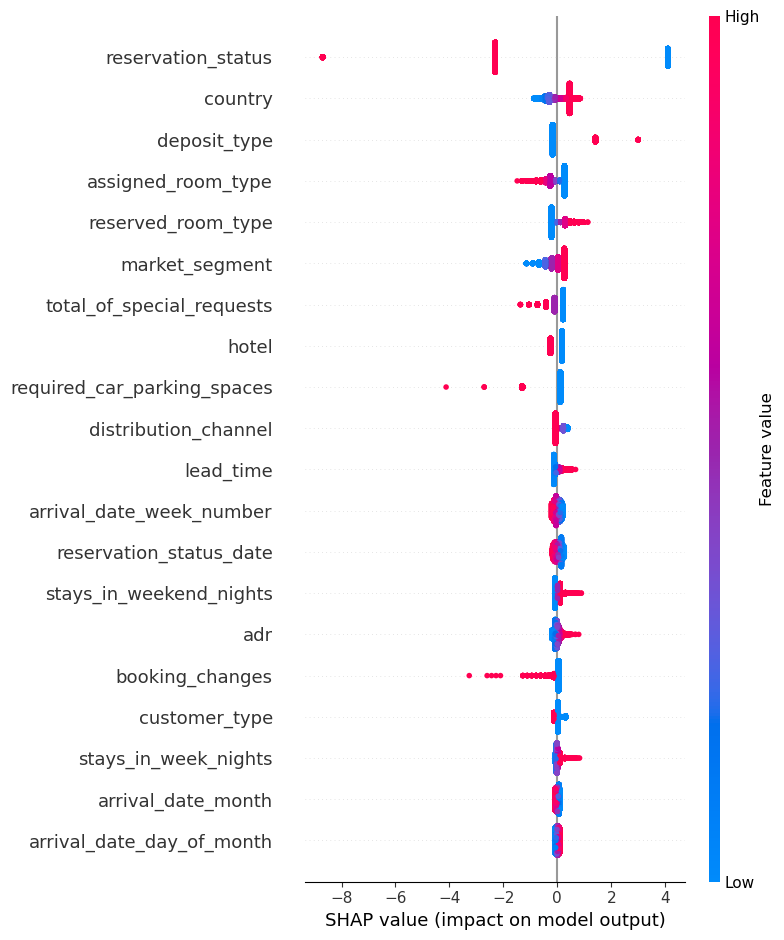

In [22]:
explainer = shap.LinearExplainer(lr_model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## SHAP Analysis for Linear Model

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of reservation status

For the linear model the cross is made at approx E[f(x)] 0.38
So as the reservation status increases the expected value also increases

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 18) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

Permutation explainer: 95119it [13:20, 117.52it/s]                              


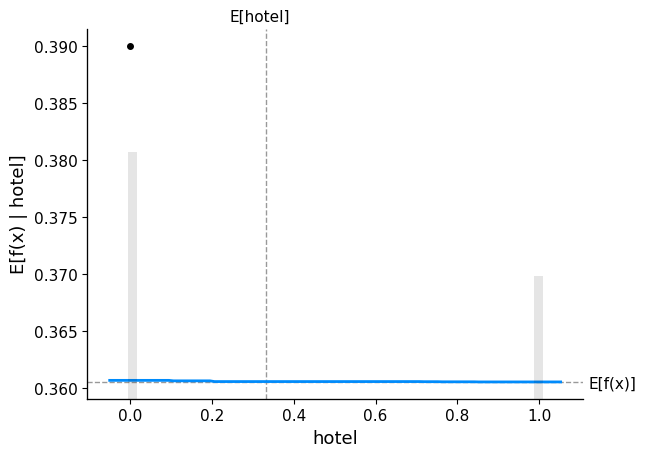

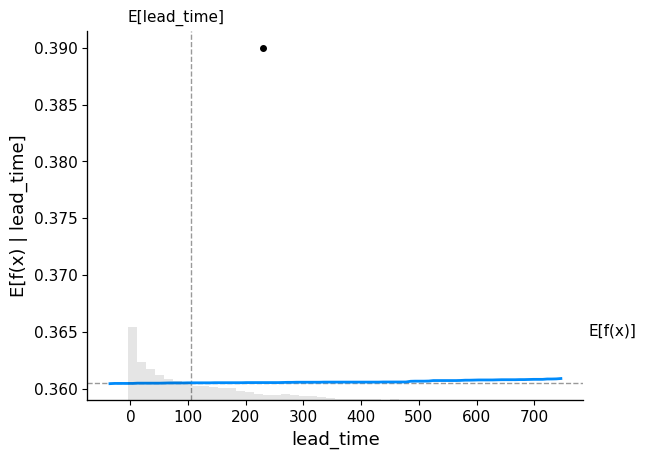

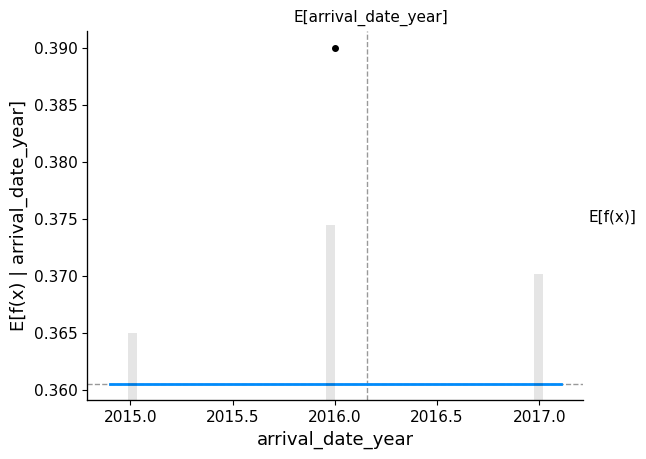

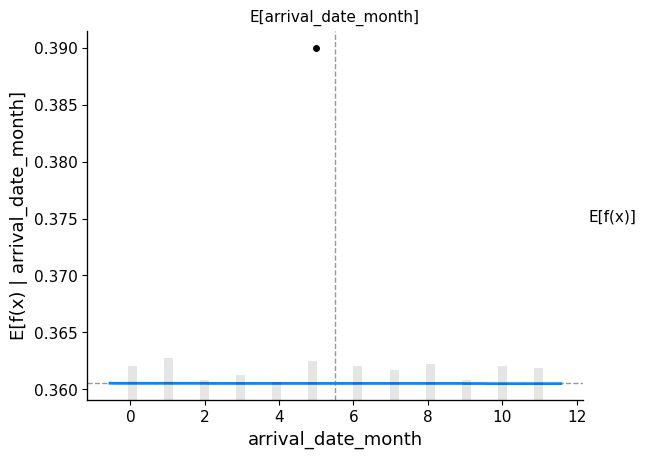

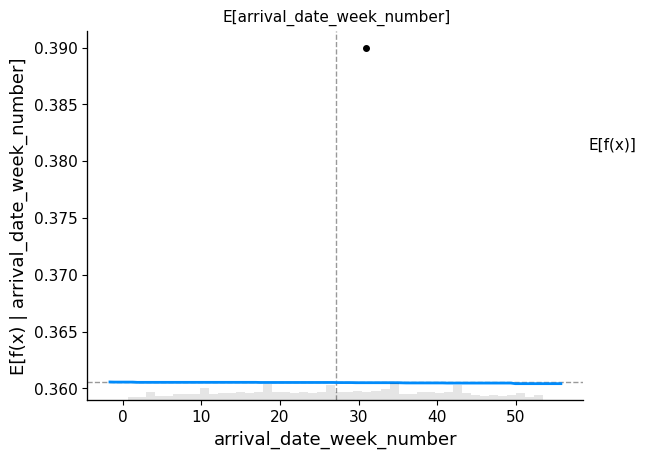

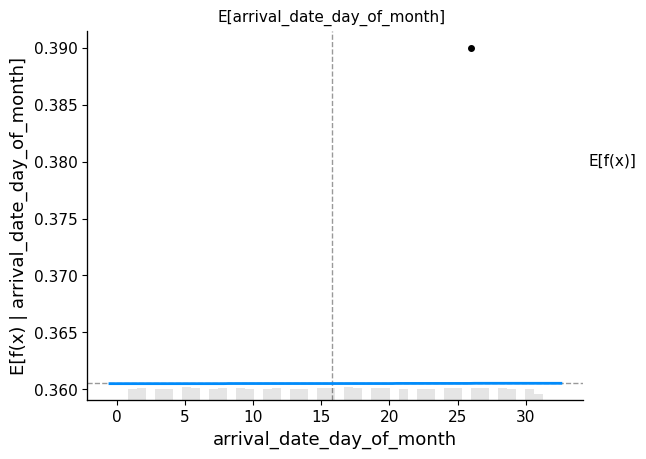

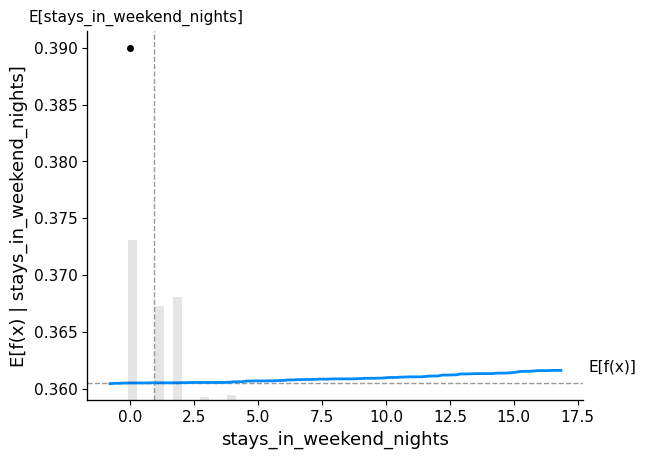

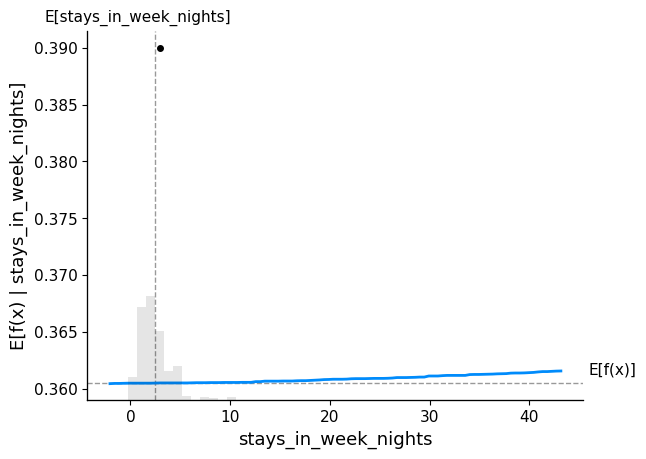

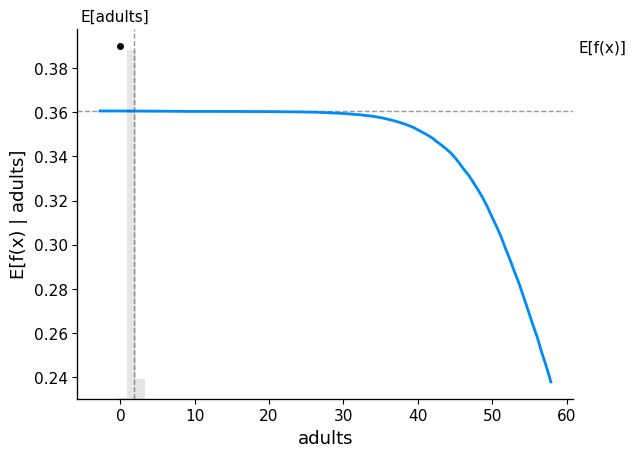

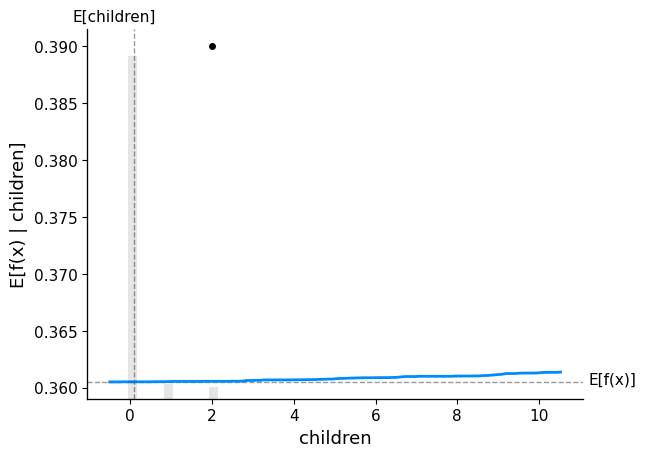

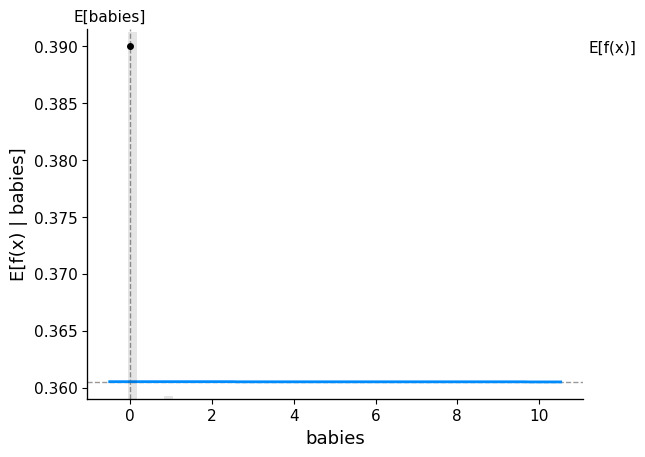

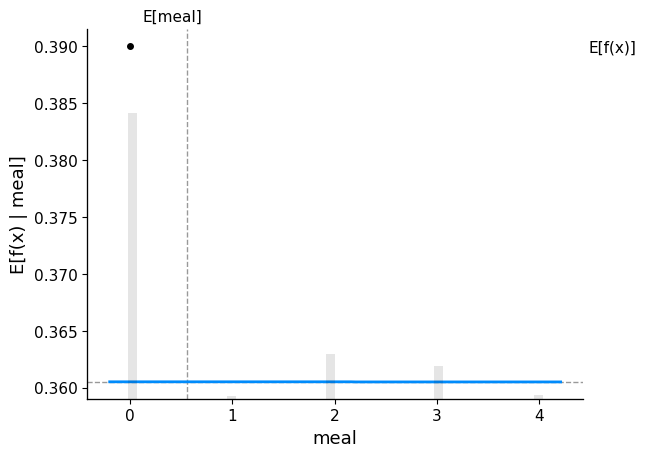

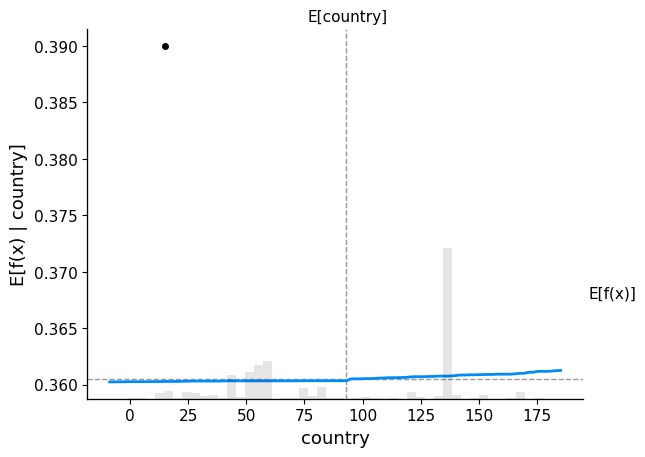

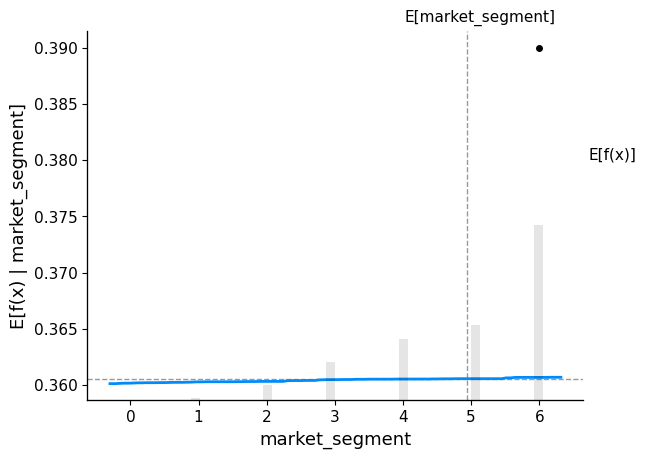

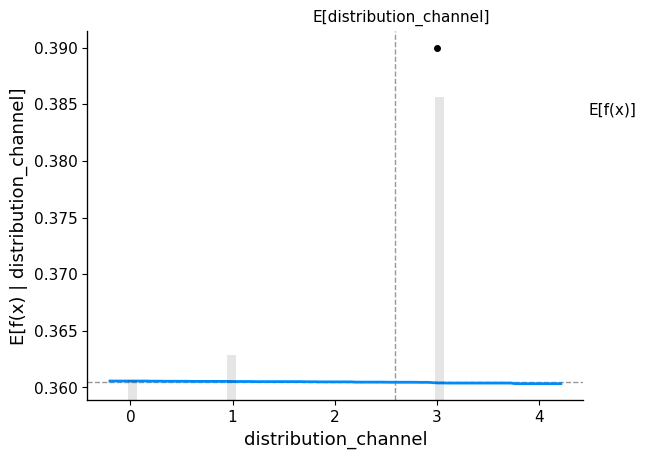

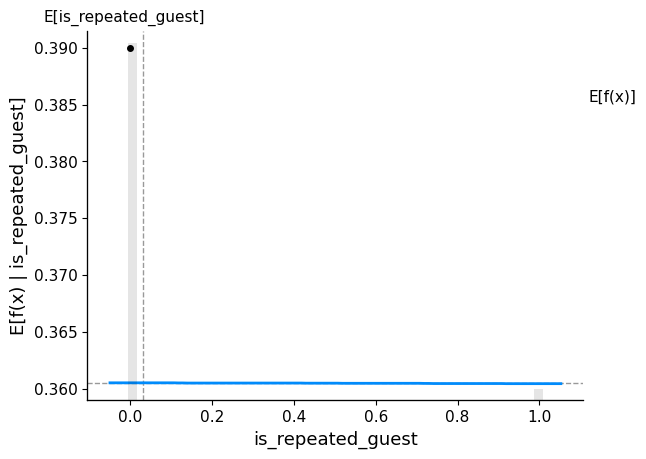

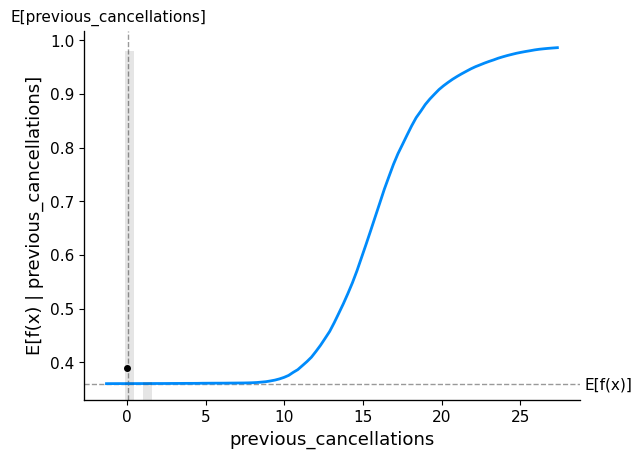

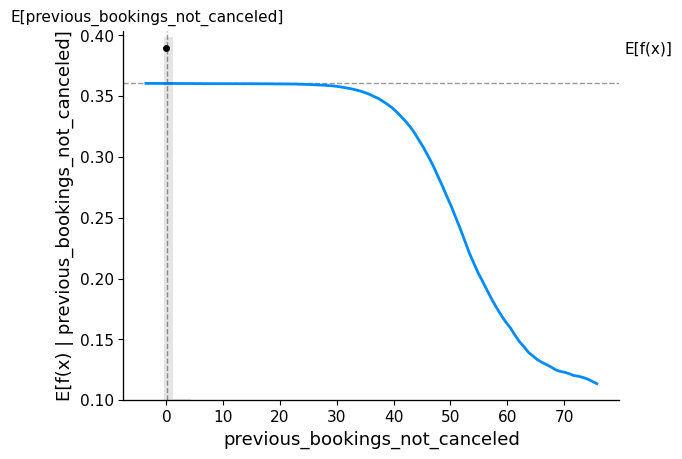

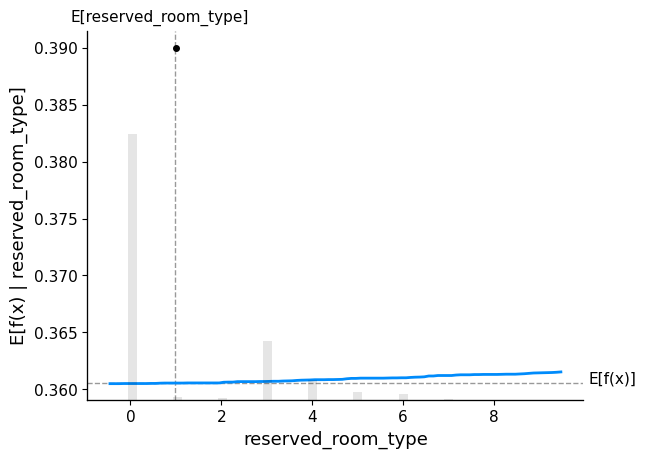

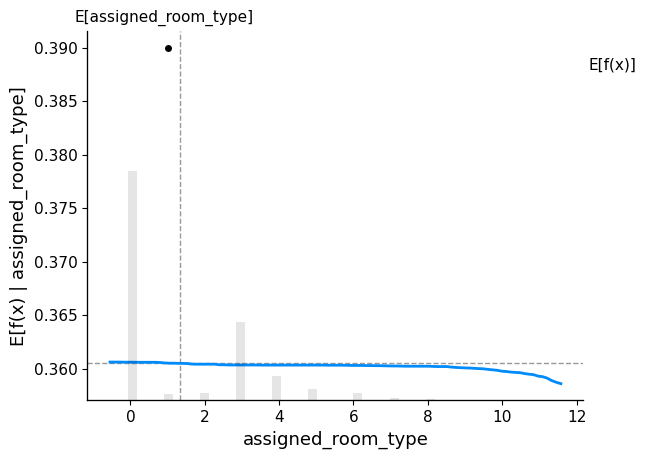

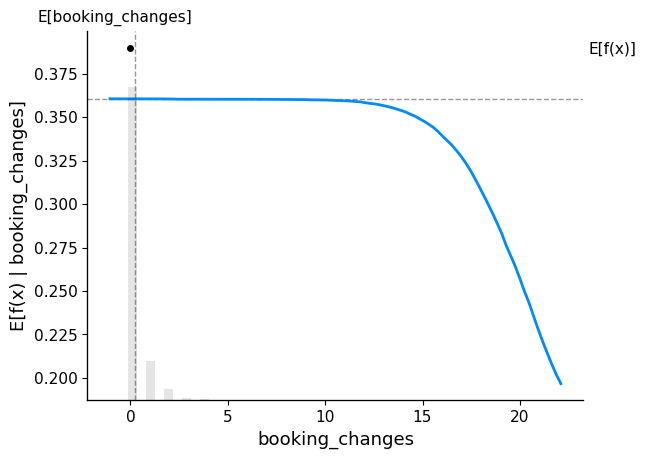

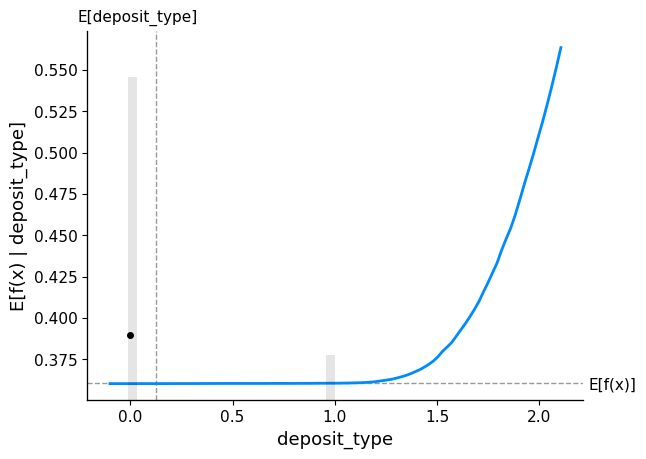

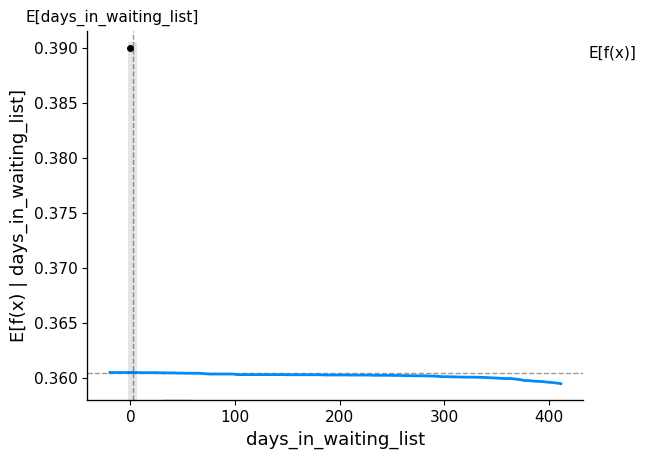

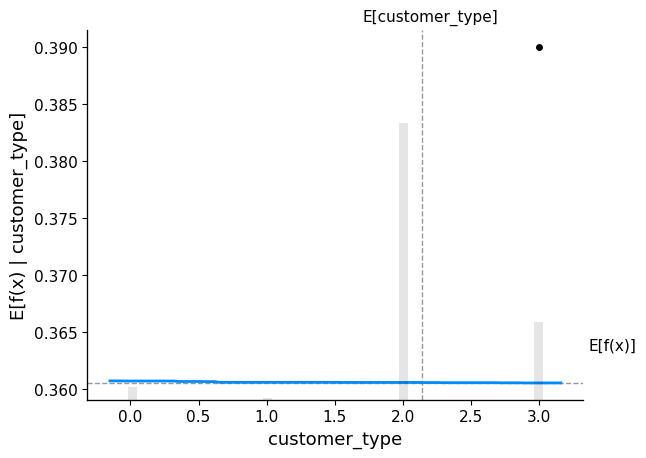

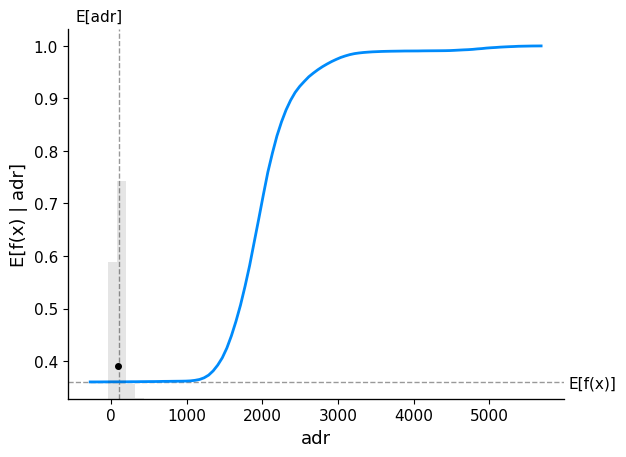

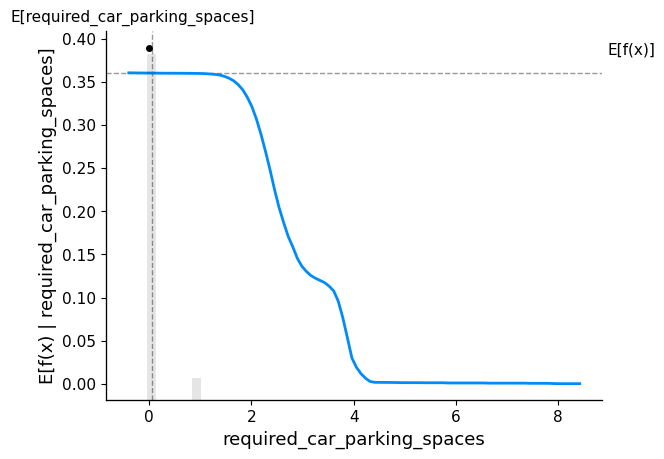

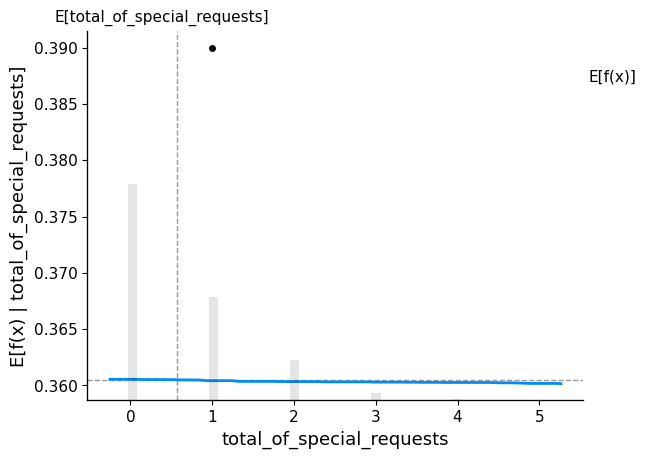

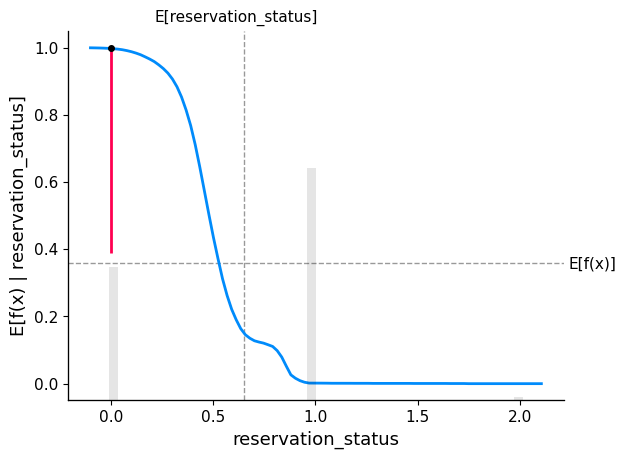

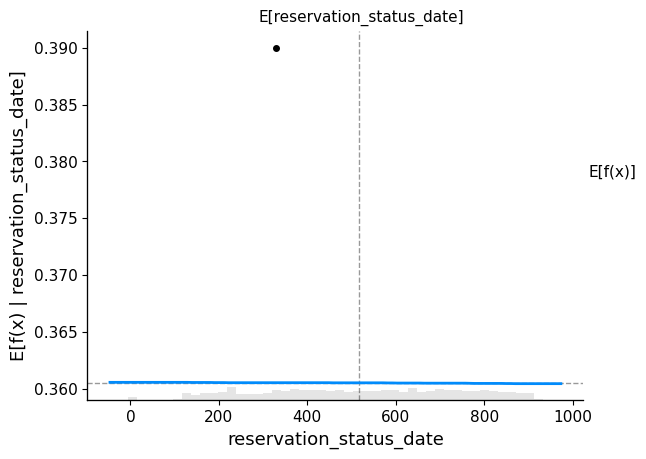

In [23]:
# SHAP explanation of a Linear Model
logistic_explainer = shap.Explainer(lr_model.predict, X_train)
linear_shap_values = logistic_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        lr_model.predict,
        X_train,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

## Interpreting SHAP Feature Importance Plot for Linear model
The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

The following plots are

SHAP feature importance for a linear model
As we can see below in the plots, there is a difference in feature importance for both the models

For the linear model, previous_cancellations is the second most important feature while reservation status is the most important feature

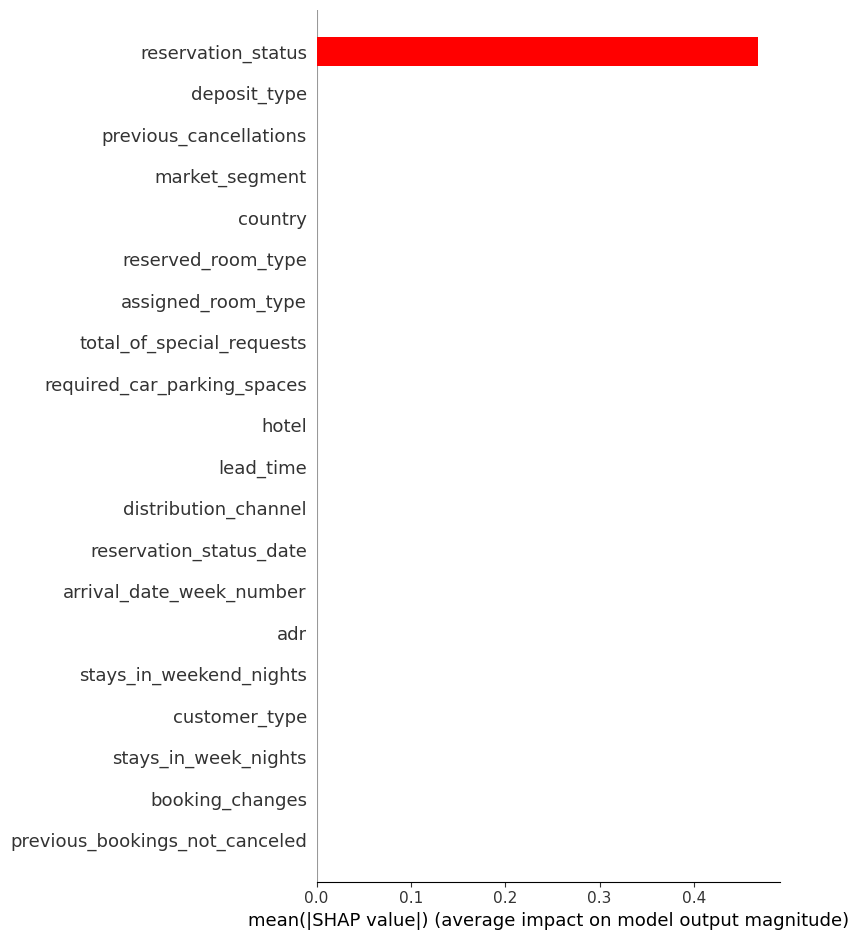

In [24]:
# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, X_train, plot_type="bar", color="red")

## Interpreting Waterfall SHAP visualization

Let's consider the same sample (sample_ind = 18)
Notice the value of reservation_status in the waterfall model is the same as what we have in SHAP partial dependence plot. It says that f(x) = 0.58 is what we got as a model output and the expected output for this sample was 0.42. We came pretty close to determining it as the difference is only 0.16. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that reservation_status has the biggest and most positive impact in increasing hotel booking demand for this specific sample. Using this model we can visually interpret why exactly this specific sample is giving an output of 0.42.

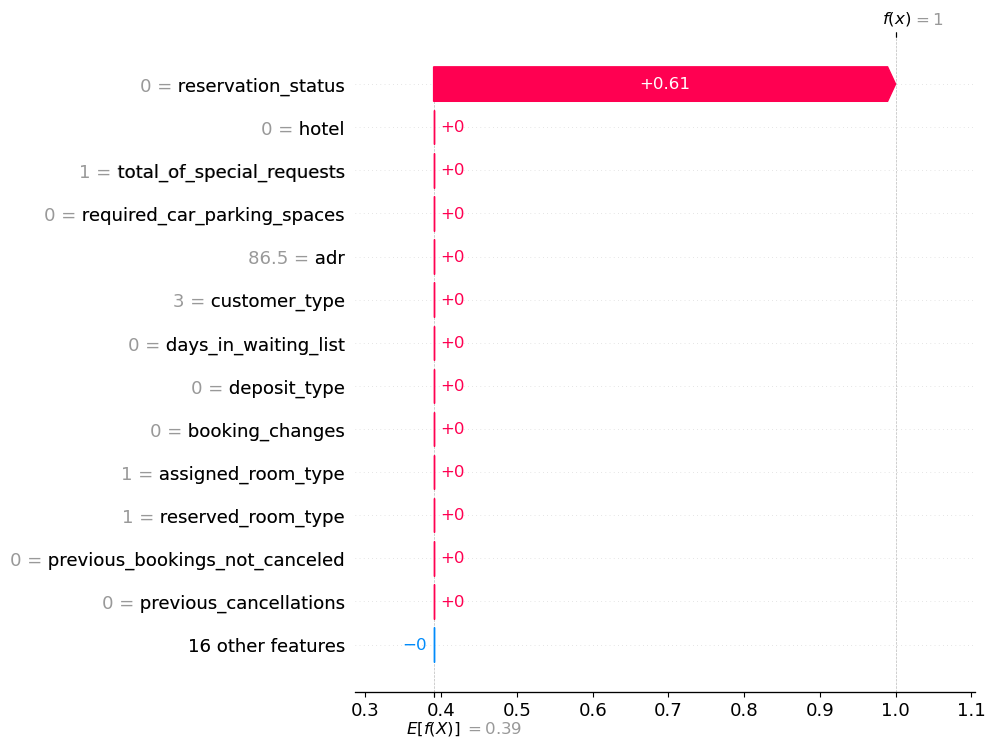

In [25]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

## Interpreting SHAP dependence plot for Linear model
The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear models using the SHAP dependence plot. Here in these graphs, we get a dot for every wine in our dataset.

As we can observe the linear model feature and its SHAP value have a linear relationship. If a feature has a positive impact on the hotel booking demand (is_cancelled) then the relationship will be directly proportional e.g. reservation_status and deposit_type and if the feature harms hotel booking demand the relationship will be inversely proportional. e.g. adr and customer_type.

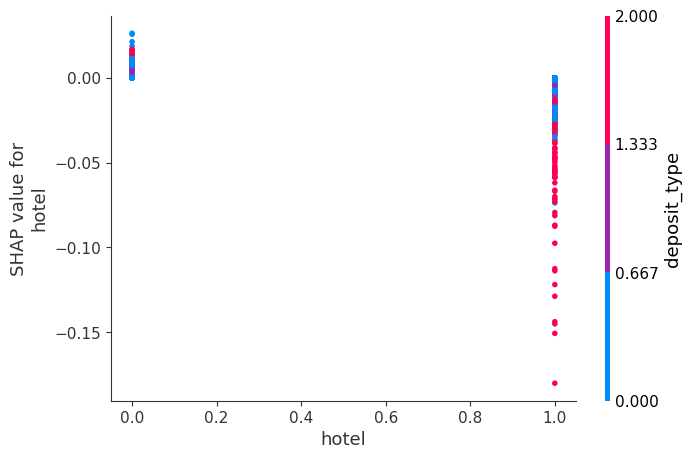

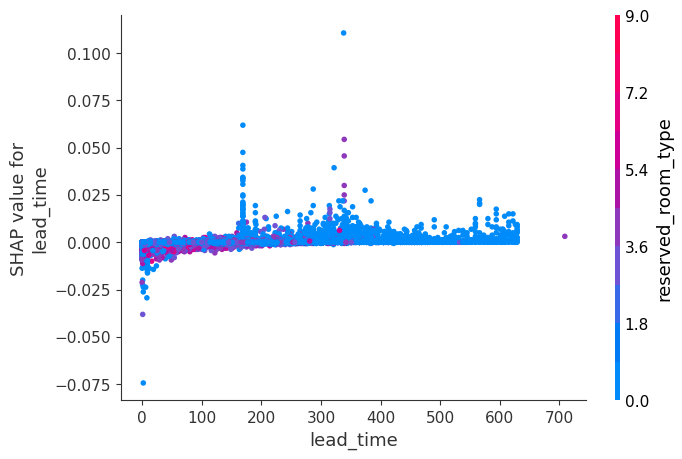

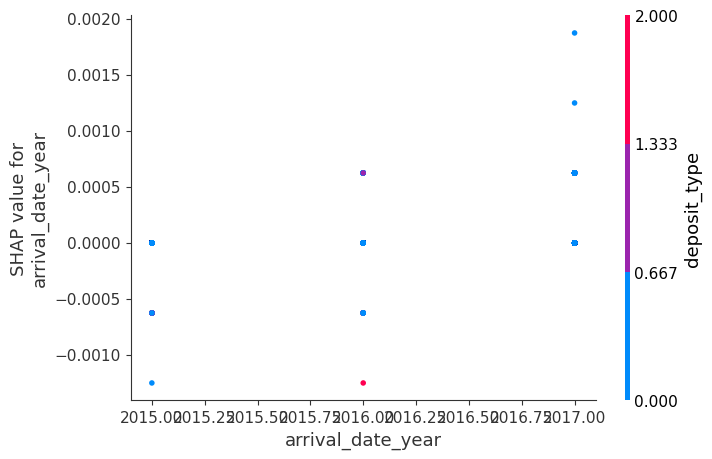

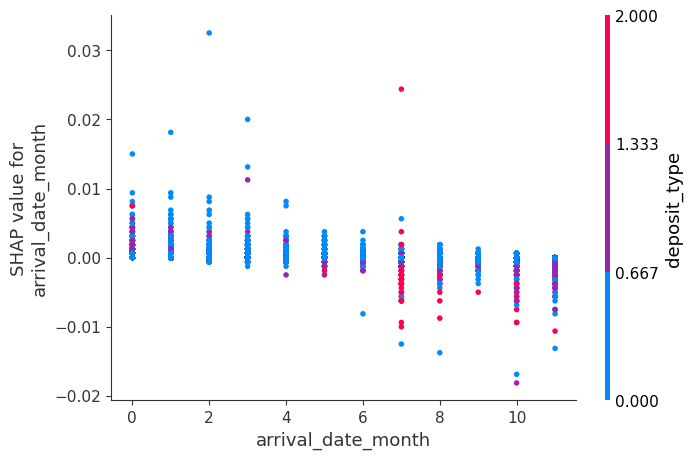

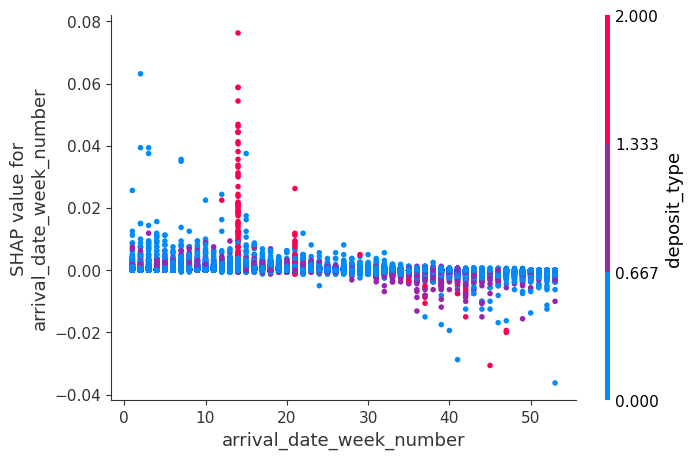

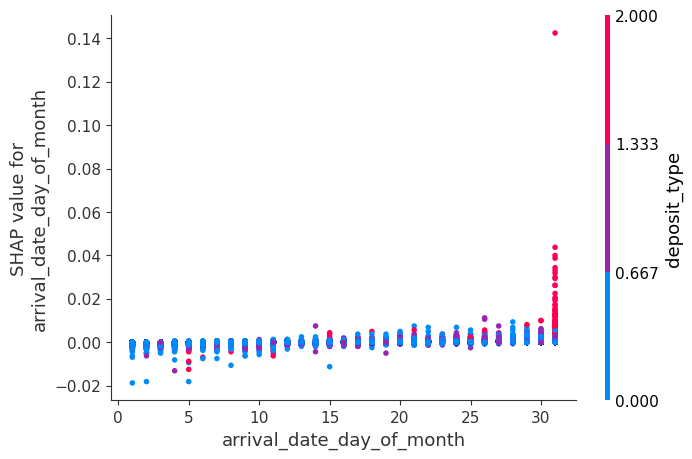

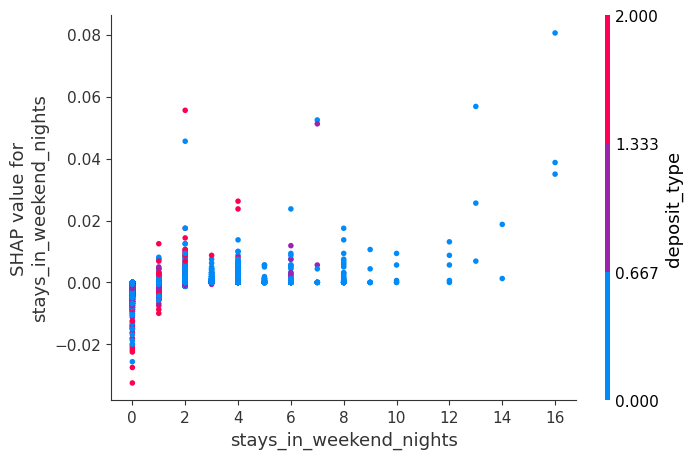

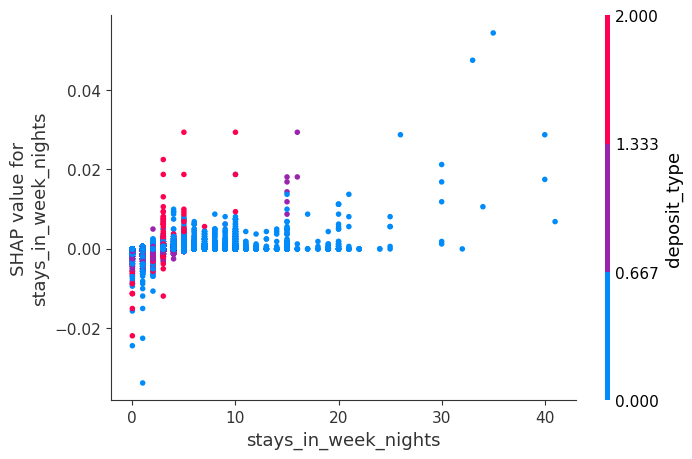

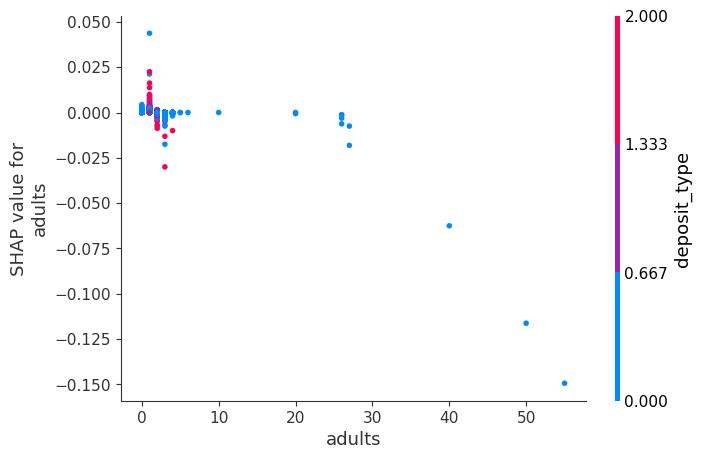

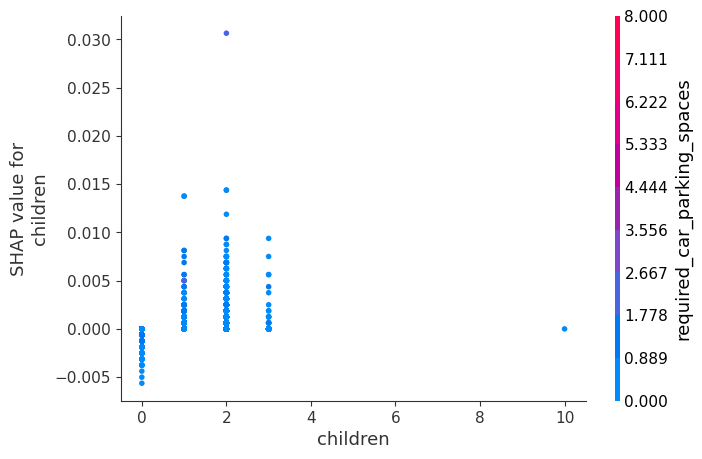

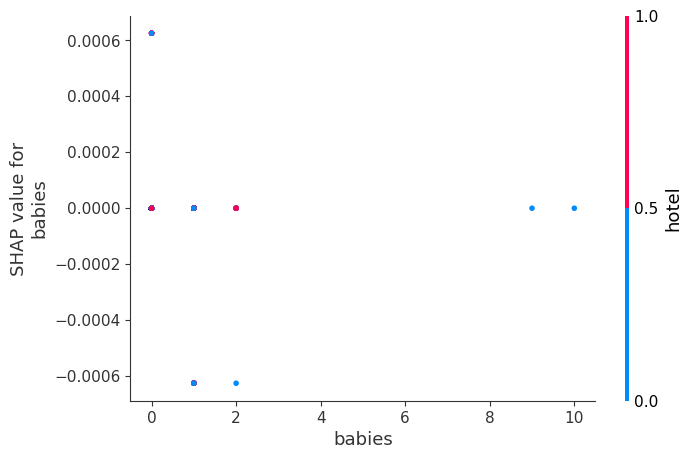

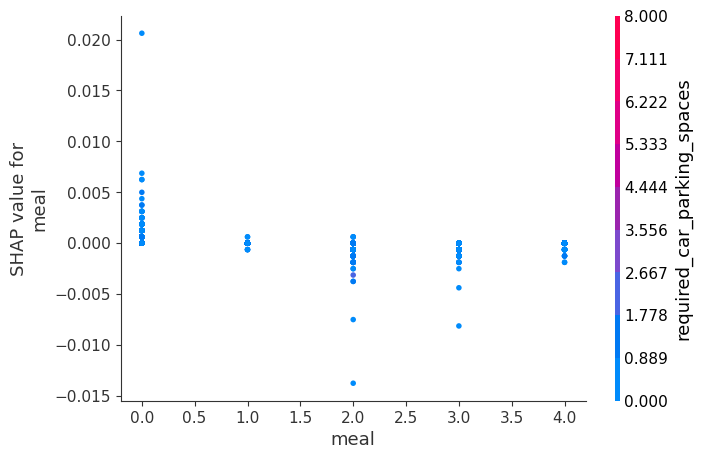

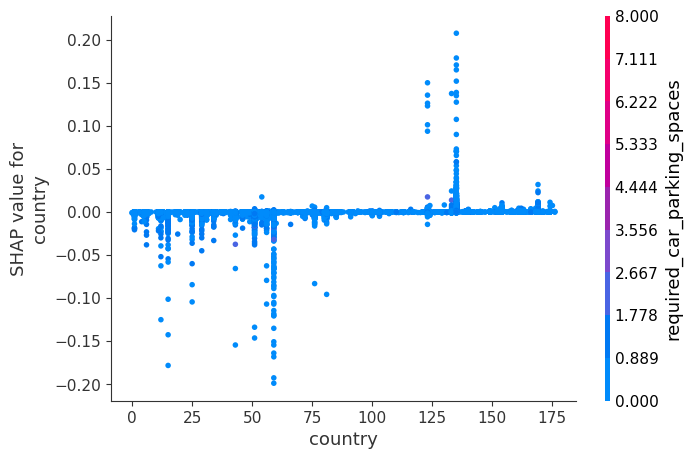

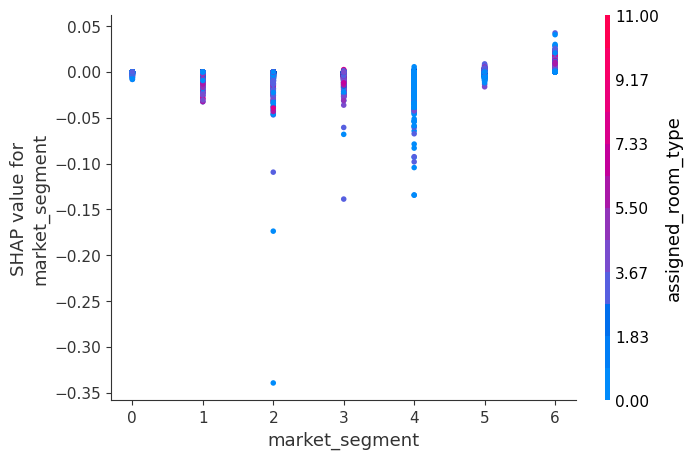

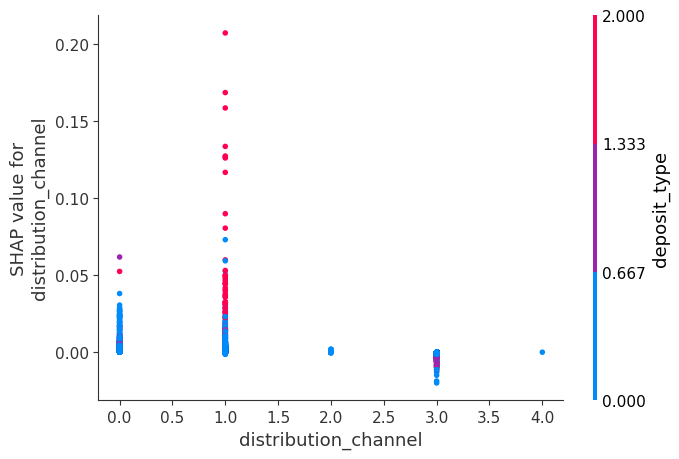

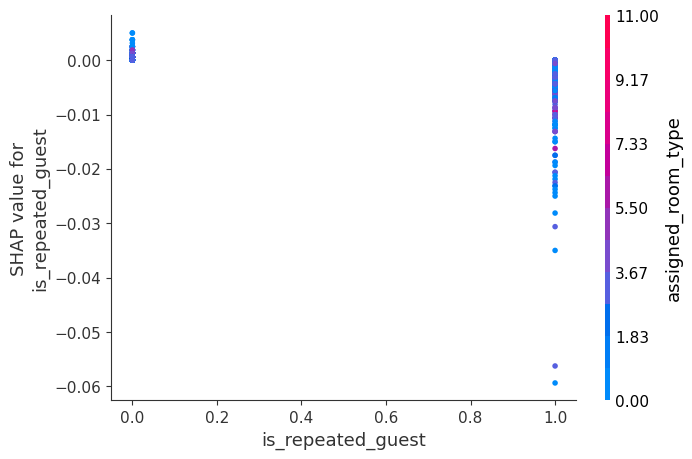

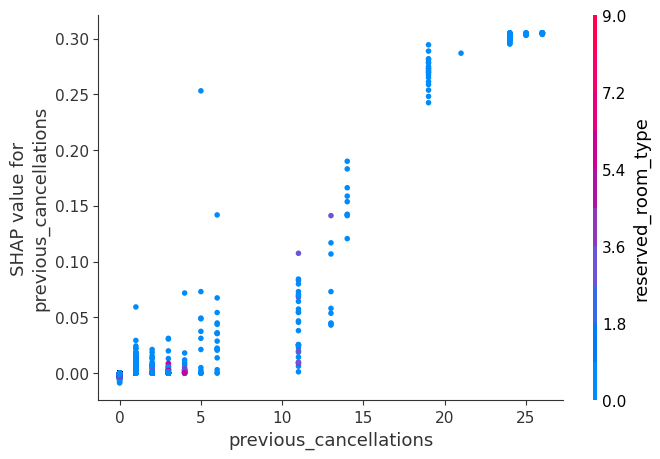

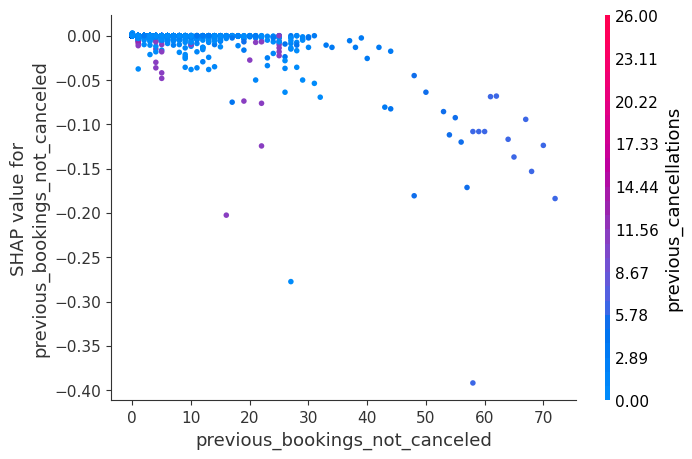

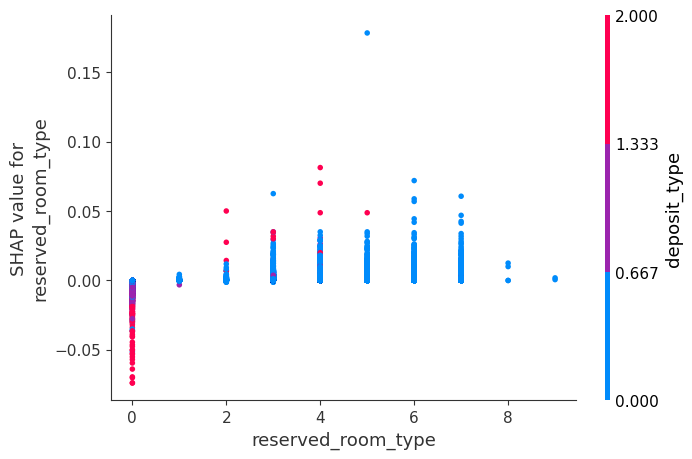

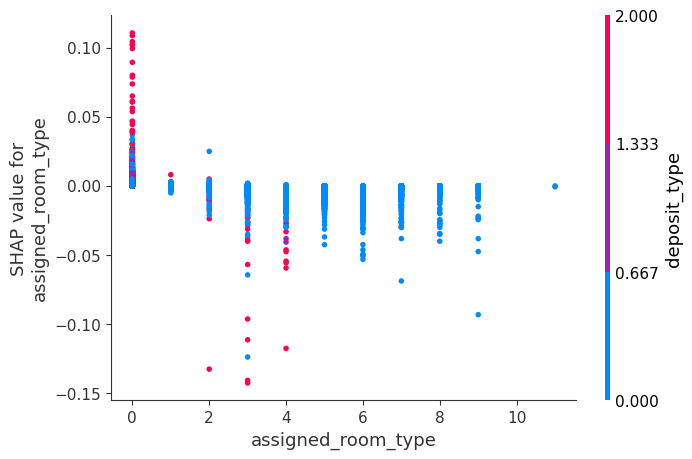

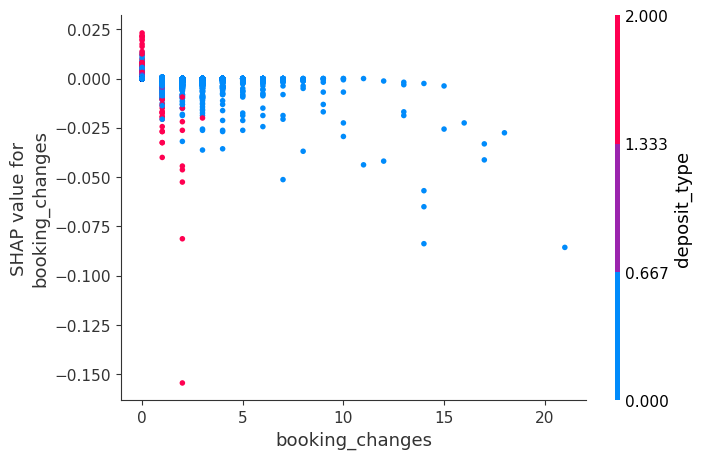

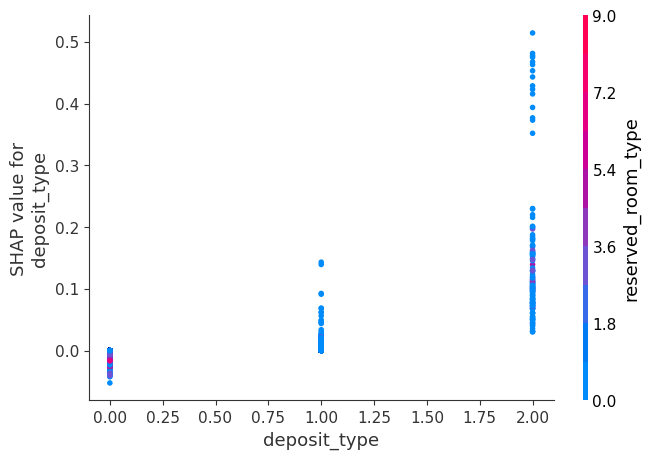

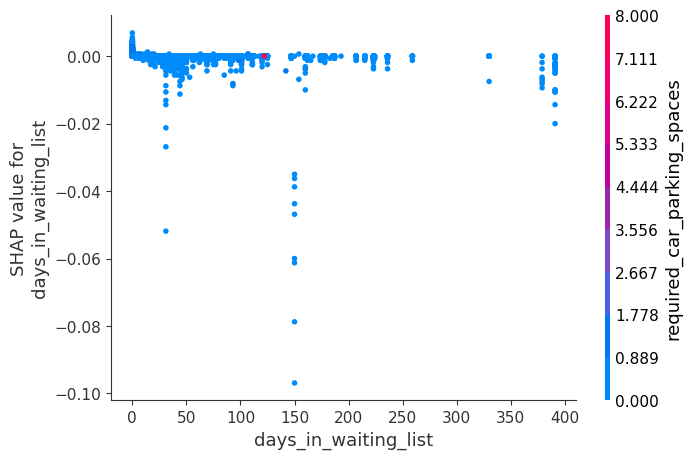

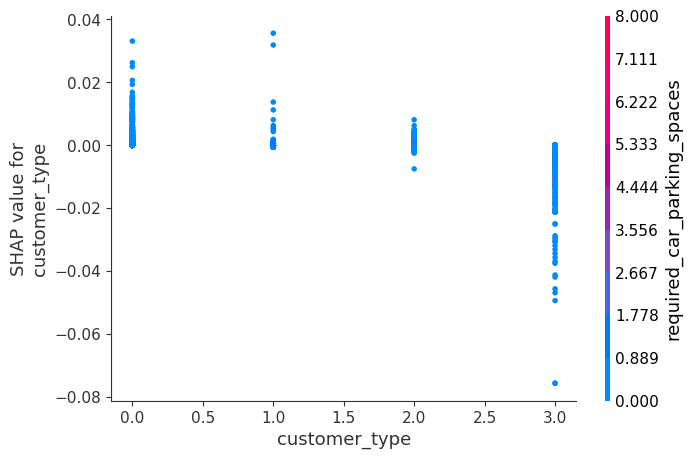

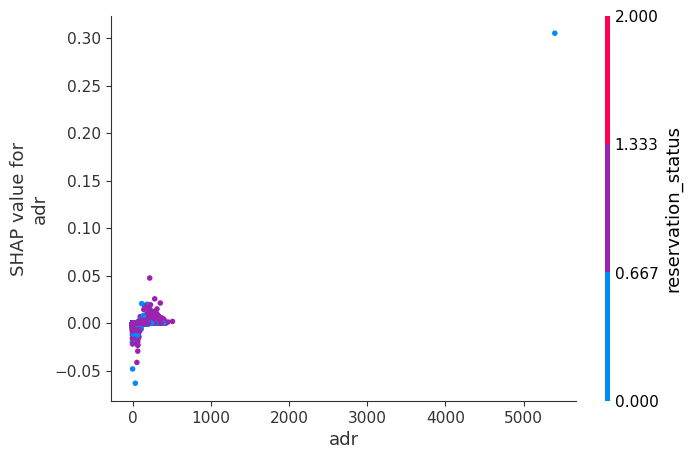

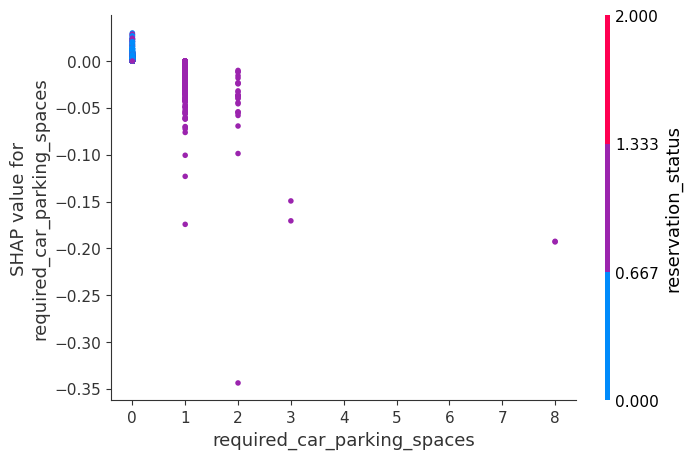

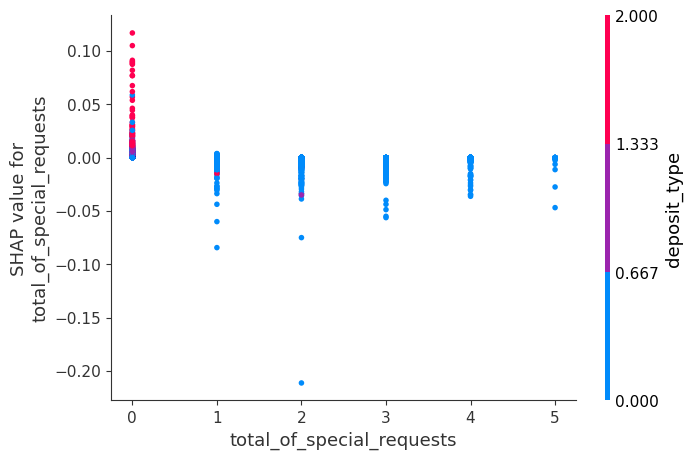

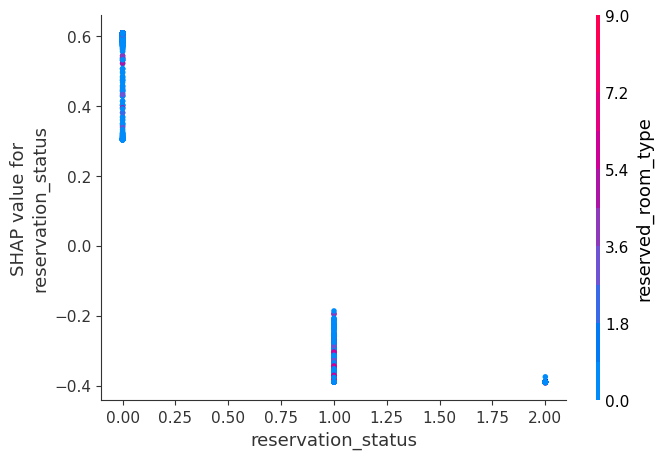

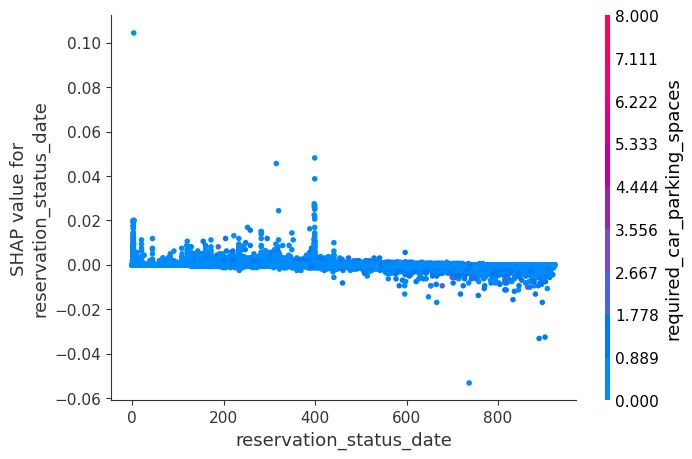

In [26]:
# SHAP partial dependence plot for linear model
for i in X_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, X_train)

## 2. Random Forest Regressor

## Fit Tree Based Model

In [27]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

In [28]:
# Evaluate model
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


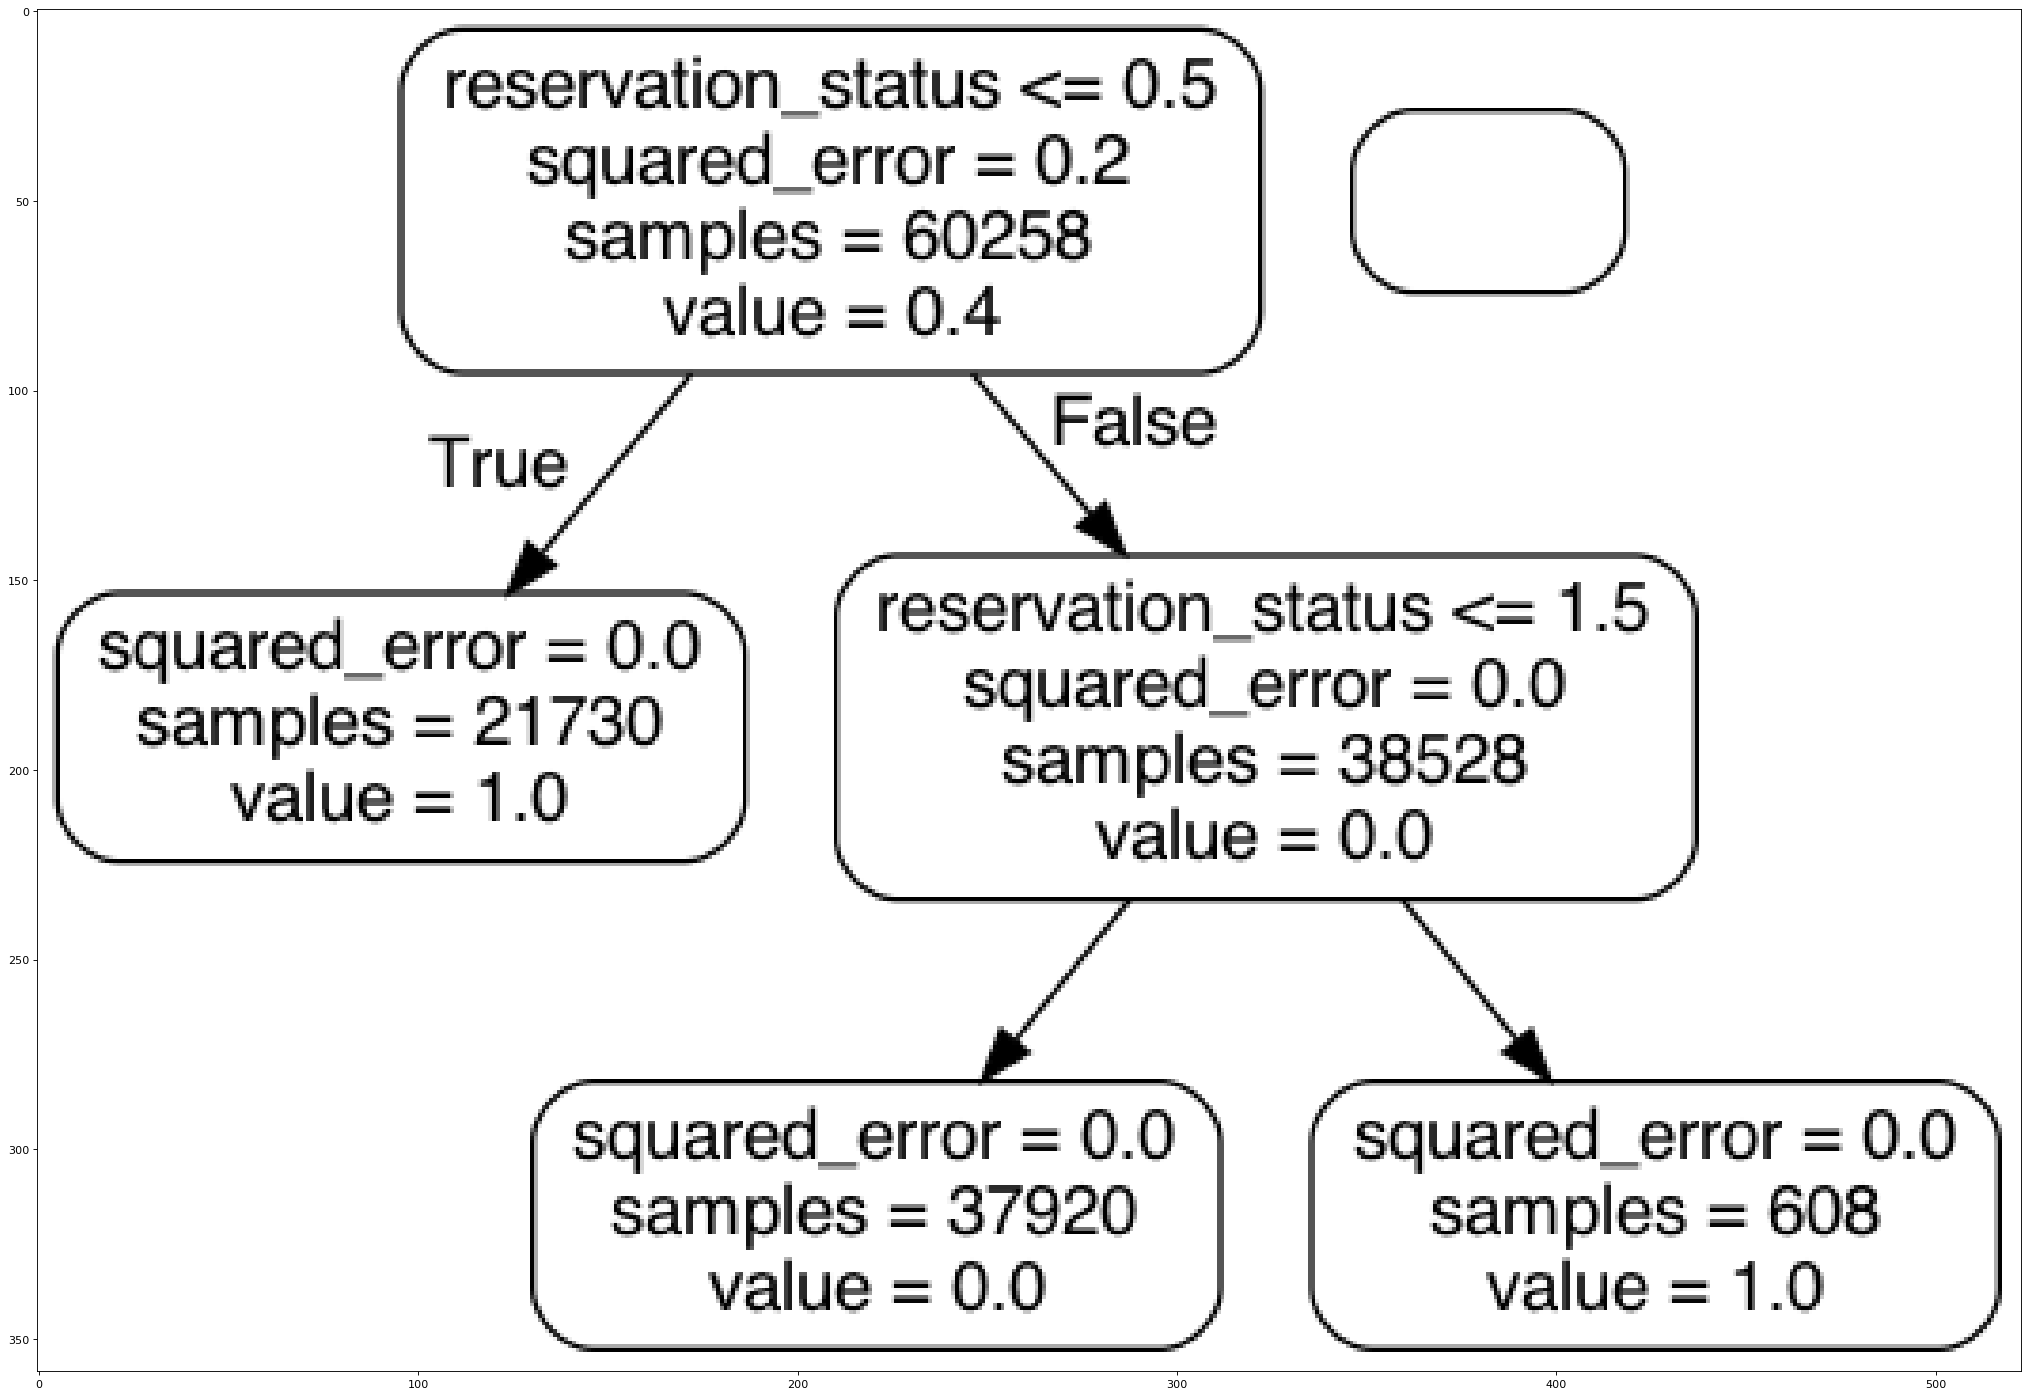

In [29]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(X_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

In [30]:
# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(X_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [31]:
# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: reservation_status   Importance: 1.0
Variable: hotel                Importance: 0.0
Variable: lead_time            Importance: 0.0
Variable: arrival_date_year    Importance: 0.0
Variable: arrival_date_month   Importance: 0.0
Variable: arrival_date_week_number Importance: 0.0
Variable: arrival_date_day_of_month Importance: 0.0
Variable: stays_in_weekend_nights Importance: 0.0
Variable: stays_in_week_nights Importance: 0.0
Variable: adults               Importance: 0.0
Variable: children             Importance: 0.0
Variable: babies               Importance: 0.0
Variable: meal                 Importance: 0.0
Variable: country              Importance: 0.0
Variable: market_segment       Importance: 0.0
Variable: distribution_channel Importance: 0.0
Variable: is_repeated_guest    Importance: 0.0
Variable: previous_cancellations Importance: 0.0
Variable: previous_bookings_not_canceled Importance: 0.0
Variable: reserved_room_type   Importance: 0.0
Variable: assigned_room_type   Impor

## Interpreting Nodes of a Tree-Based Model

Random Forest Regressor works on the concept of the wisdom of the crowd. The above decision tree is one of the many trees involved in predicting the target variable. Each decision tree regression predicts a number as an output for a given input. Random forest regression takes the average of those predictions as its final output.

As usual, the tree has conditions on each internal node and a value associated with each leaf (i.e. the value to be predicted). But additionally, we’ve plotted out the value at each internal node i.e. the mean of the response variables in that region.

In a random forest regressor, each decision tree in the ensemble consists of a series of nodes. Each node represents a question that helps the tree split the data into smaller and more homogeneous subsets based on certain criteria.

The interpretation of a node depends on its position in the tree and the criteria used for the split. The root node is the first node in the tree and represents the entire dataset. The root node splits the dataset into two or more subsets based on the feature that best separates the data based on a selected criterion, such as the Gini impurity or the mean squared error. The feature used for the split and the threshold value for that feature are stored in the node.

The internal nodes in the tree represent further splits of the data based on other features and thresholds, while the leaf nodes represent the final subsets of the data that have been split into homogenous groups.

To interpret a specific node in a random forest decision tree, you need to look at the feature and threshold values stored in that node, as well as its position in the tree. By following the path from the root node to the specific node, you can see how the data has been split at each node and what features were used for those splits.

In general, the deeper a node is in the tree, the more specific the split criteria and the more specialized the subset of data represented by that node. However, it's important to note that in a random forest, the ensemble of trees is used to make predictions rather than relying on any individual tree, so the interpretation of individual nodes may not be as important as understanding the overall behavior of the forest.

## SHAP Analysis for Tree Based Model

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of reservation status

For the tree based model the cross is made at approx E[f(x)] 0.38 So as the reservation status increases the expected value also increases. it was same for the Linear Model.

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 18) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

Permutation explainer: 95119it [1:41:49, 15.45it/s]                             


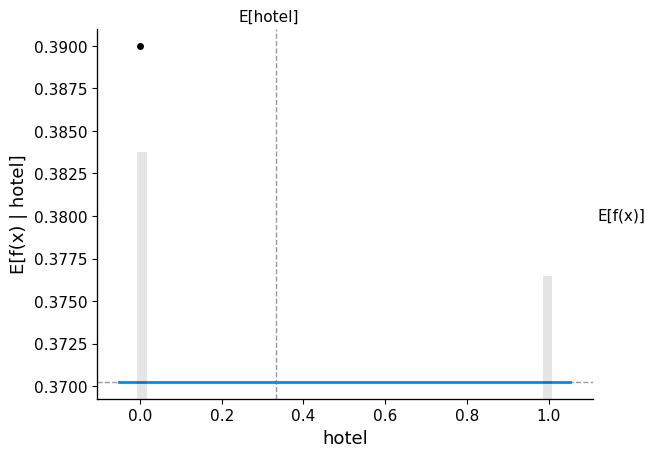

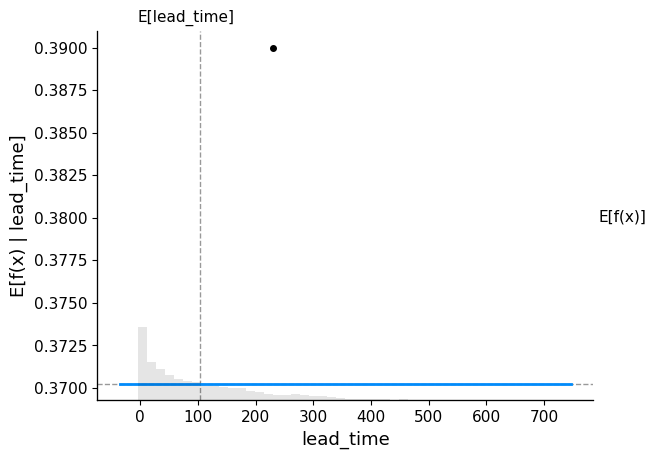

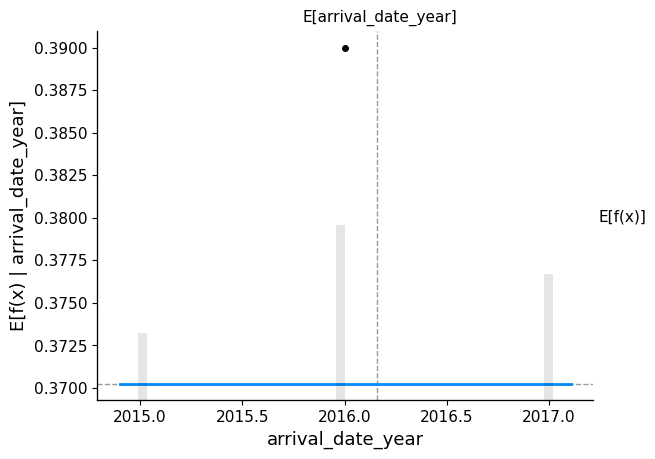

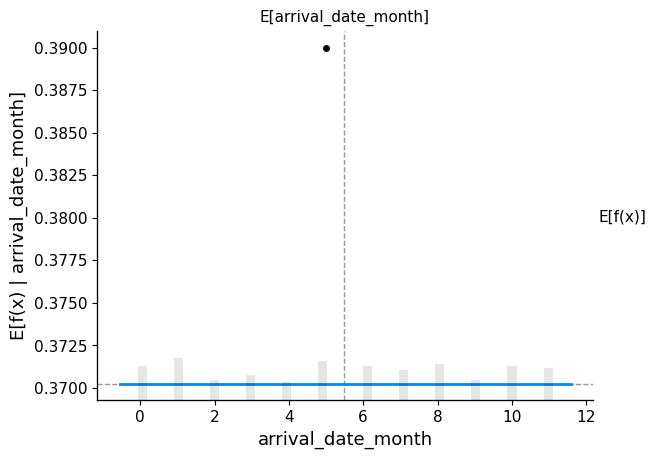

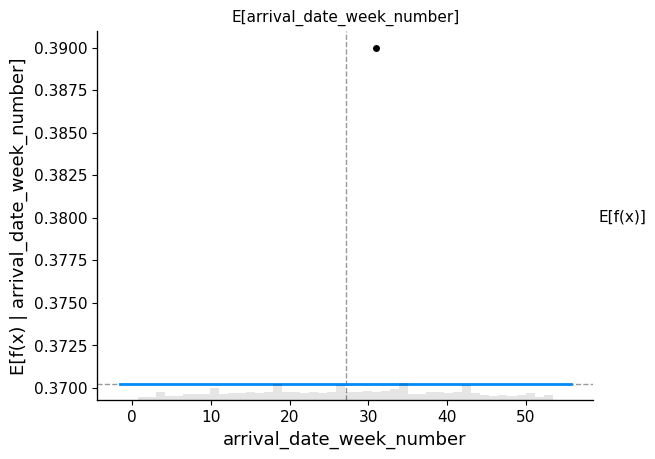

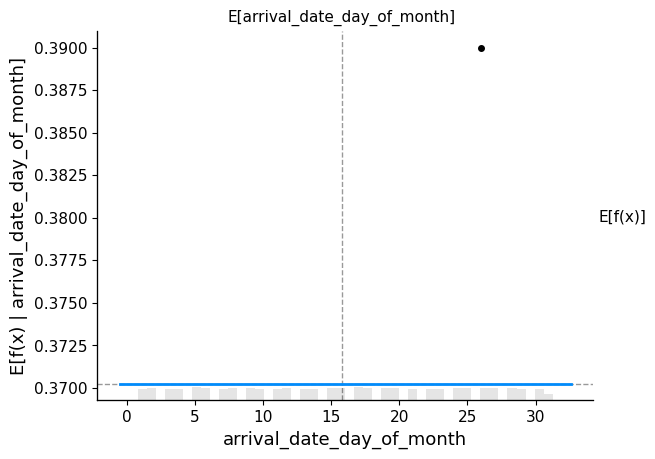

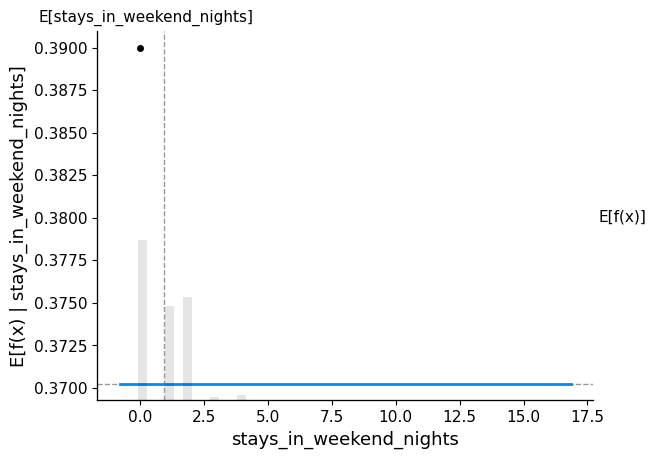

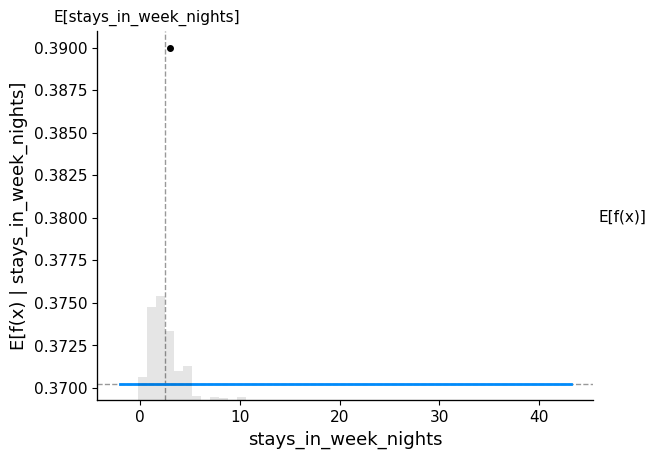

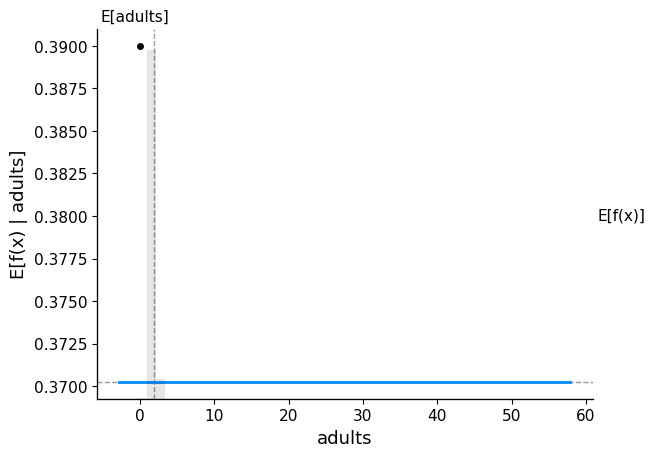

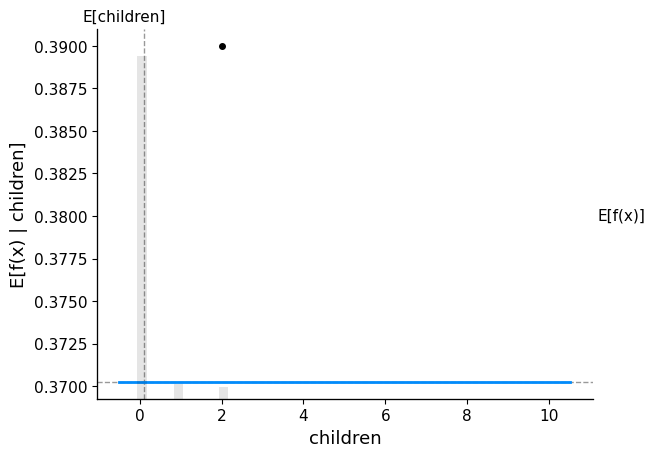

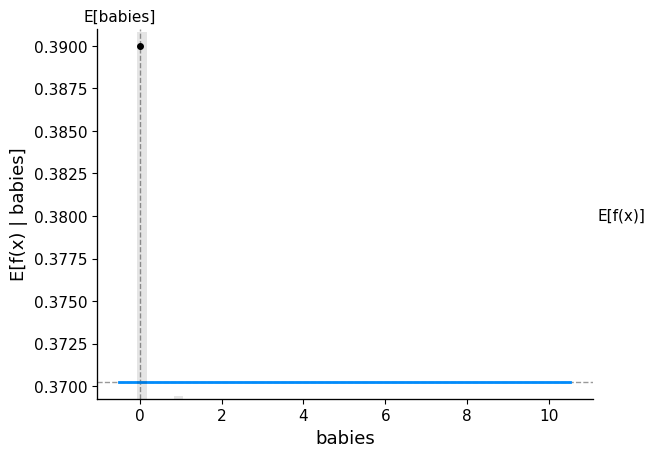

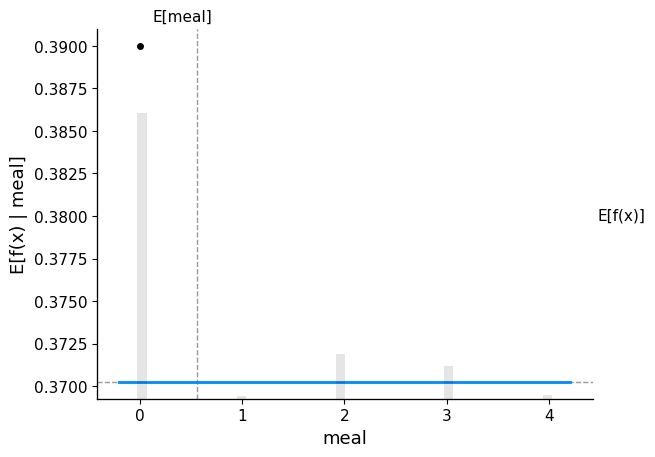

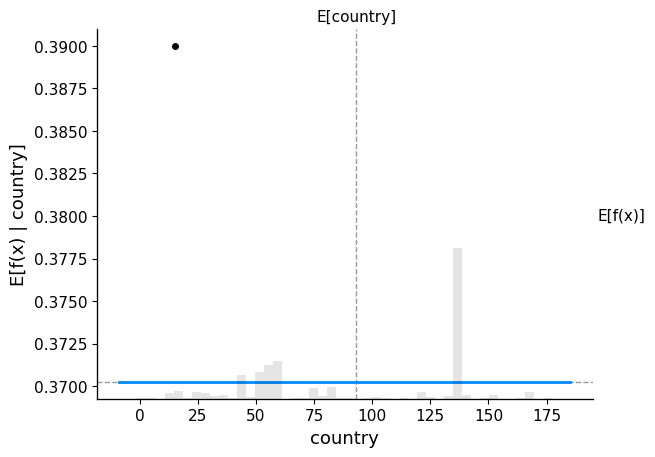

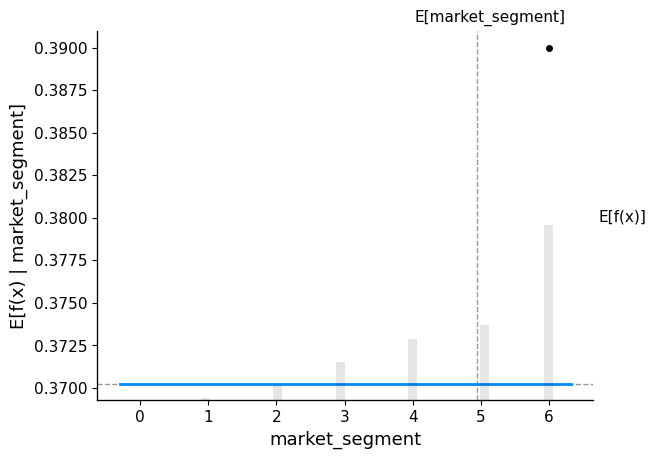

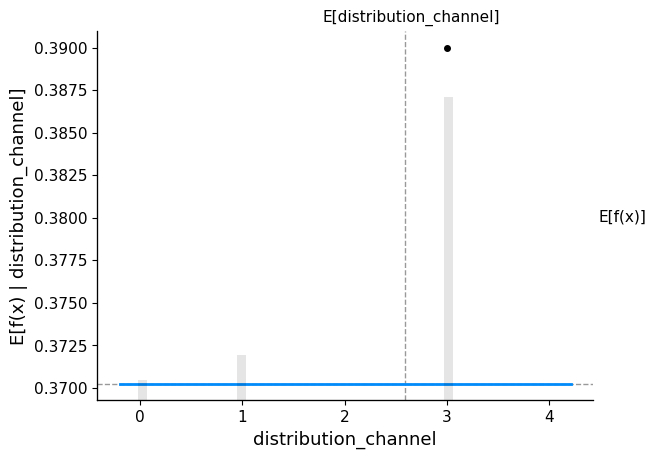

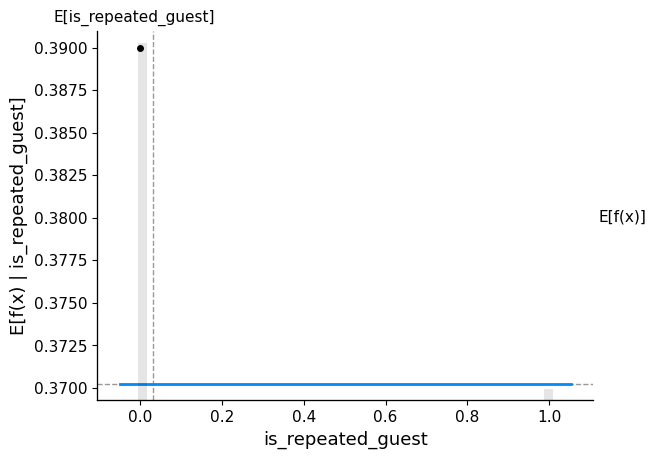

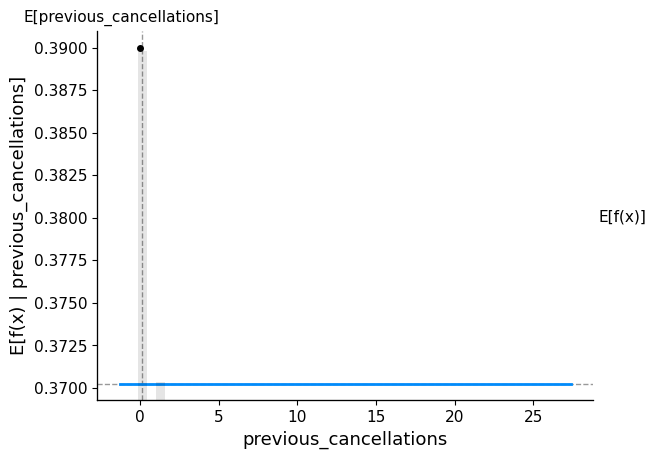

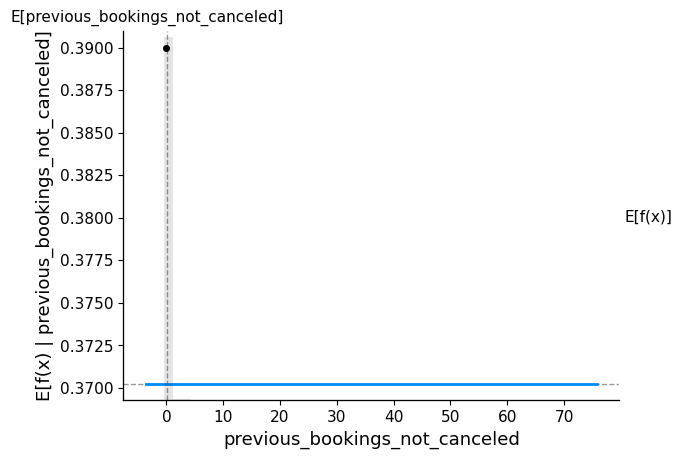

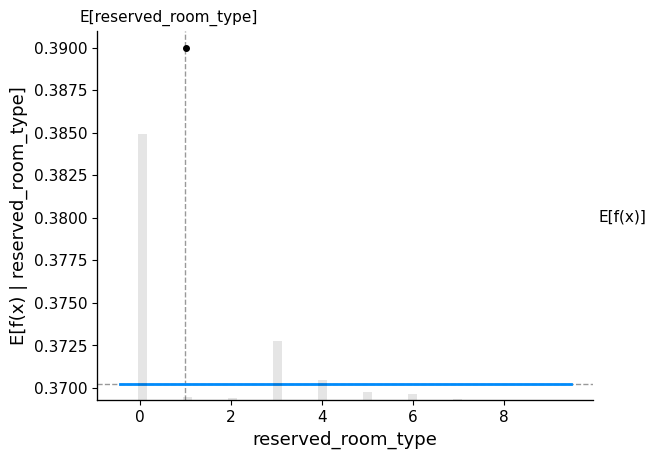

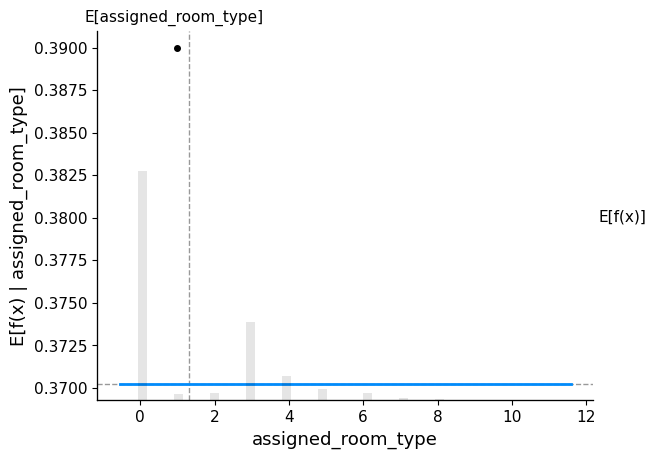

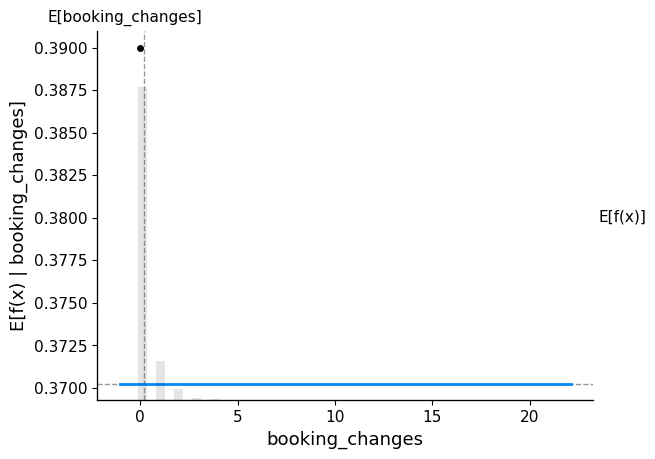

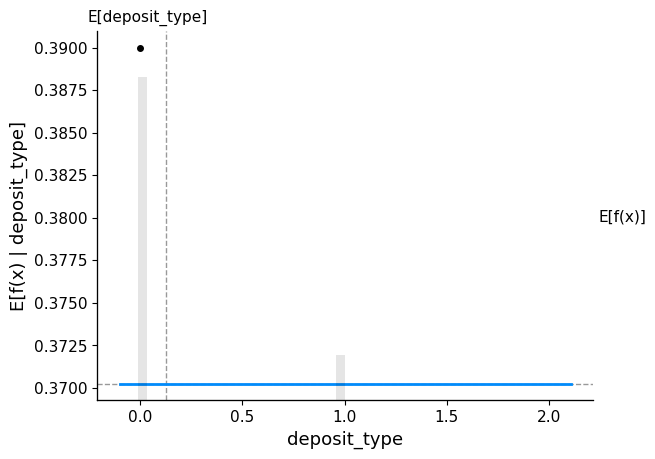

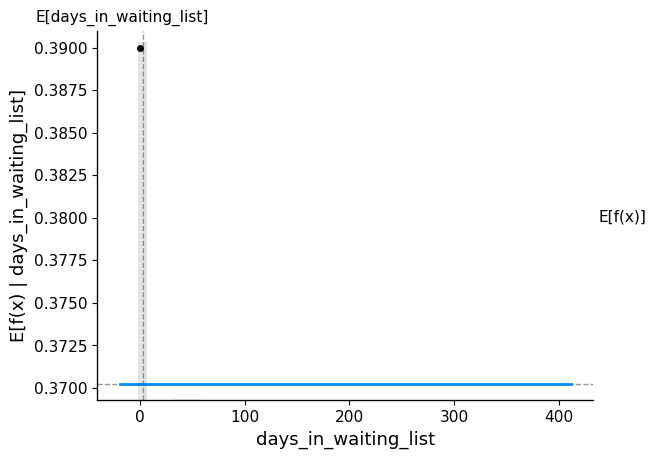

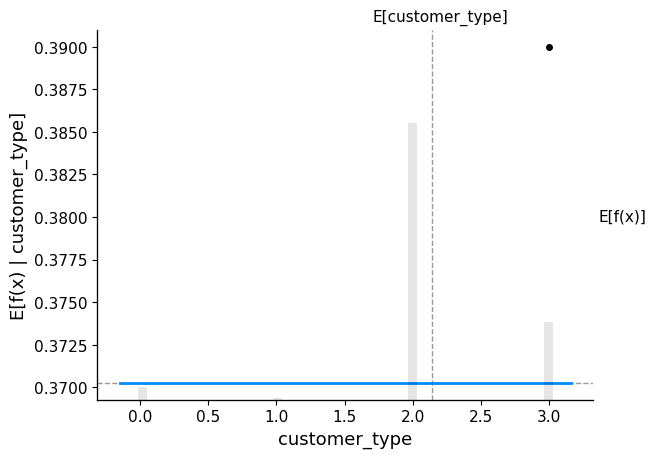

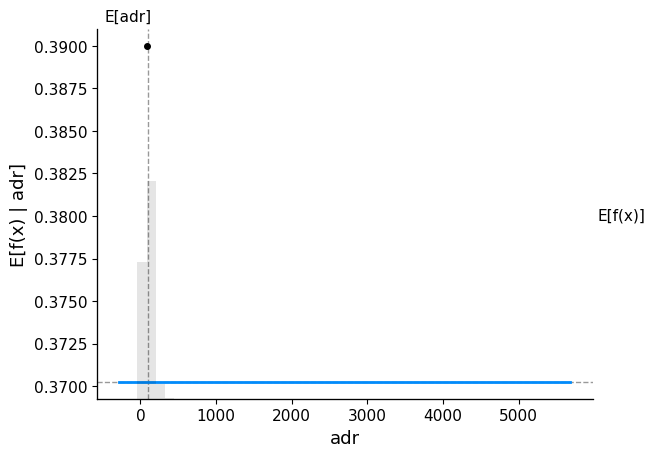

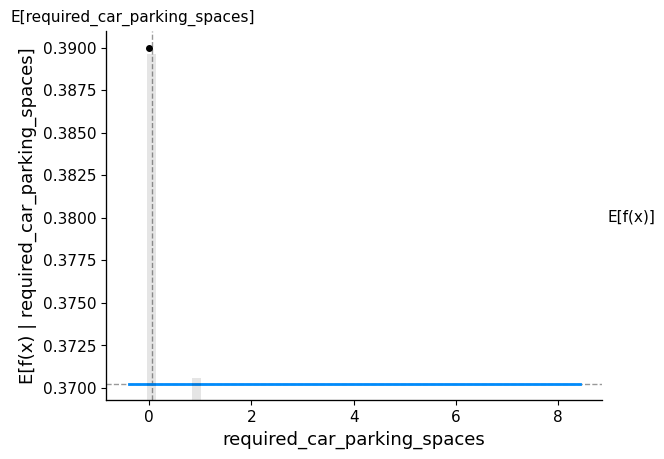

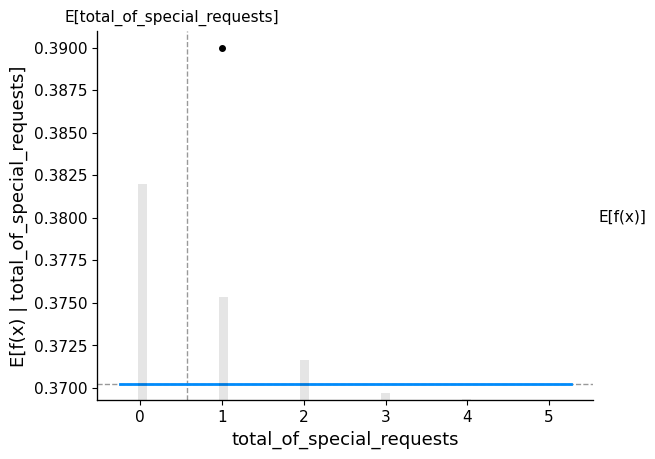

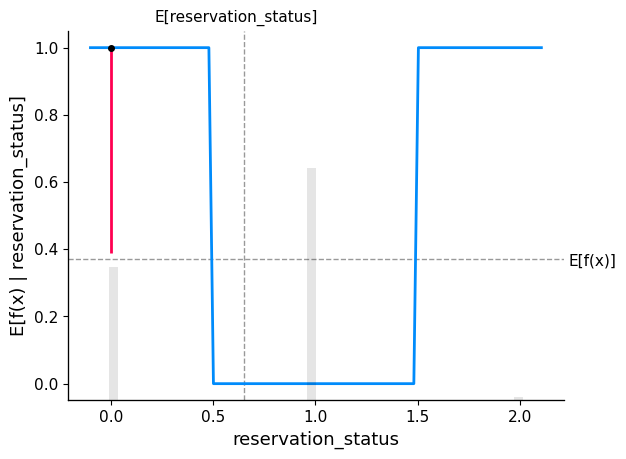

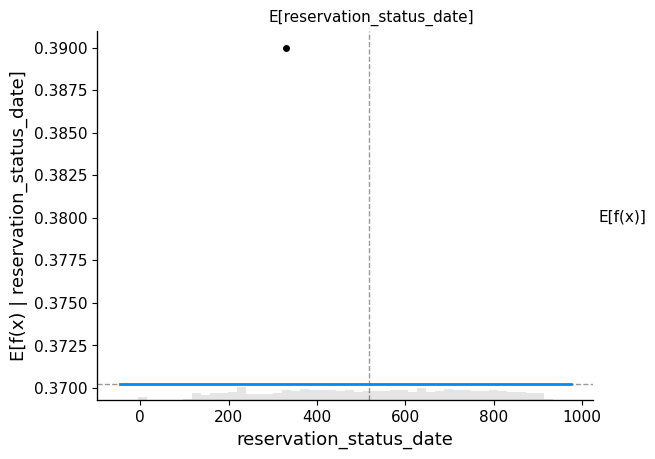

In [32]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(tree_model.predict, X_train)
tree_shap_values = tree_explainer(X_train)
for i in X_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        X_train,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

## Interpreting SHAP Feature Importance Plot for Tree based model
The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them.

The following plots are

SHAP feature importance for a tree based model
As we can see below in the plots, there is a difference in feature importance for both the models

For the tree based model, reservation status date is the second most important feature while reservation status is the most important feature

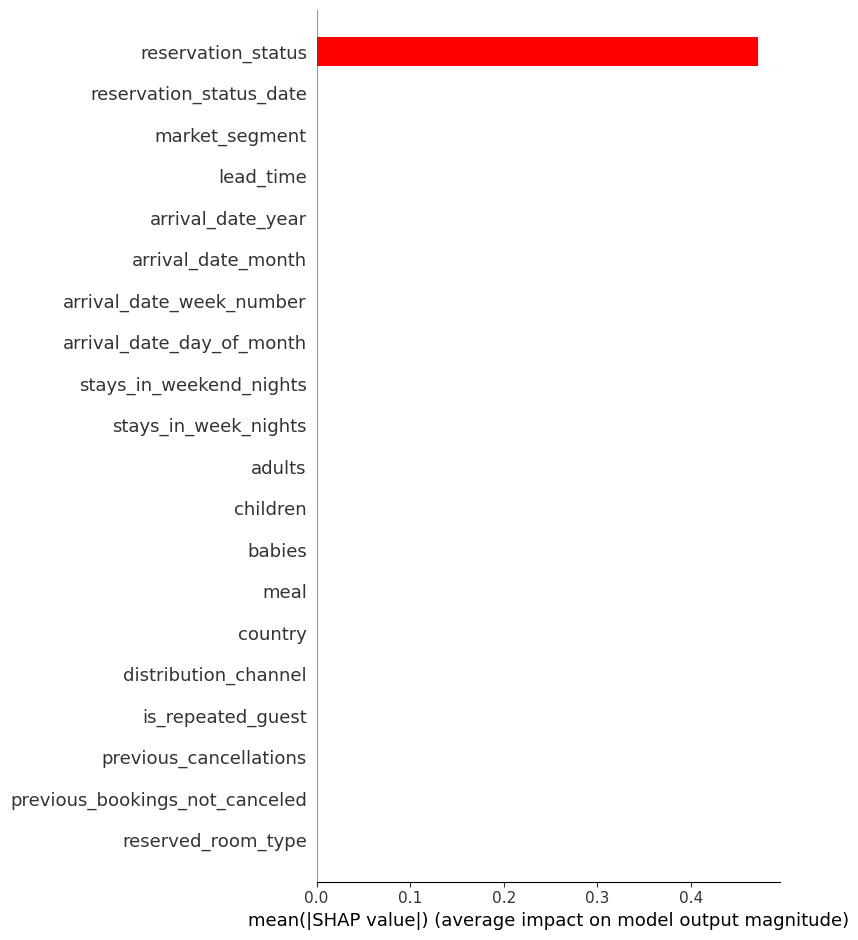

In [33]:
# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, X_train, plot_type="bar", color="red")

## Interpreting Waterfall SHAP visualization

Let's consider the same sample (sample_ind = 18)
Notice the value of reservation_status in the waterfall model is the same as what we have in SHAP partial dependence plot. It says that f(x) = 0.57 is what we got as a model output and the expected output for this sample was 0.43. We came pretty close to determining it as the difference is only 0.15. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that reservation_status has the biggest and most positive impact in increasing hotel booking demand for this specific sample. Using this model we can visually interpret why exactly this specific sample is giving an output of 0.42.

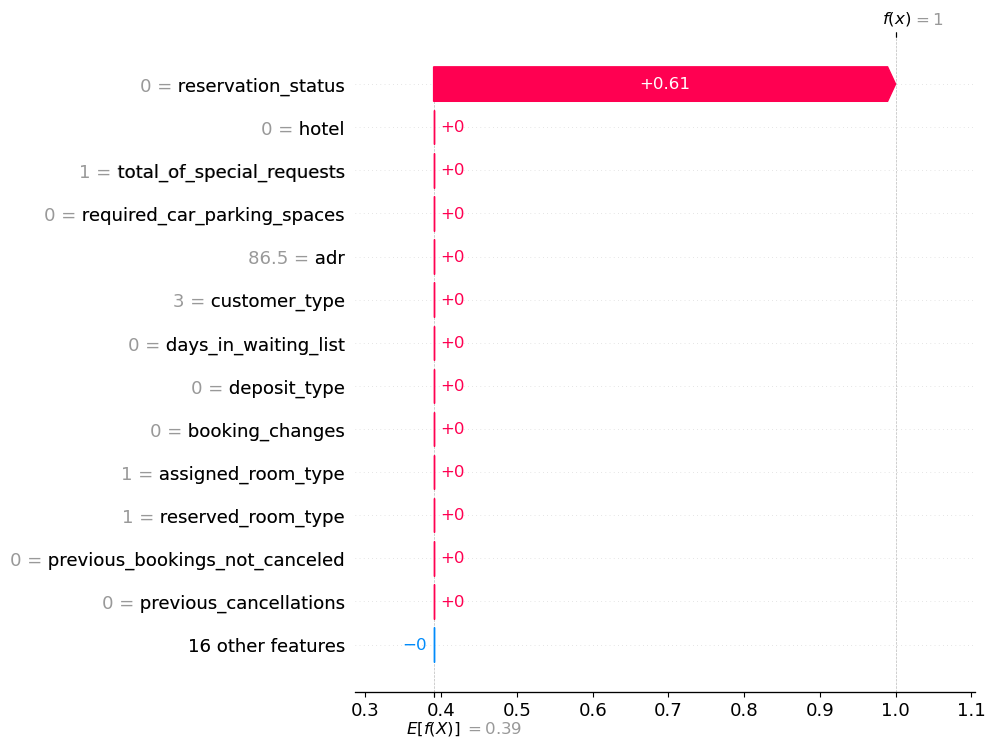

In [34]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

## SHAP summary for tree based model
Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

1. Each dot(both red and blue) represents a feature of a hotel booking
2. Red color represents high values whereas blue color represents low value
3. If a dot(a feature of wine) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
4. The position of a dot(a feature of wine) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.

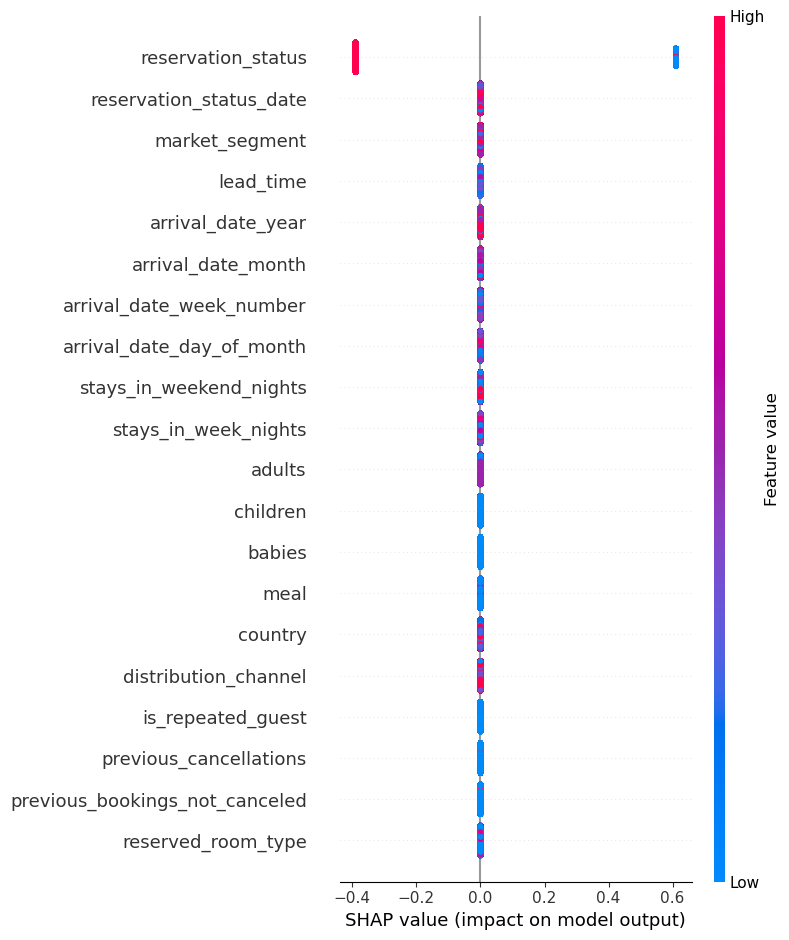

In [35]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, X_train)

## Interpreting SHAP dependence plot for tree based model
The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear models using the SHAP dependence plot. Here in these graphs, we get a dot for every wine in our dataset.

As we can observe the tree based model feature and its SHAP value have a linear relationship. If a feature has a positive impact on the hotel booking demand (is_cancelled) then the relationship will be directly proportional e.g. reservation_status and deposit_type and if the feature harms hotel booking demand the relationship will be inversely proportional. e.g. adr and customer_type.

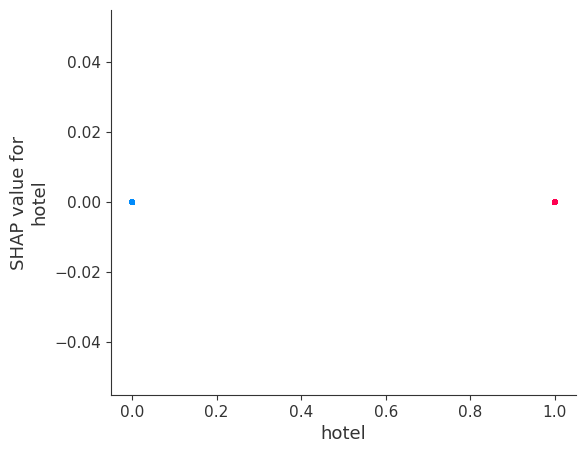

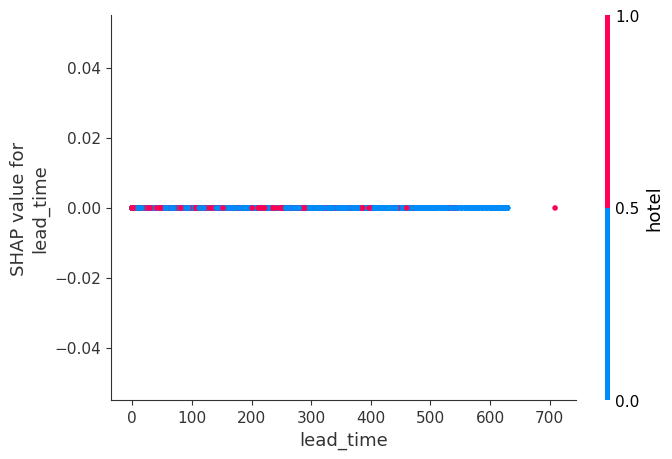

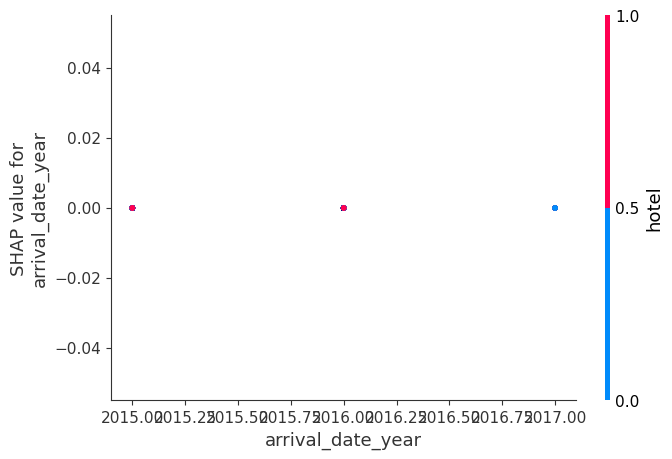

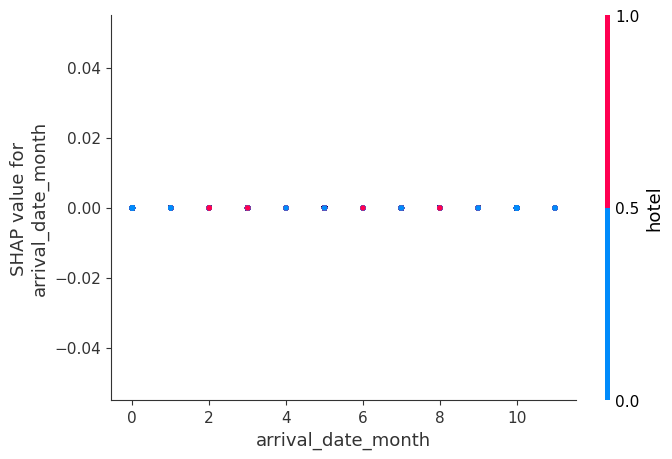

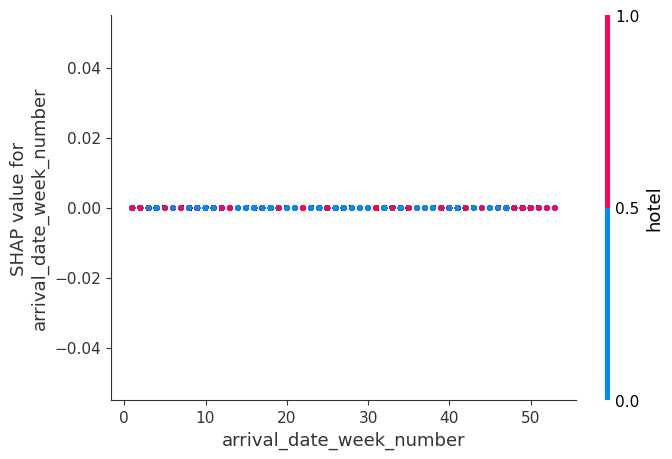

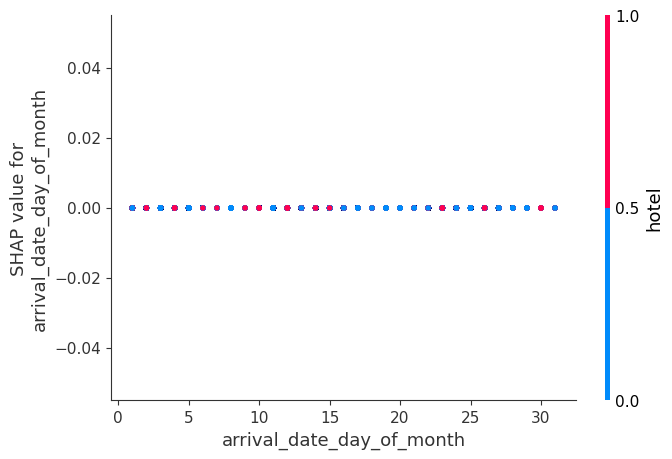

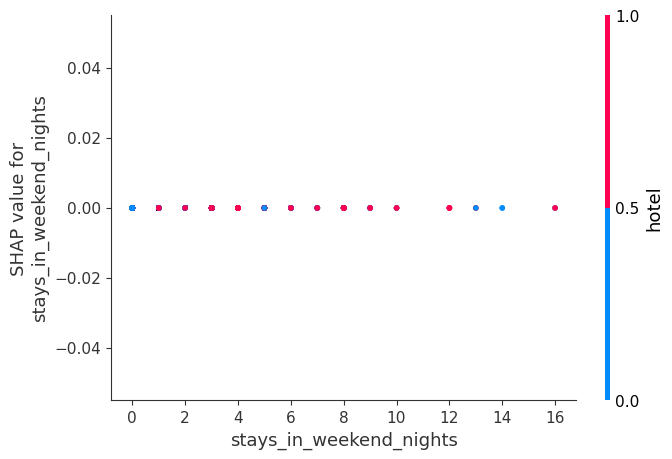

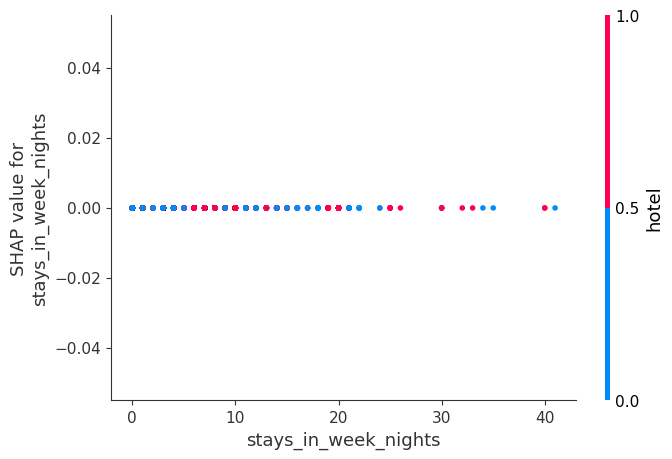

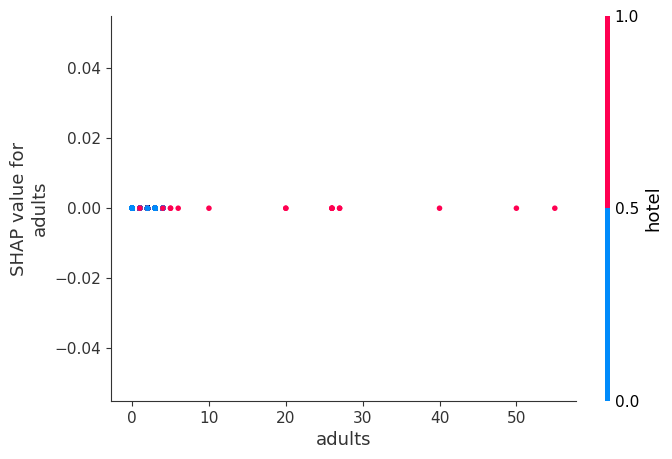

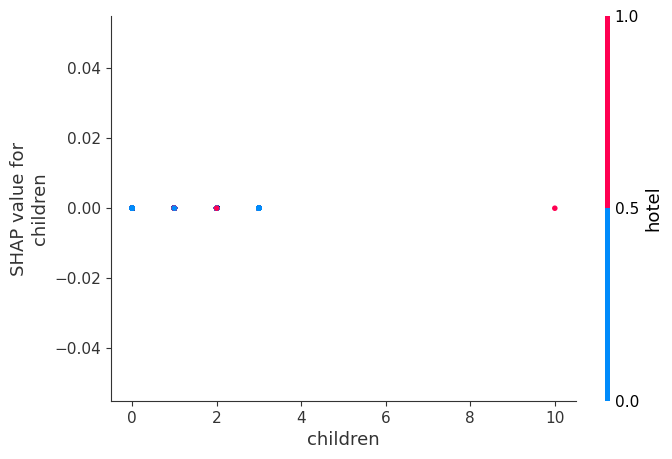

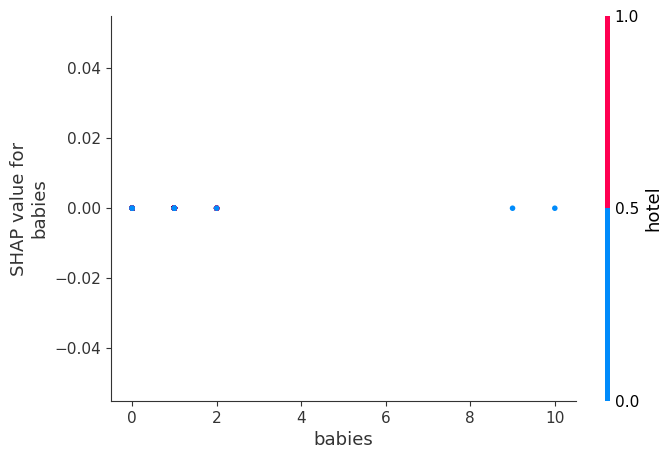

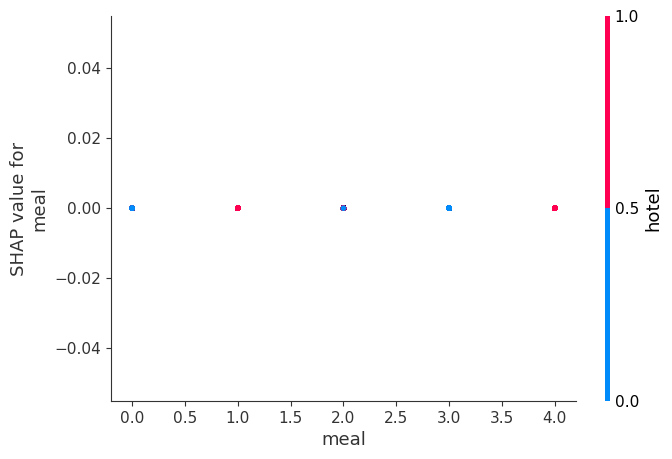

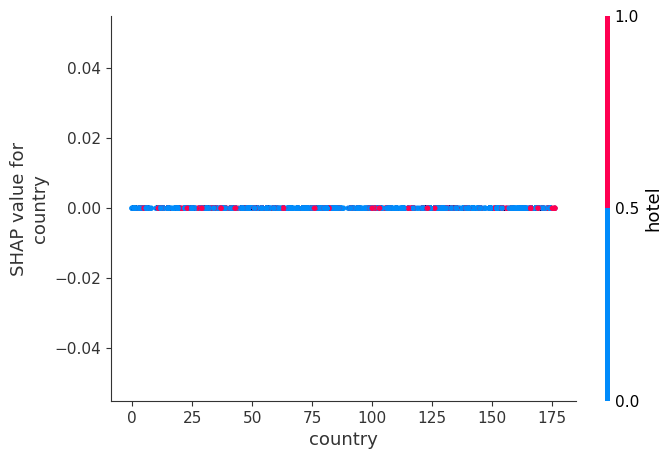

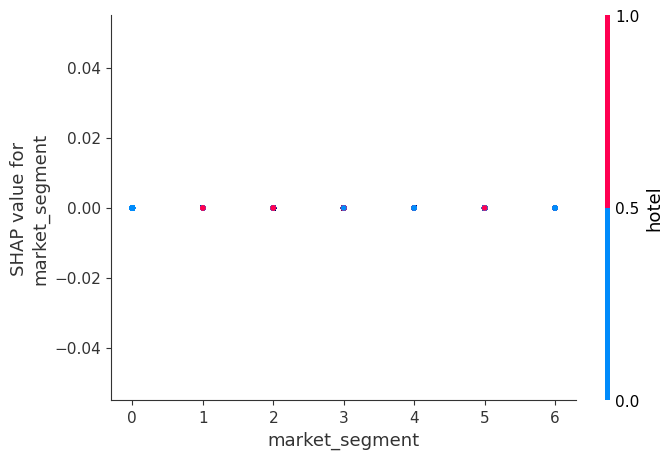

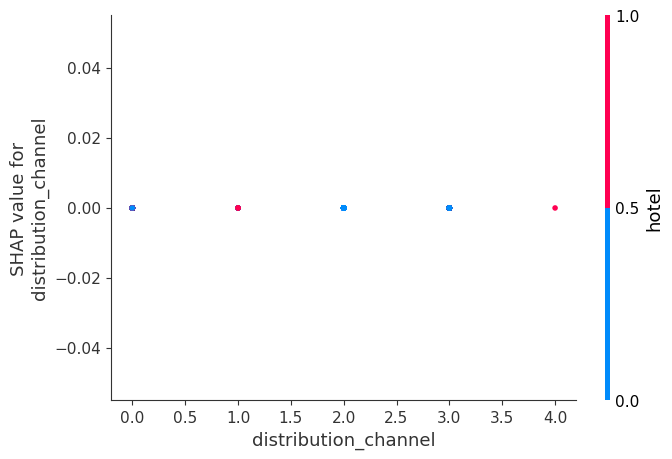

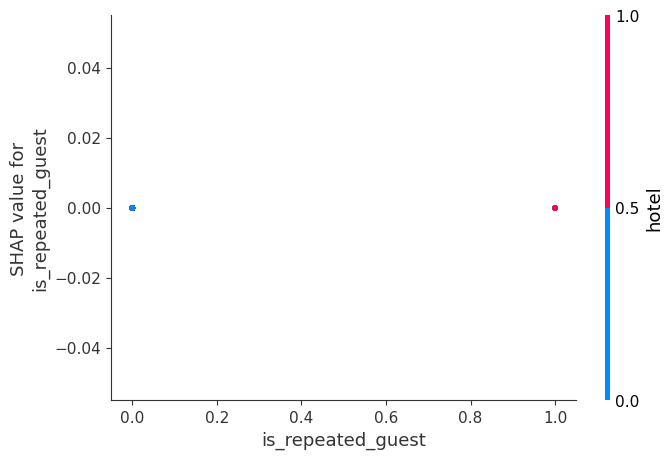

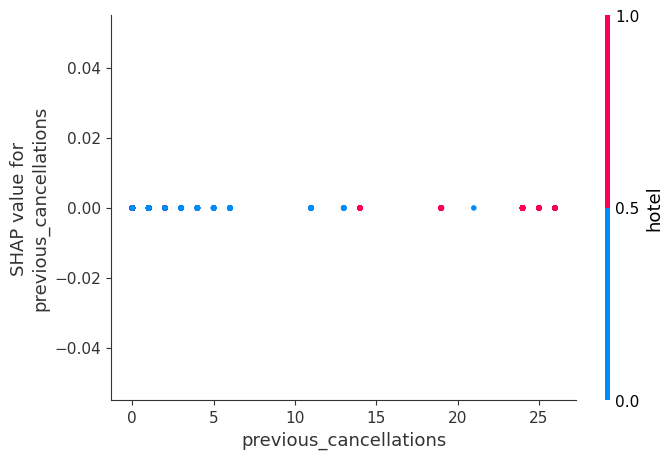

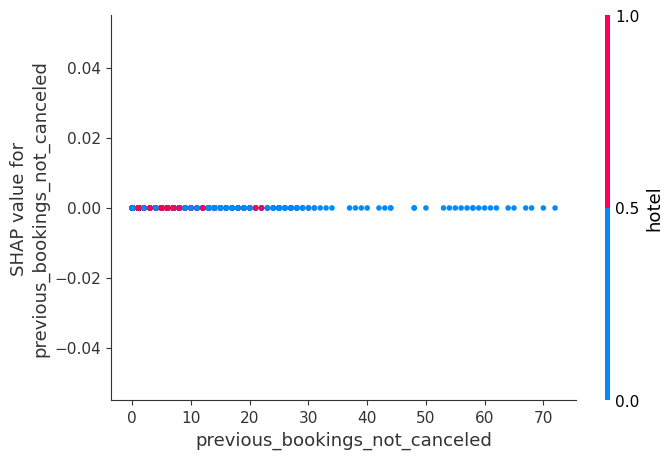

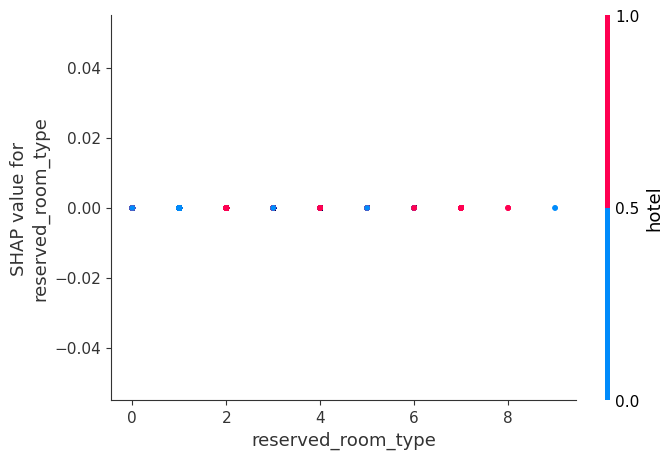

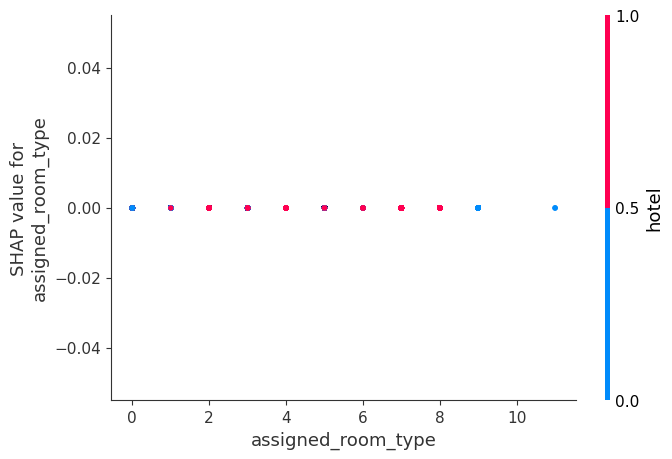

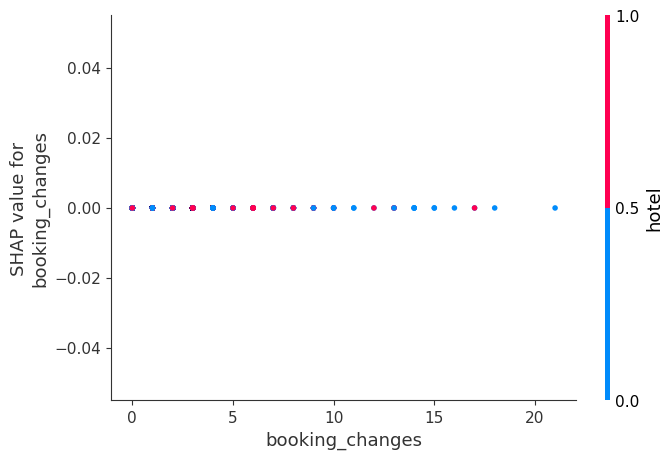

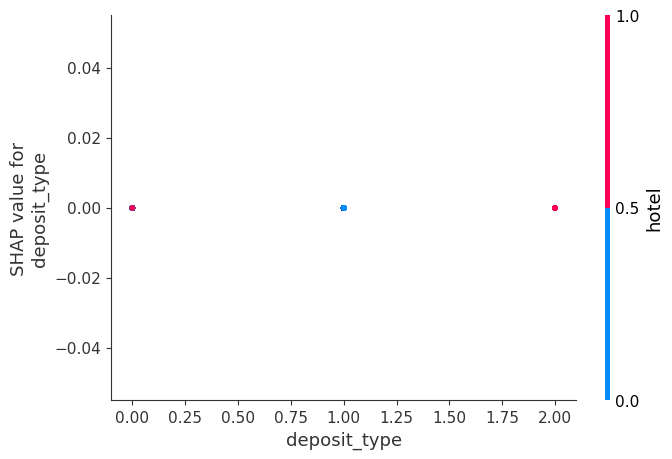

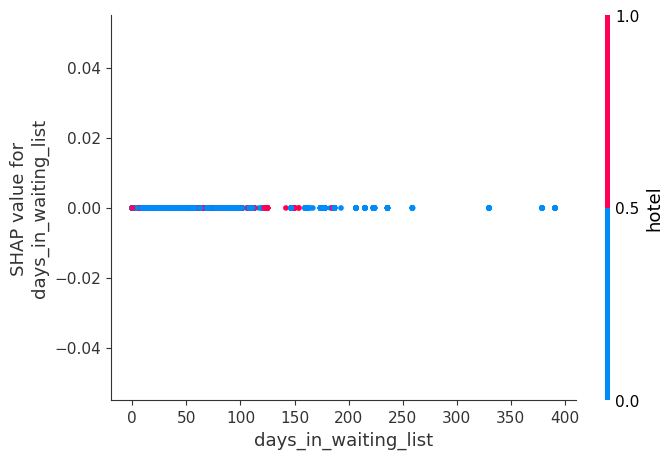

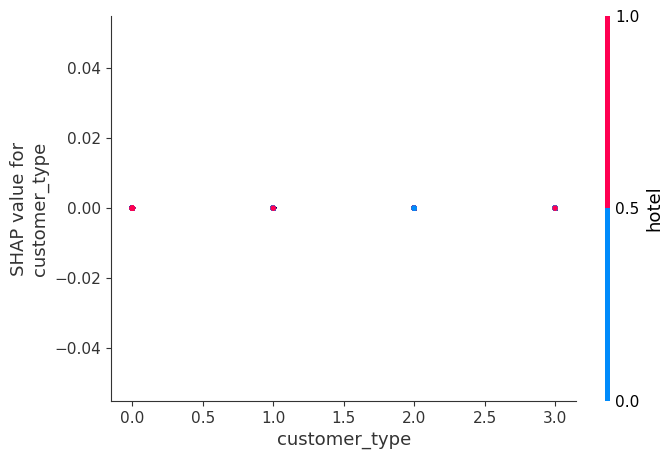

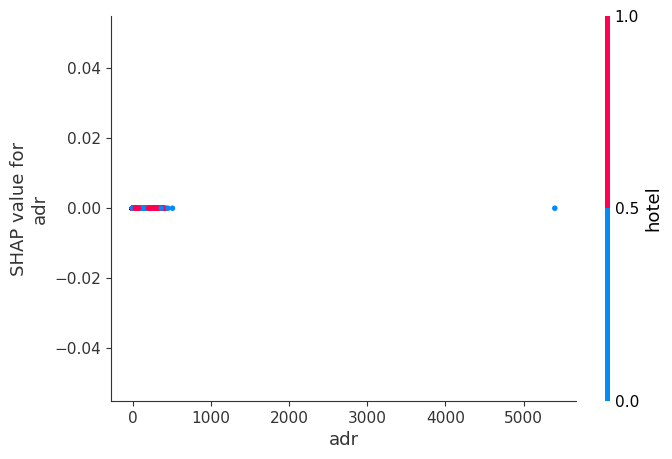

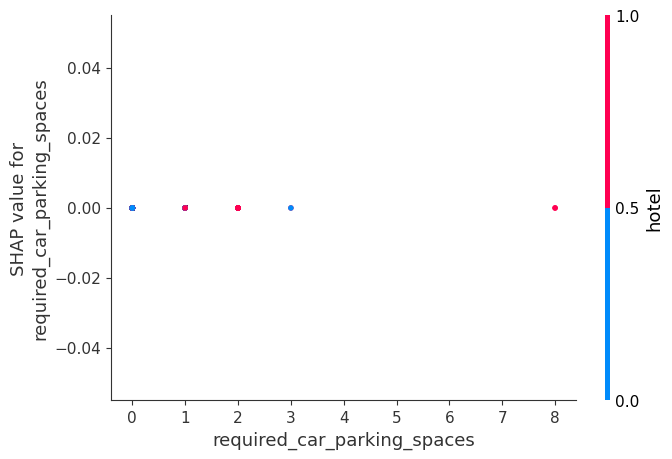

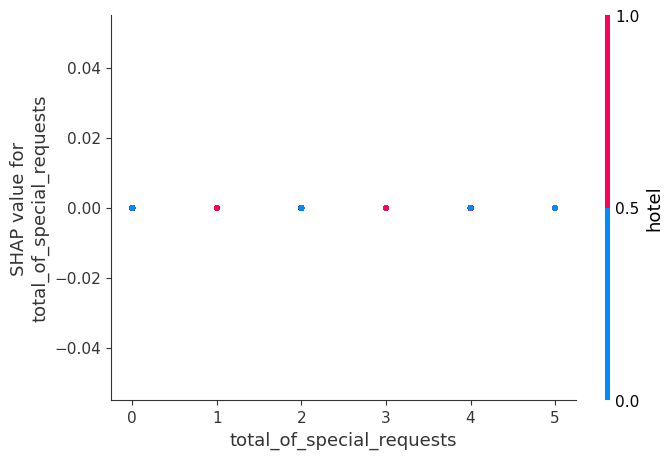

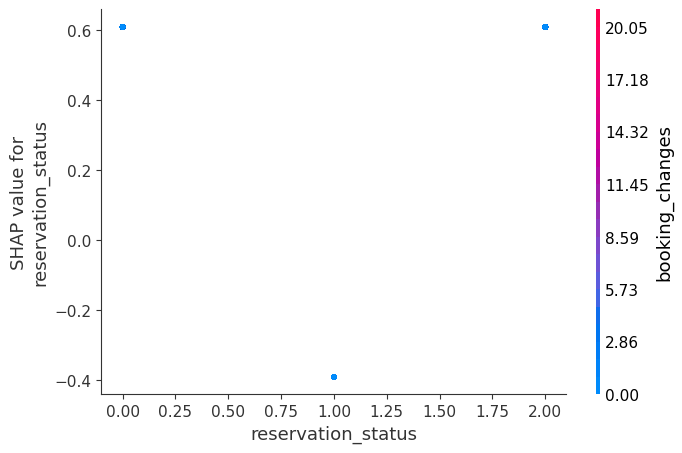

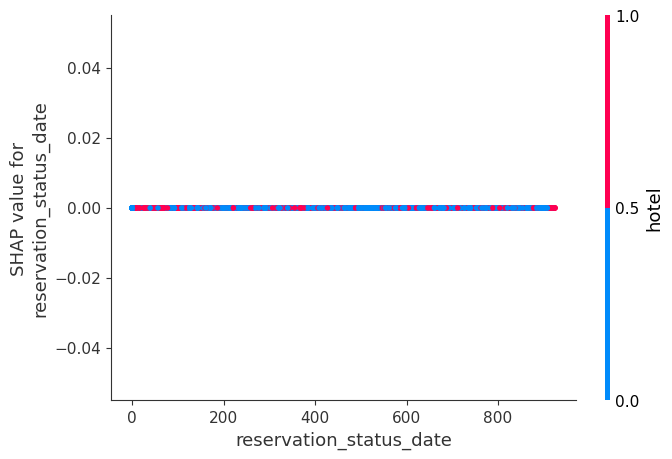

In [36]:
# SHAP partial dependence plot for a tree based model
for i in X_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, X_train)

## Setting up AutoML

In [37]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [38]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

0


In [39]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:46151..... not found.
Attempting to start a local H2O server...
  Java Version: java version "18.0.2.1" 2022-08-18; Java(TM) SE Runtime Environment (build 18.0.2.1+1-1); Java HotSpot(TM) 64-Bit Server VM (build 18.0.2.1+1-1, mixed mode, sharing)
  Starting server from /Users/namandiwan/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/kc/c14z_09s0wn36p1sghcgjq7h0000gn/T/tmpws1r2bl2
  JVM stdout: /var/folders/kc/c14z_09s0wn36p1sghcgjq7h0000gn/T/tmpws1r2bl2/h2o_namandiwan_started_from_python.out
  JVM stderr: /var/folders/kc/c14z_09s0wn36p1sghcgjq7h0000gn/T/tmpws1r2bl2/h2o_namandiwan_started_from_python.err
  Server is running at http://127.0.0.1:46151
Connecting to H2O server at http://127.0.0.1:46151 ... successful.


--------------------------  ---------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    1 month and 21 days
H2O_cluster_name:           H2O_from_python_namandiwan_ilxjny
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:46151
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.13 final
--------------------------  ---------------------------------

## Getting best model using H2O AutoML

In [40]:
df = h2o.H2OFrame(data)  # Converting Pandas dataframe in H2O dataframe

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [41]:
# converting categorical data to numeric data
df['is_canceled'] = df['is_canceled'].asfactor()

In [42]:
X = df.columns
print(X)

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [43]:
# Set target and predictor variables
y = "is_canceled"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [44]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [45]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1) 

In [46]:
aml.train(x=X, y=y, training_frame=df_train)  # Training the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230329_193044


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/8
# GBM base models (used / total)      1/4
# XGBoost base models (used / total)  0/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 3.1371016557797345e-07
RMSE: 0.0005600983534862189
LogLoss: 0.0005404164964412501
AUC: 1.0
AUCPR: 1.0
Gini: 1.0
Null degrees of freedom: 9967
Residual degrees of freedom: 9965
Null deviance: 13056.458930675682
Residual deviance: 10.773743273052293
AIC: 16.773743273052293

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9986211767933091
       0     1     Error    Rate
-----  ----  ----  -------  ------------
0      6356  0     0        (0.0/6356.0)
1      0     3612  0        (0.0/3612.0)
Total  6356  3612  0        (0.0/9968.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value      idx
---------------------------  -----------  ---------  -----
max f1                       0.998621     1          44
max f2                       0.998621     1          44
max f0point5                 0.998621     1          44
max accuracy                 0.998621     1          44
max precision                0.999346     1          0
max recall                   0.998621     1          44
max specificity              0.999346     1          0
max absolute_mcc             0.998621     1          44
max min_per_class_accuracy   0.998621     1          44
max mean_per_class_accuracy  0.998621     1          44
max tns                      0.999346     6356       0
max fns                      0.999346     154        0
max fps                      0.000432906  6356       120
max tps                      0.998621     3612       44
max tnr                      0.999346     1          0
max fnr                      0.999346     0.0426357  0
max fpr                      0.000432906  1          120
max tpr                      0.998621     1          44

Gains/Lift Table: Avg response rate: 36.24 %, avg score: 36.24 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.34691                     0.999346           2.75969   2.75969            1                0.999346     1                           0.999346            0.957364        0.957364                   175.969   175.969            0.957364
2        0.400582                    0.000692288        0.794378  2.49637            0.28785          0.288011     0.904583                    0.904038            0.0426357       1                          -20.5622  149.637            0.940057
3        1                           0.000432906        0         1                  0                0.000441988  0.36236                     0.362406            0               1                          -100      0                  0

ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 8.326996071419668e-07
RMSE: 0.0009125237570288057
LogLoss: 0.00078305

In [47]:
# View the AutoML Leaderboard
print(aml.leaderboard)

model_id                                                   auc      logloss    aucpr    mean_per_class_error         rmse          mse
StackedEnsemble_AllModels_1_AutoML_1_20230329_193044         1  0.000783052        1                       0  0.000912524  8.327e-07
GBM_4_AutoML_1_20230329_193044                               1  0.024233           1                       0  0.0270848    0.000733587
GBM_3_AutoML_1_20230329_193044                               1  0.0123851          1                       0  0.014995     0.00022485
StackedEnsemble_BestOfFamily_2_AutoML_1_20230329_193044      1  0.000783048        1                       0  0.000912534  8.32718e-07
XGBoost_2_AutoML_1_20230329_193044                           1  0.0042474          1                       0  0.00727868   5.29792e-05
GBM_2_AutoML_1_20230329_193044                               1  0.0104158          1                       0  0.0122189    0.000149301
XGBoost_1_AutoML_1_20230329_193044                        

In [48]:
# getting the best model
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230329_193044


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/8
# GBM base models (used / total)      1/4
# XGBoost base models (used / total)  0/2
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 3.1371016557797345e-07
RMSE: 0.0005600983534862189
LogLoss: 0.0005404164964412501
AUC: 1.0
AUCPR: 1.0
Gini: 1.0
Null degrees of freedom: 9967
Residual degrees of freedom: 9965
Null deviance: 13056.458

In [49]:
# printing the best model algo
best_model.algo

'stackedensemble'

In [50]:
# Getting RMSE of the best model
print(best_model.rmse(train=True))

0.0005600983534862189


In [51]:
# Making predictions
predictions = best_model.predict

## SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20230329_193044

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9985882627559339
       0      1      Error    Rate
-----  -----  -----  -------  -------------
0      59858  0      0        (0.0/59858.0)
1      0      35283  0        (0.0/35283.0)
Total  59858  35283  0        (0.0/95141.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

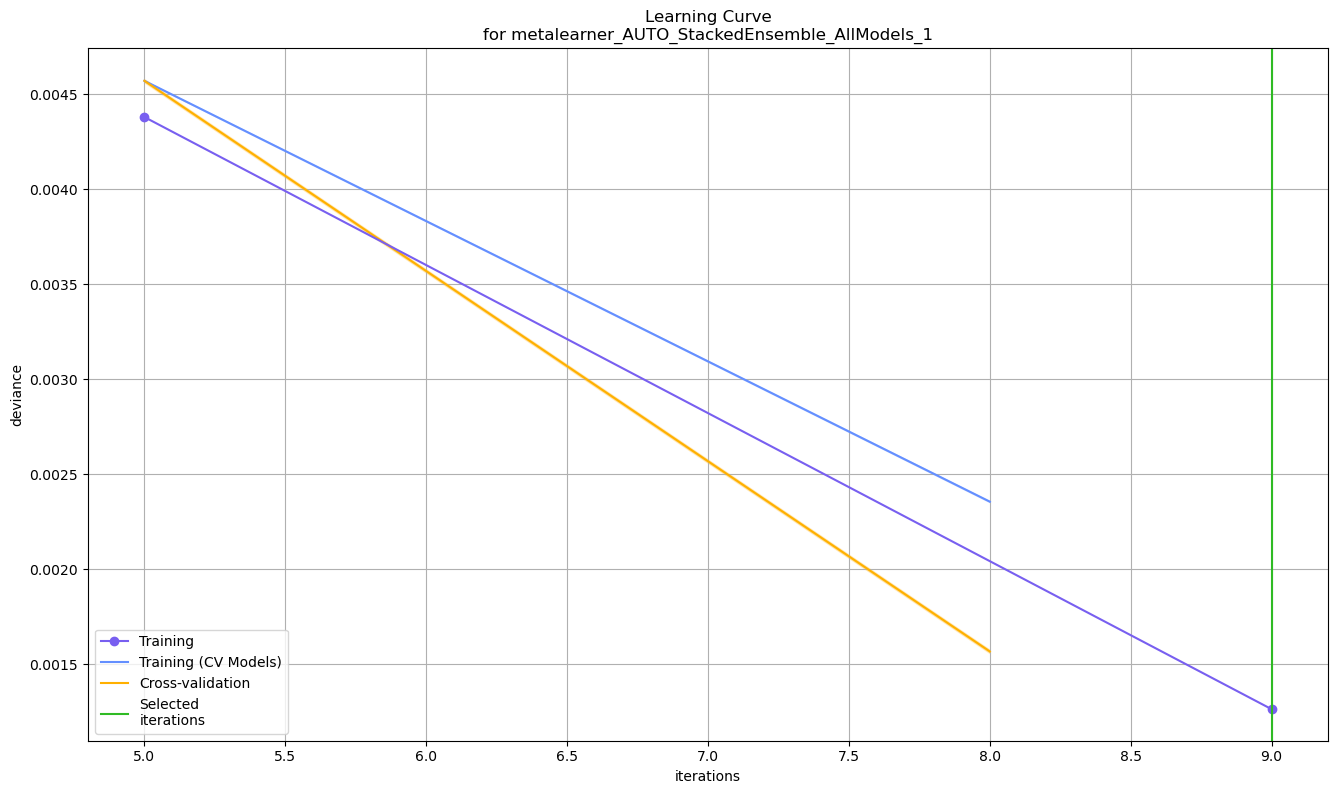

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

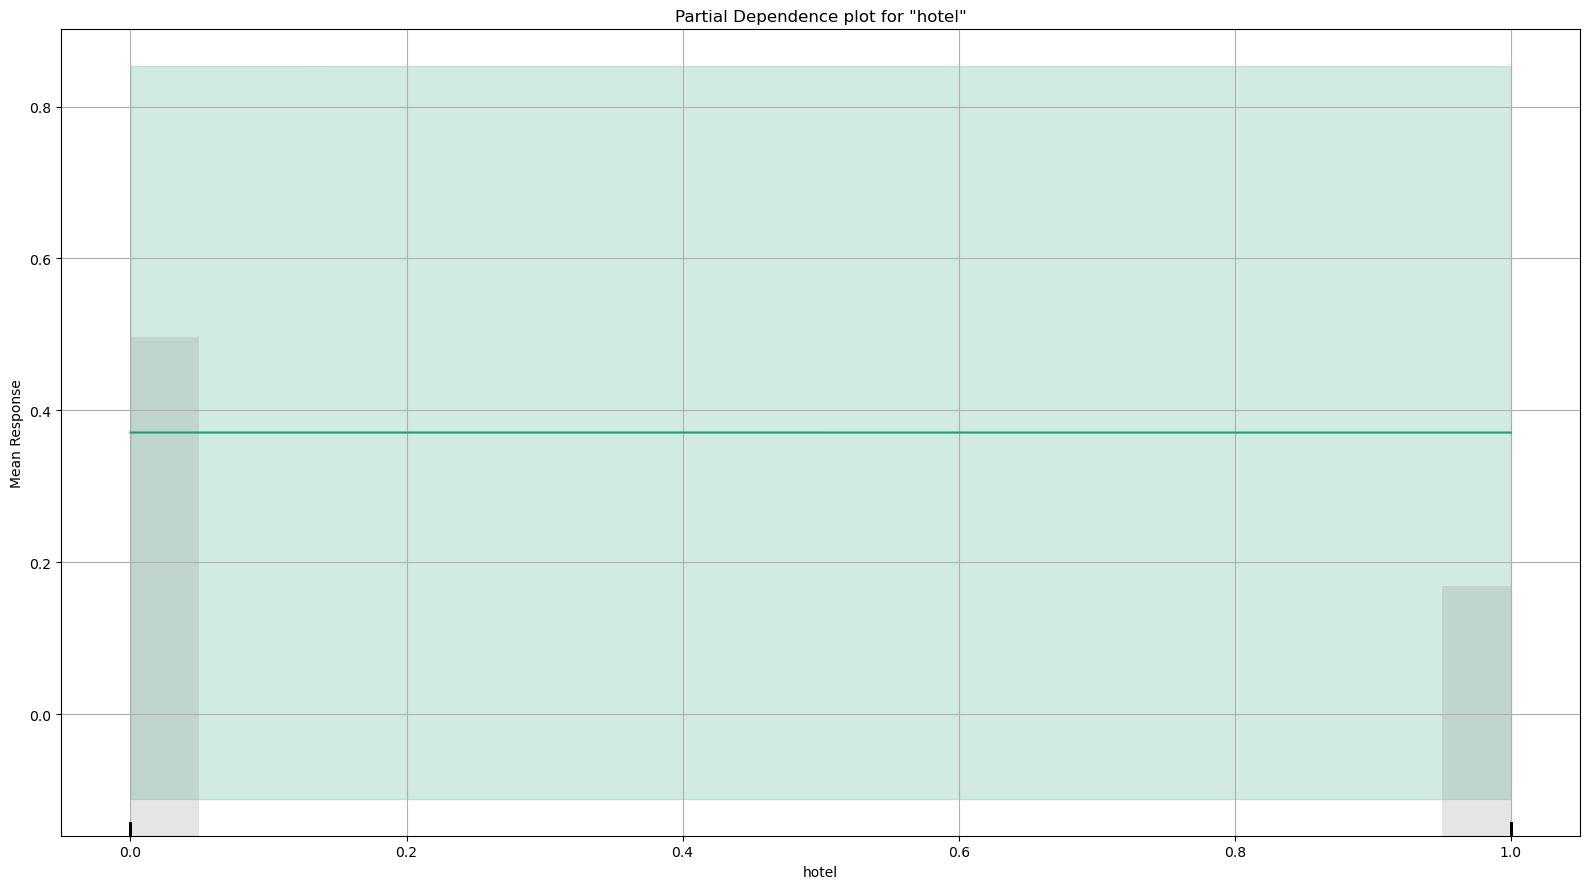

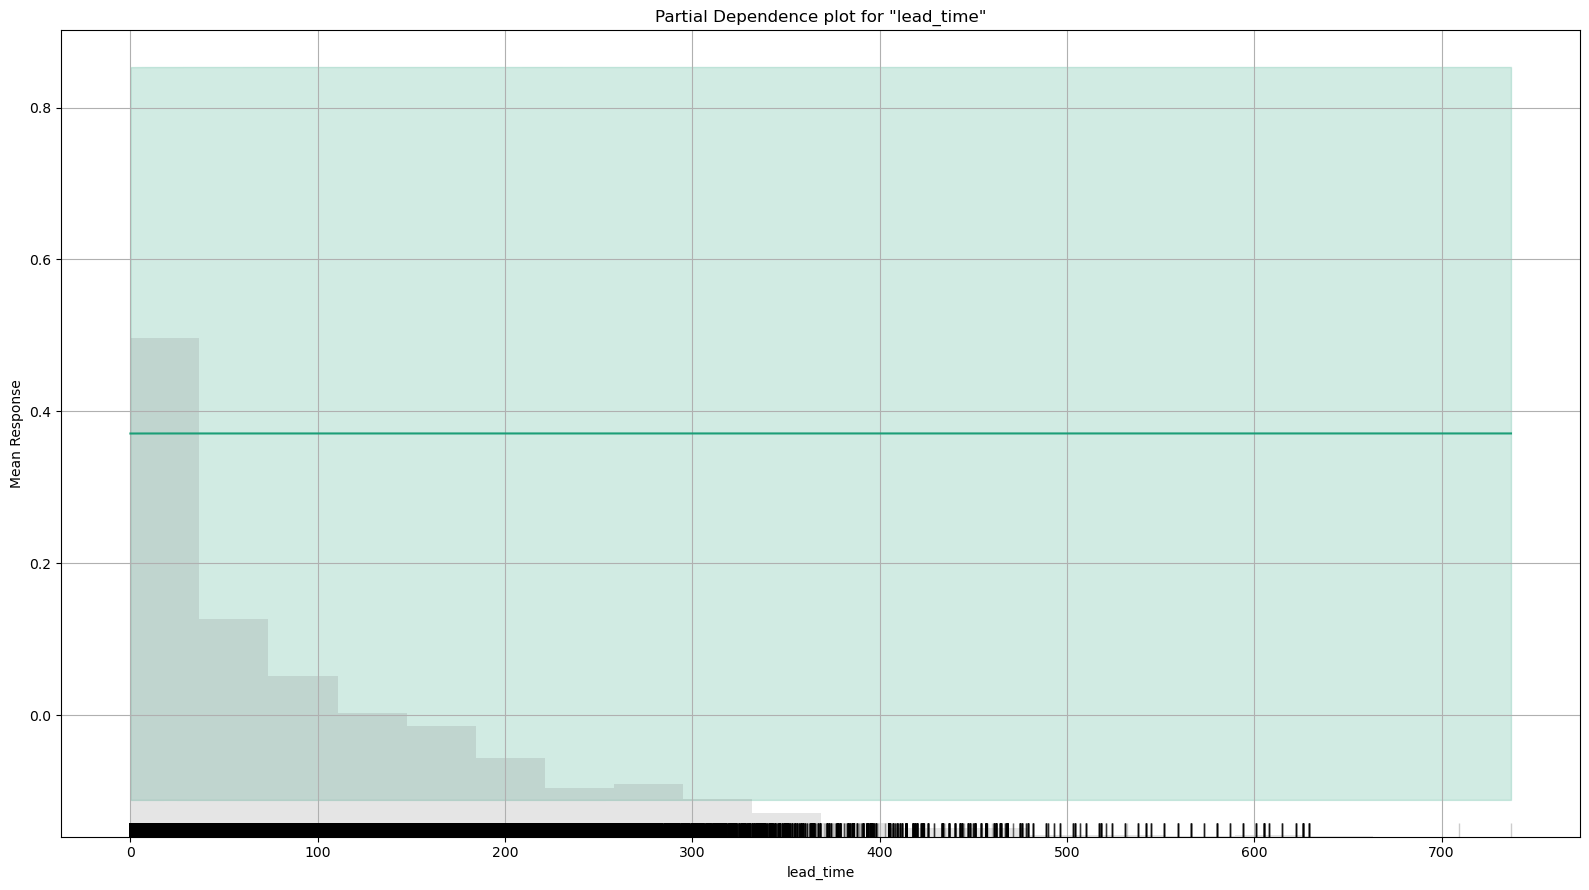

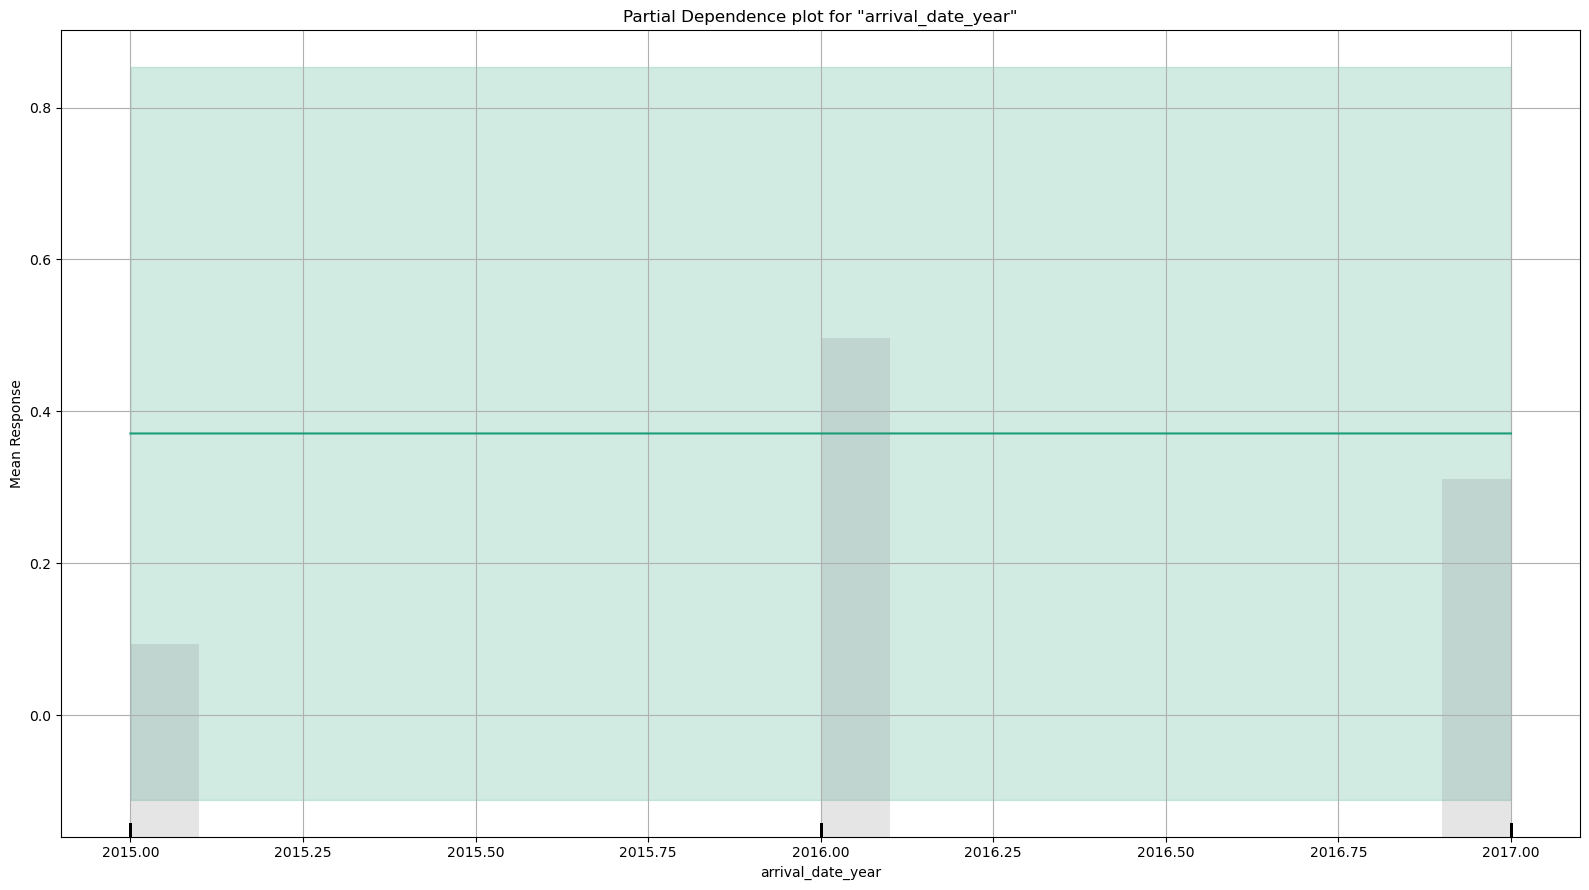

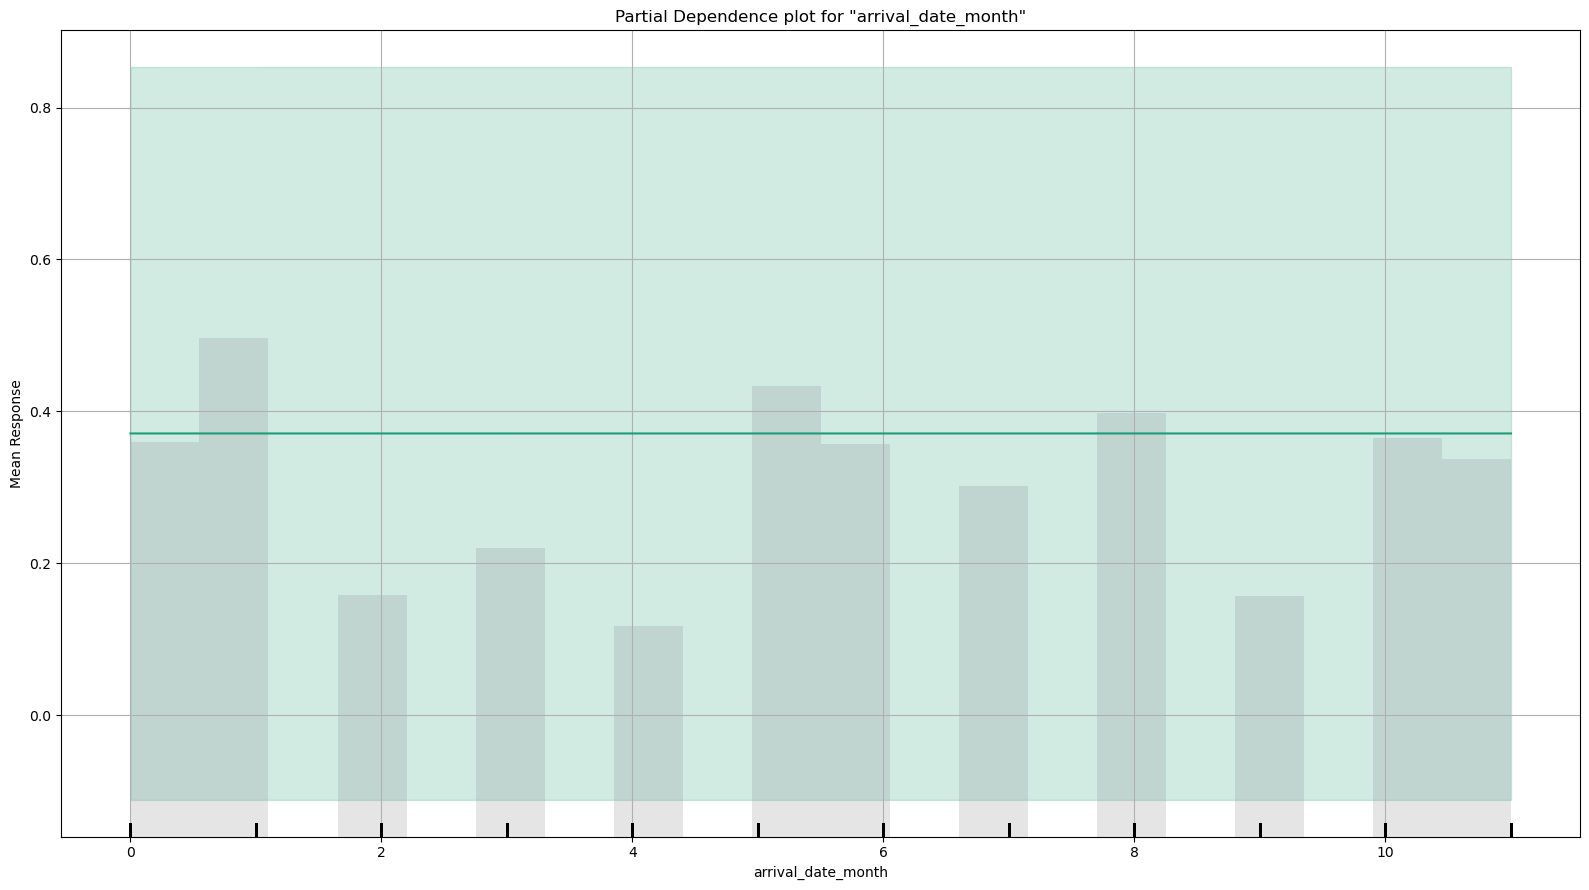

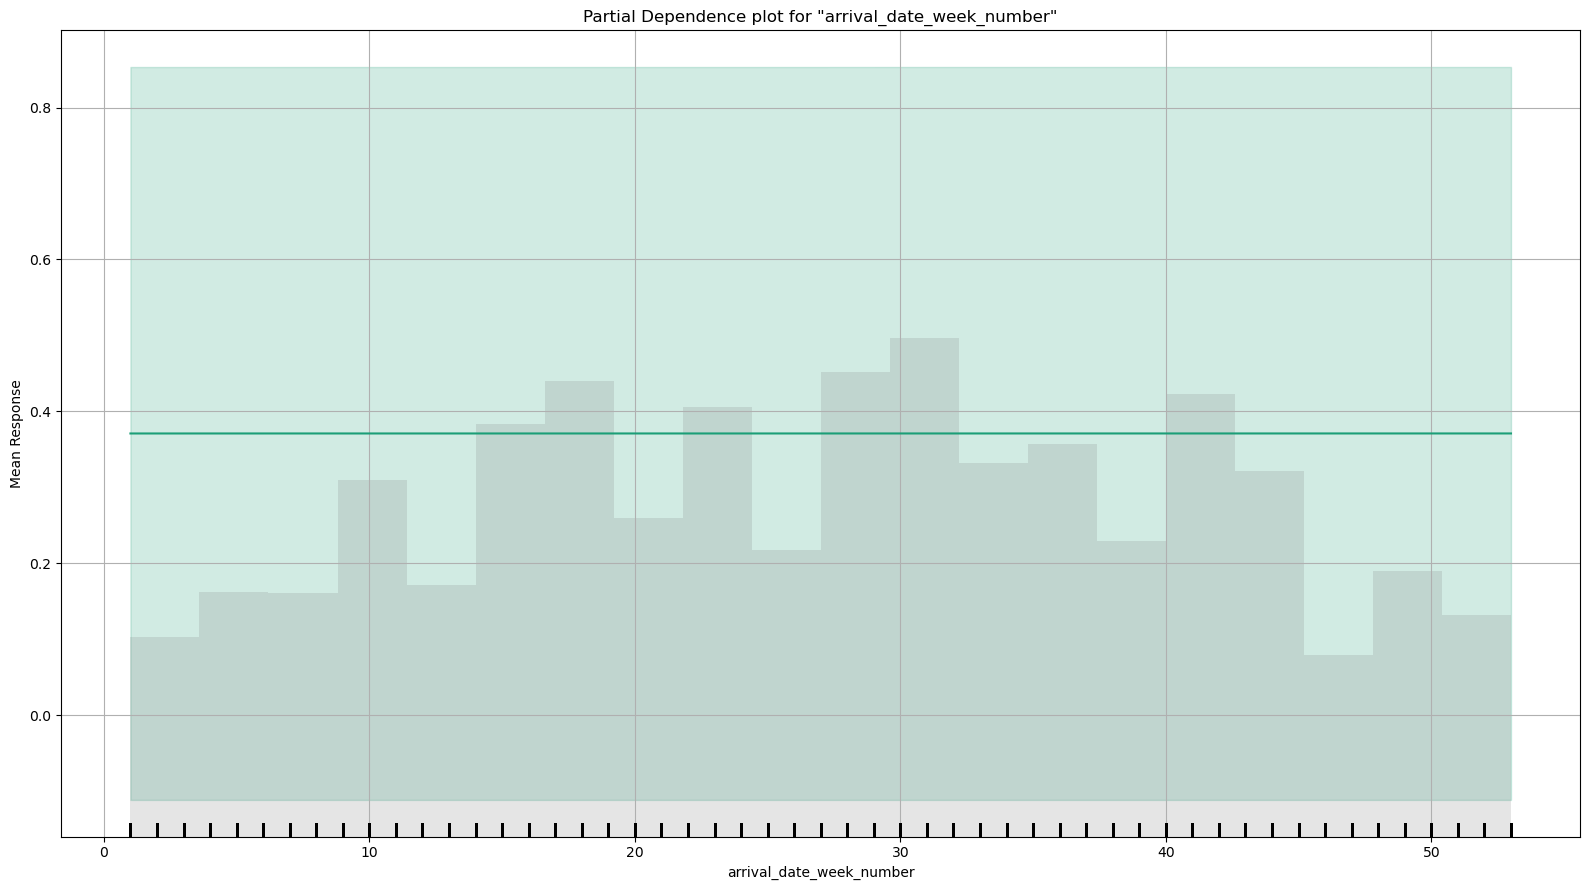

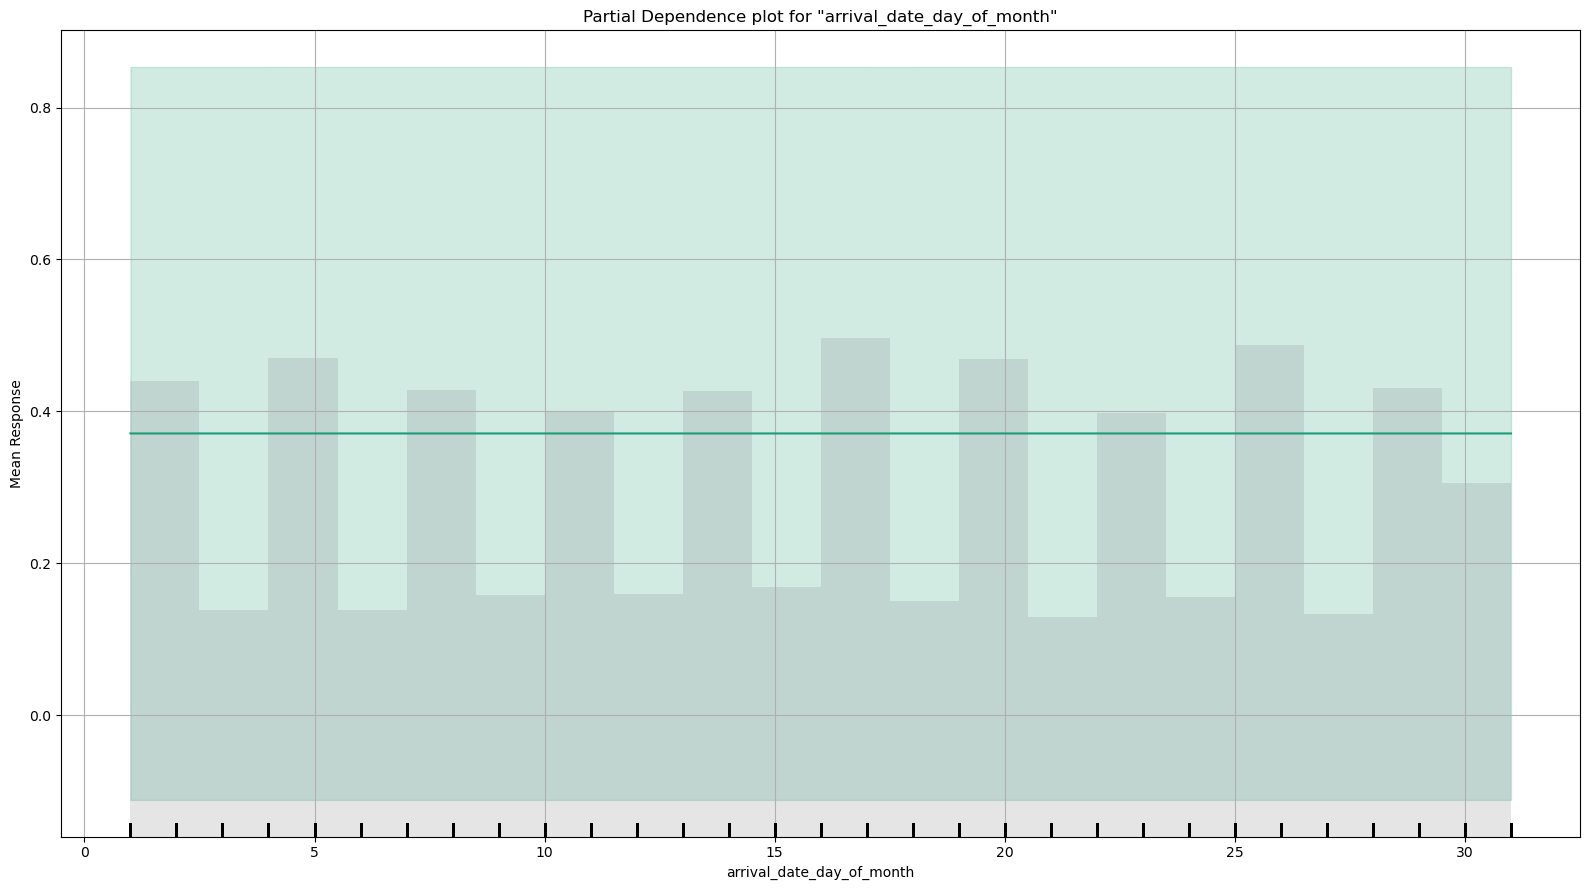

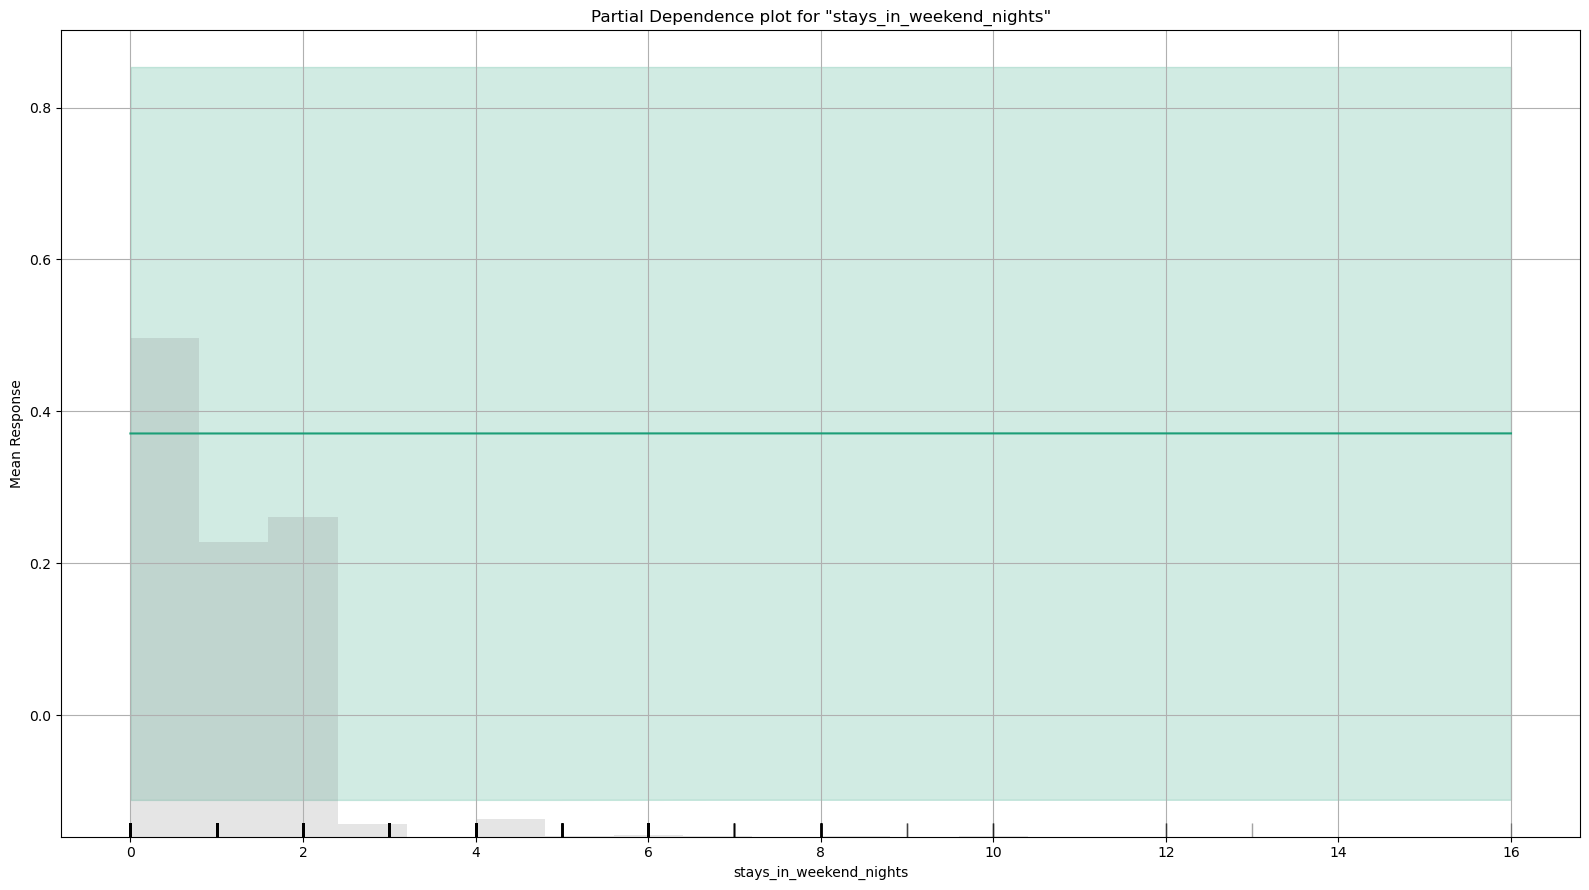

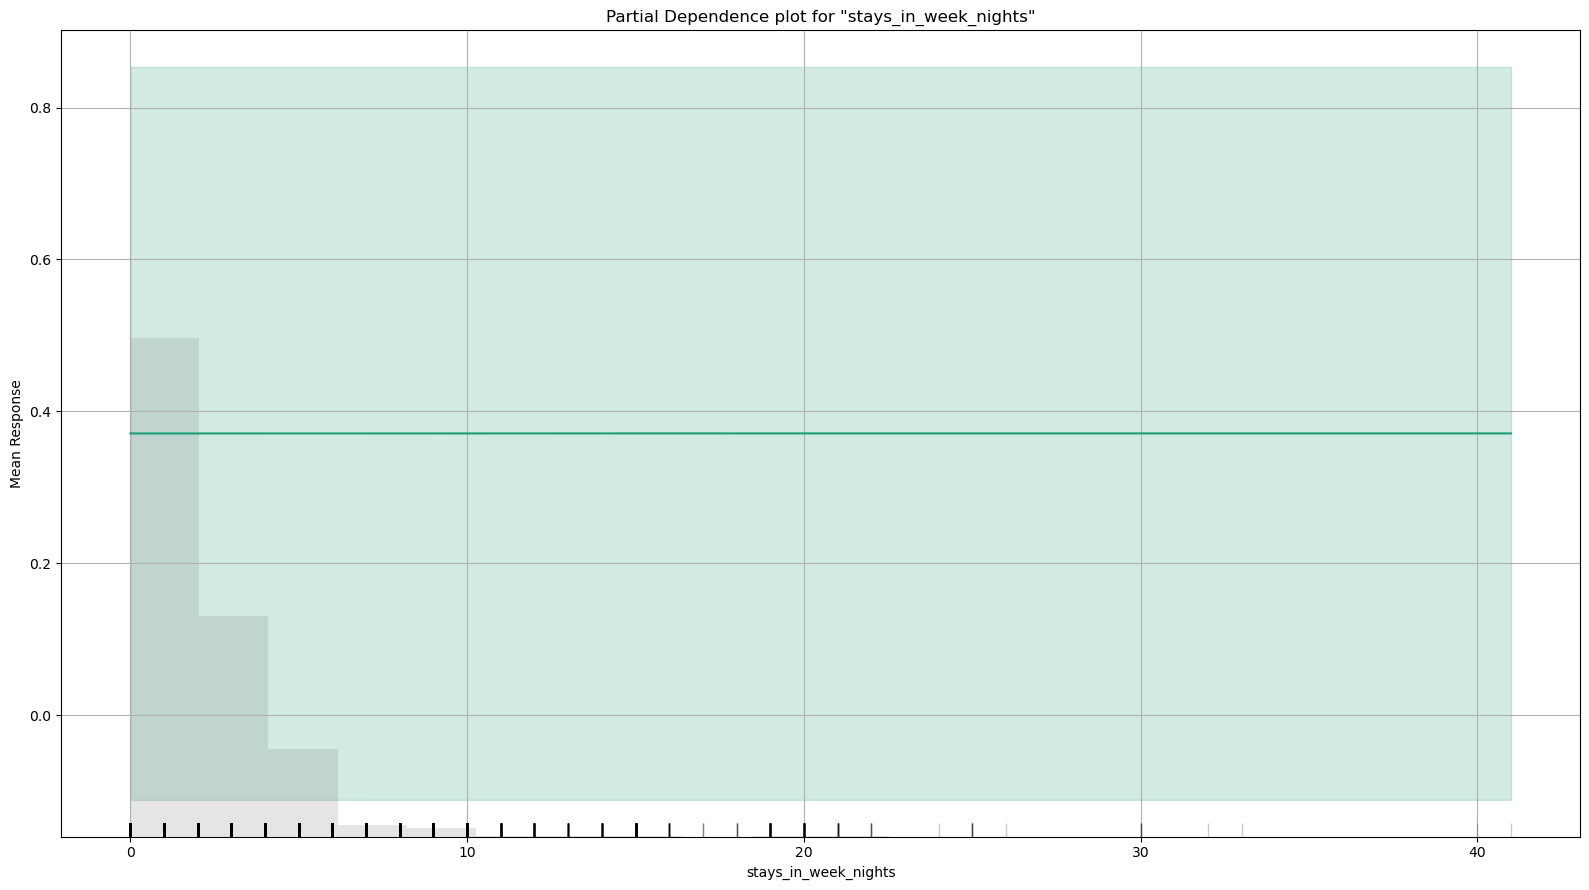

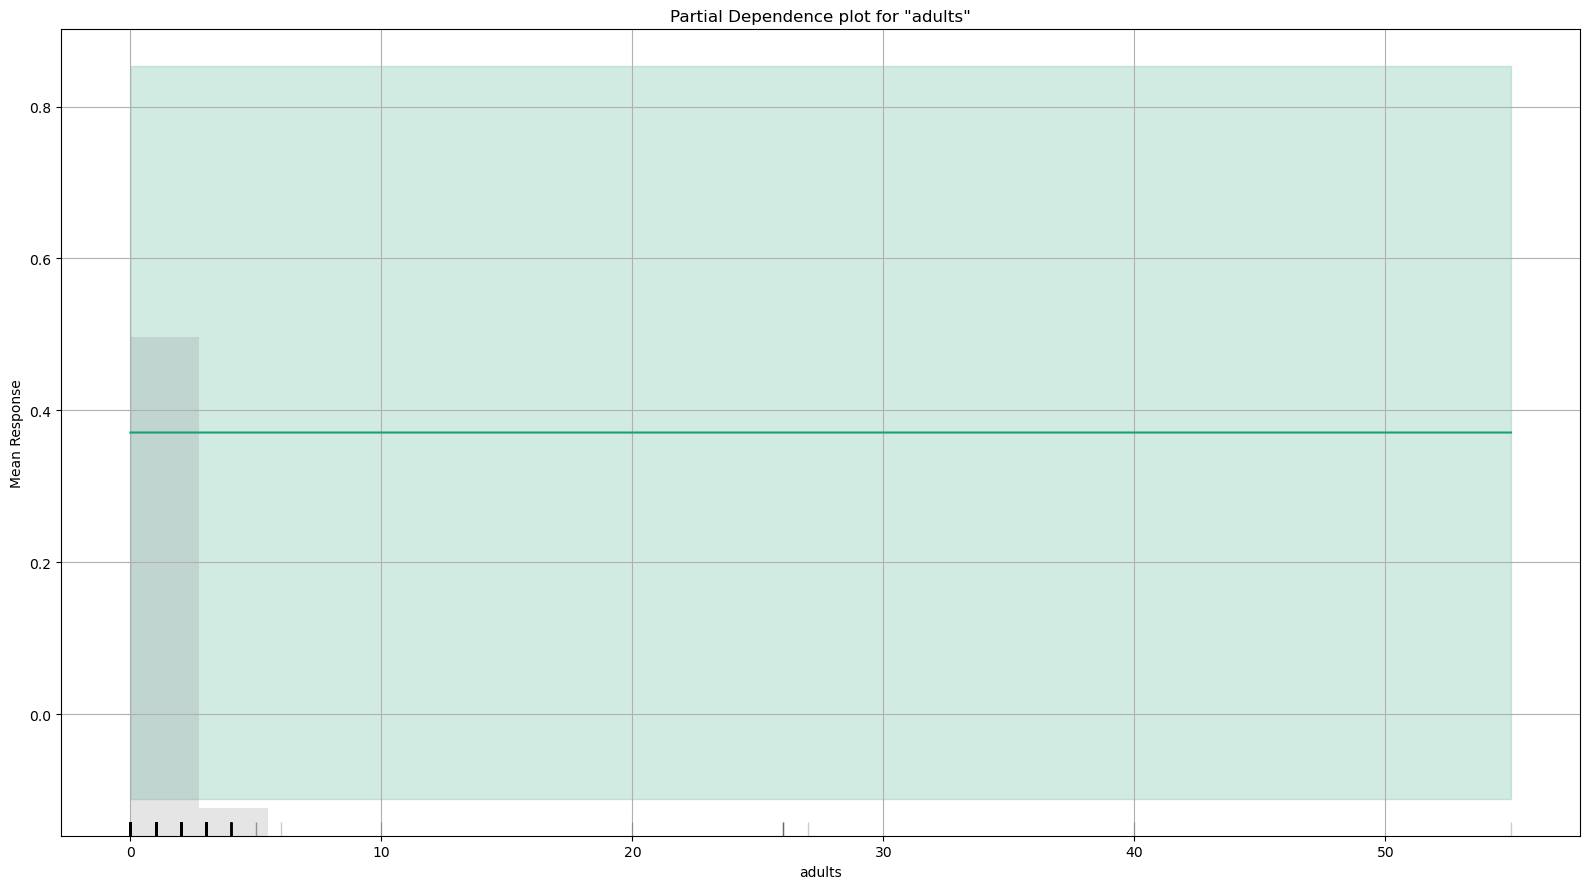

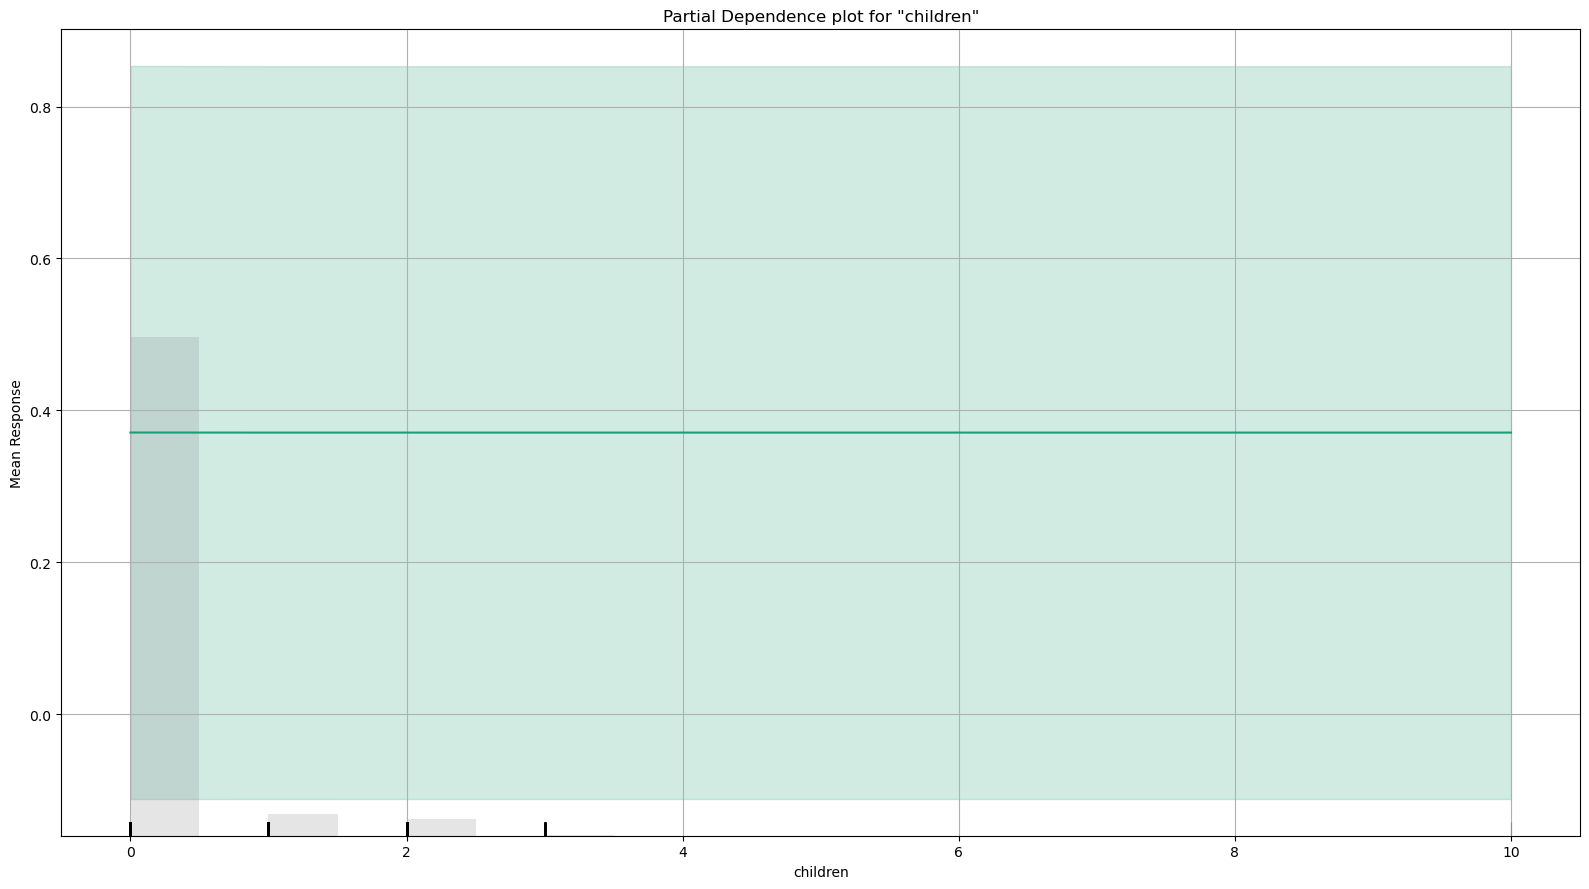

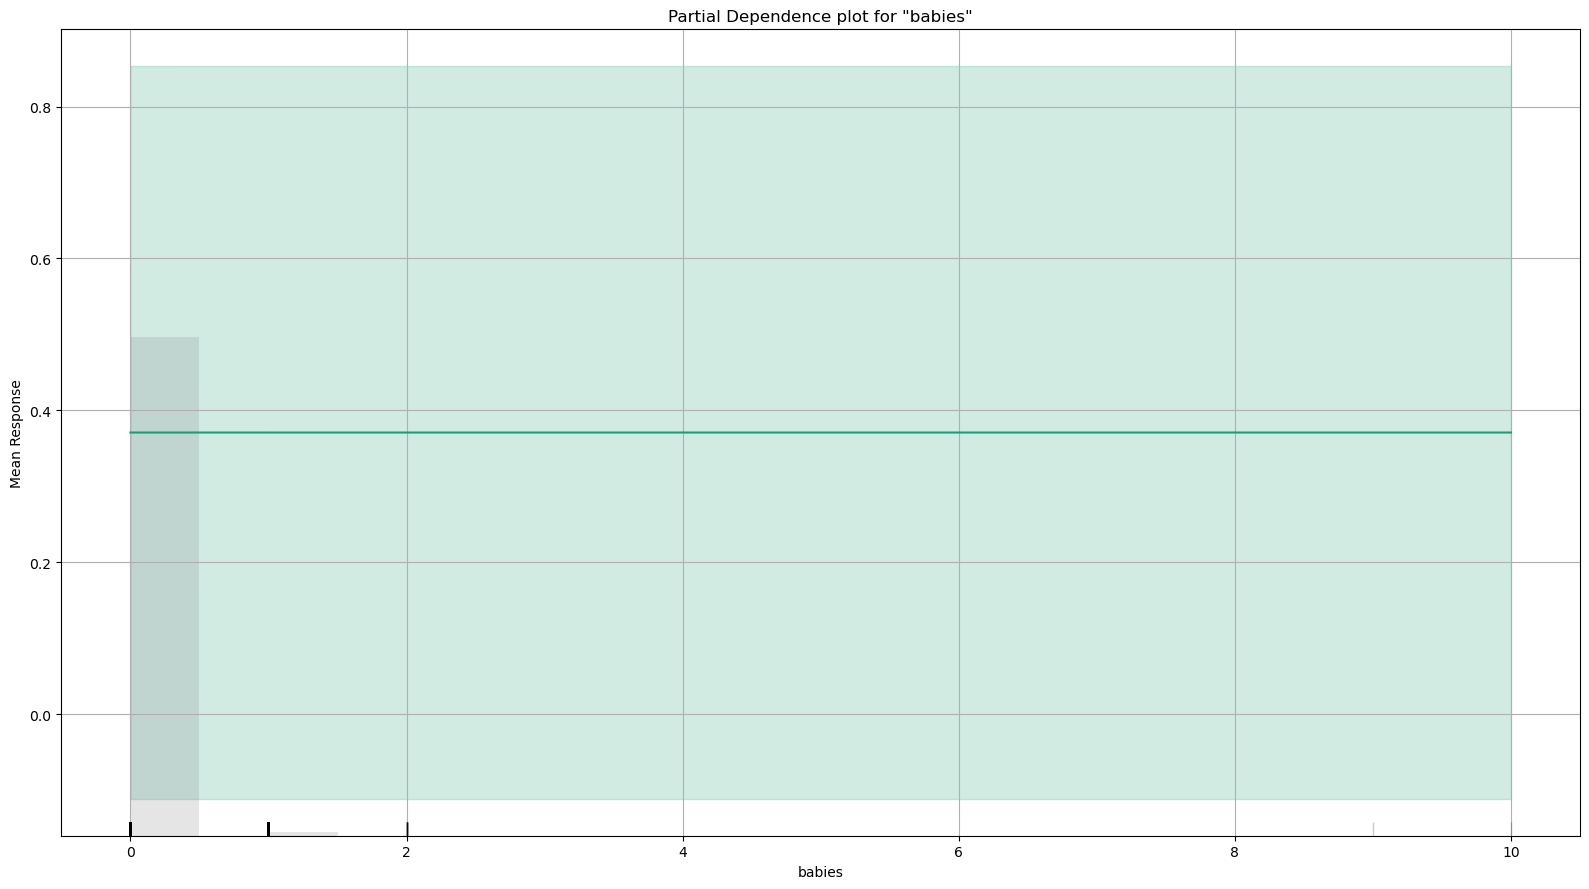

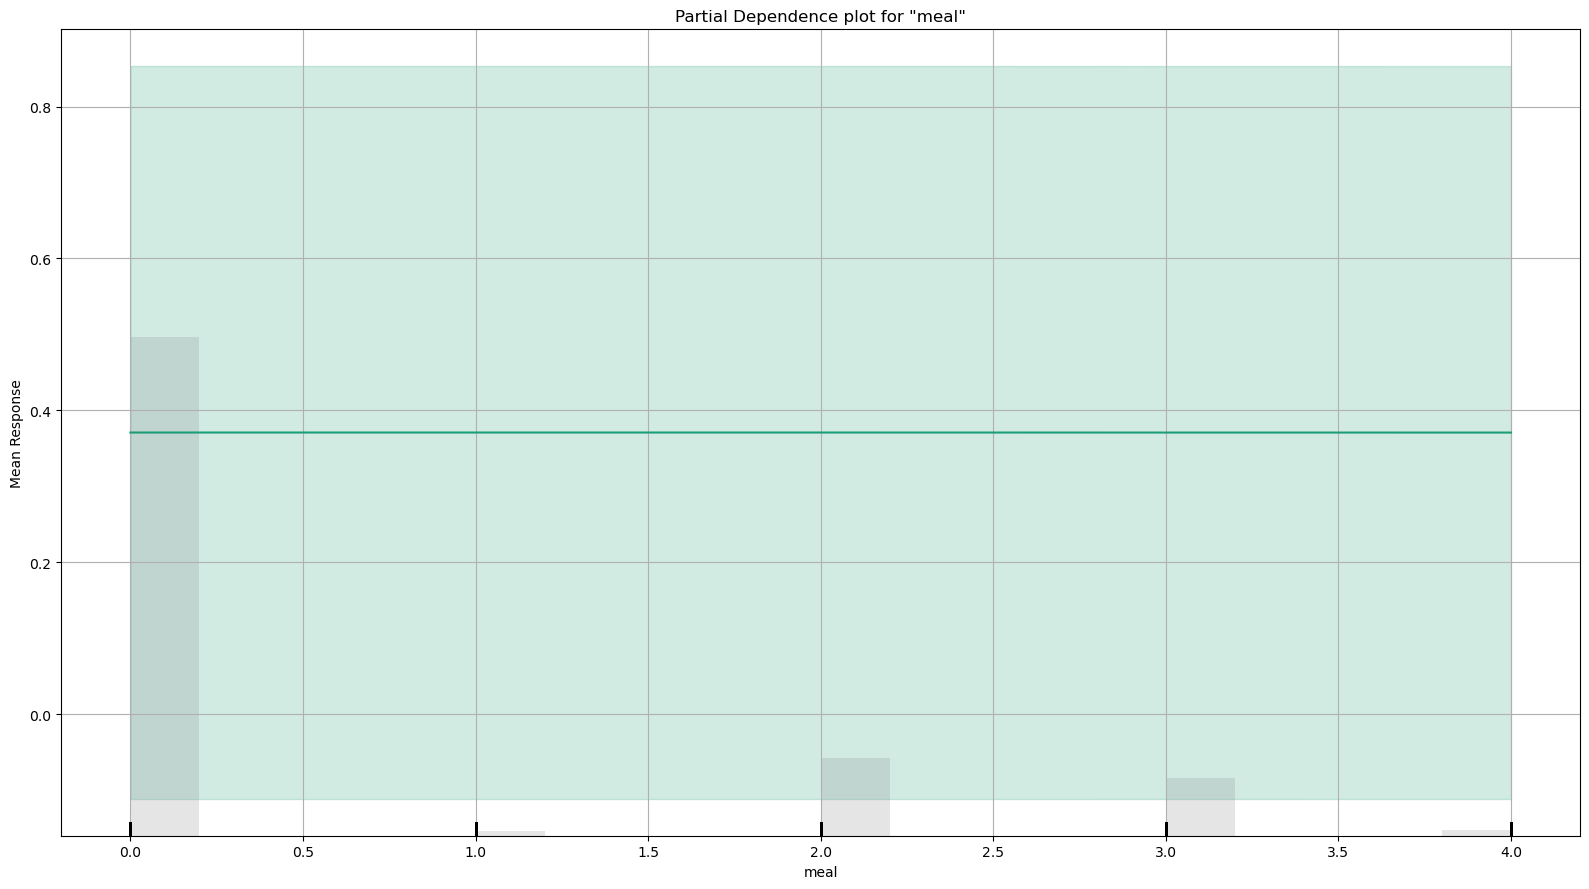

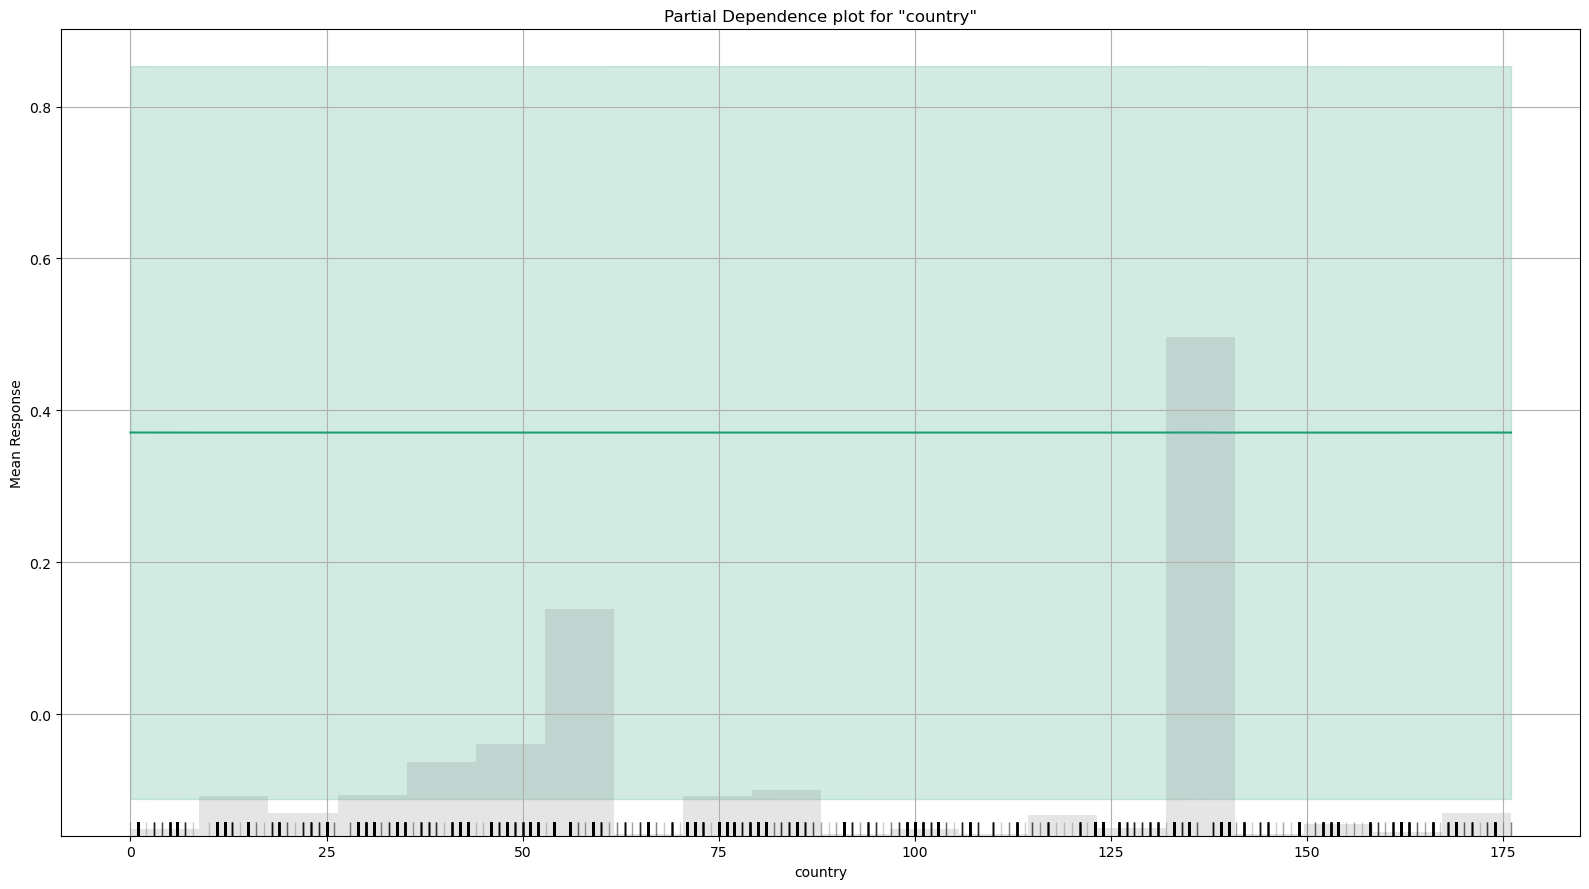

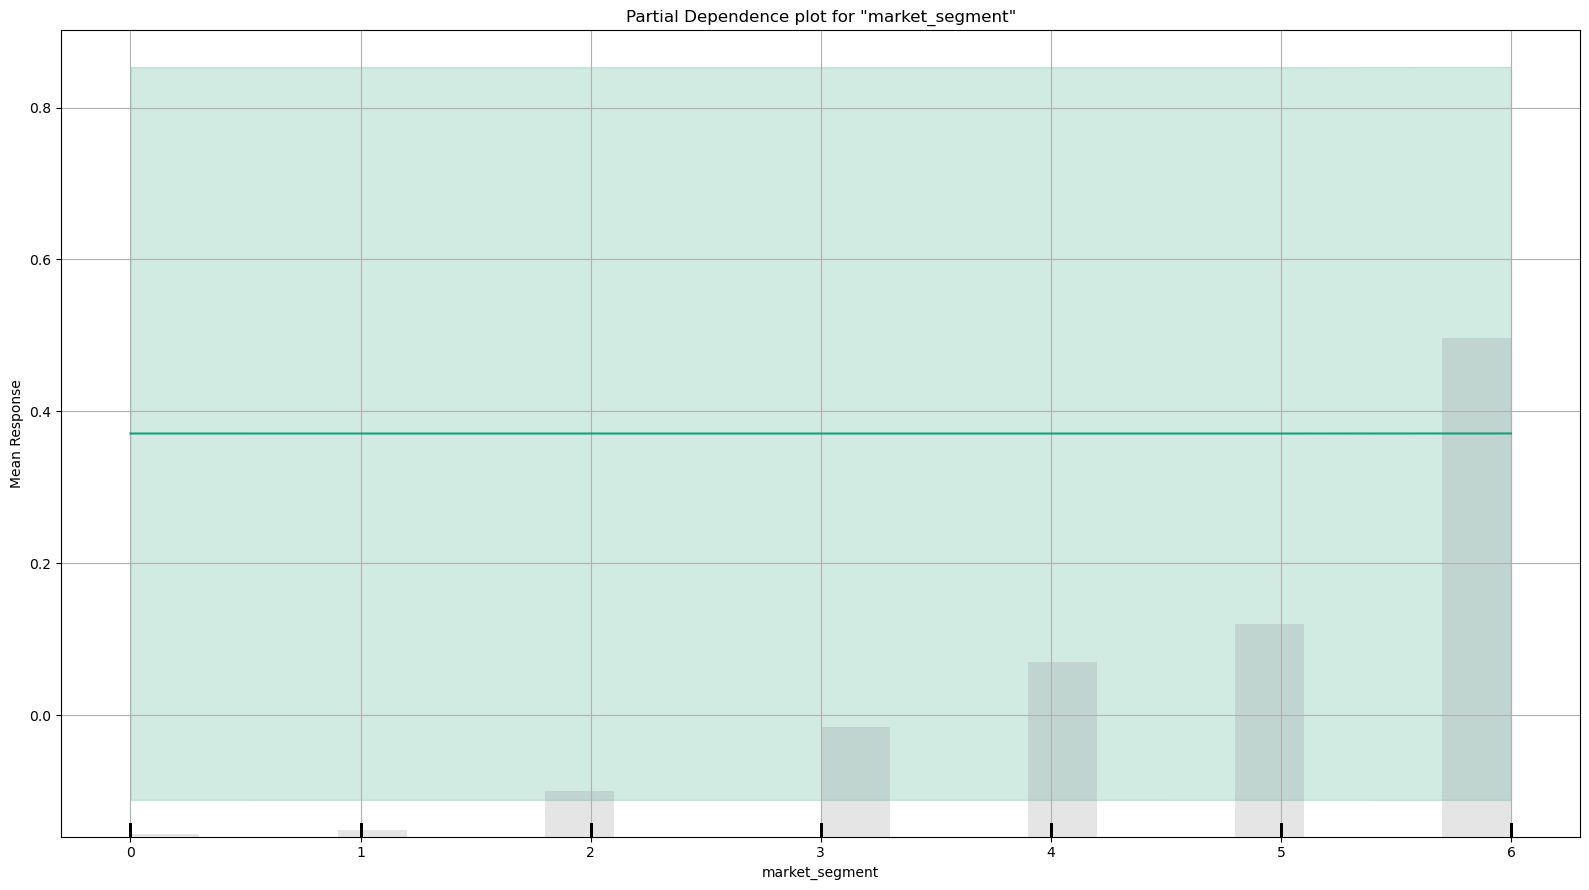

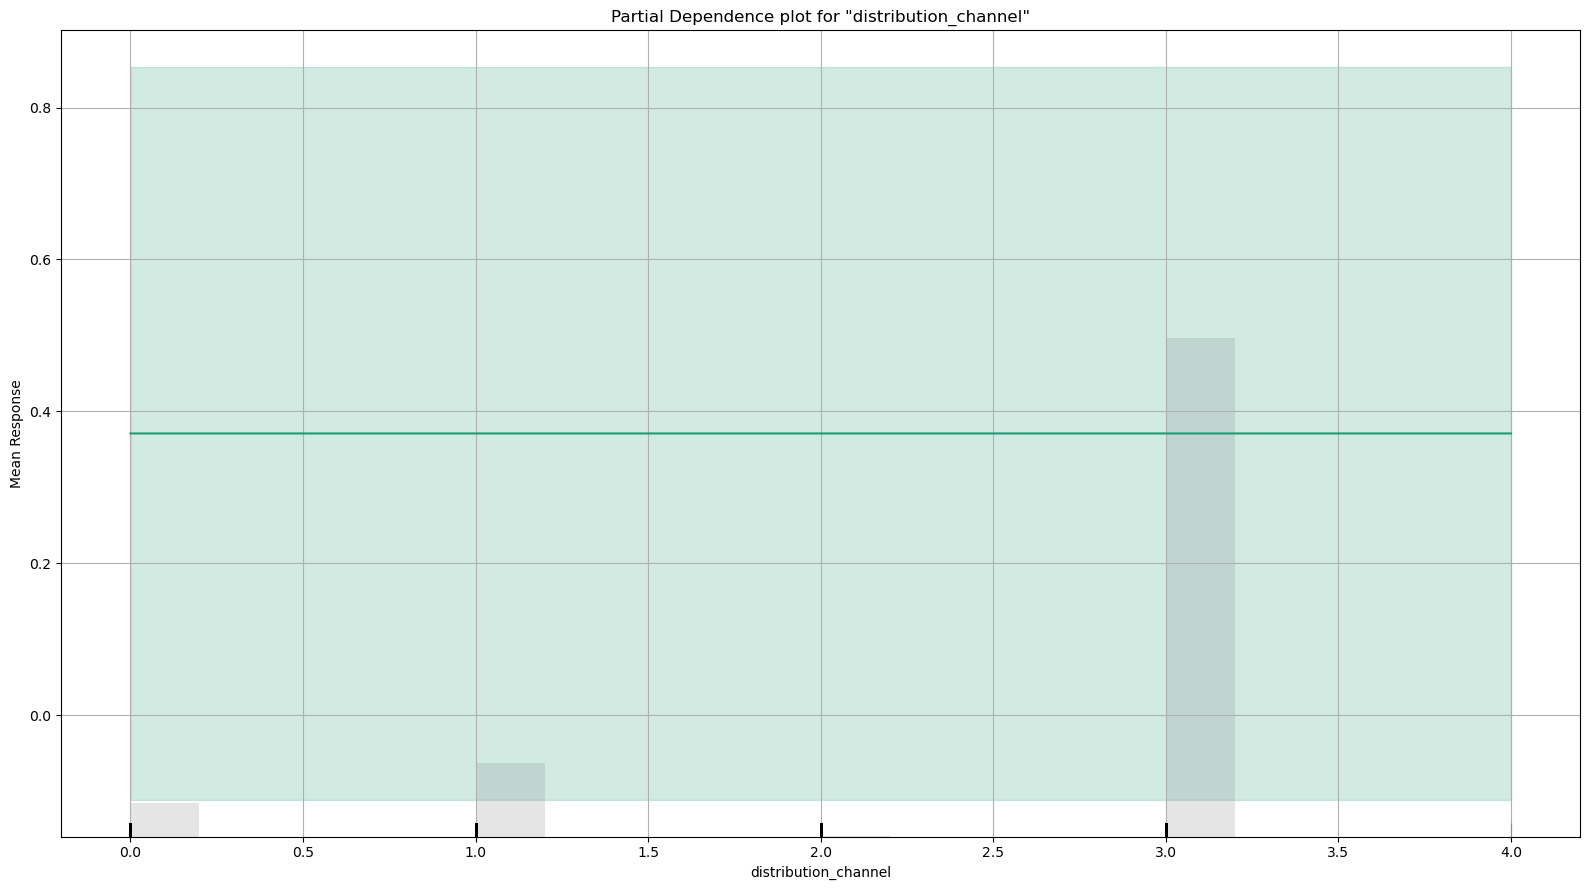

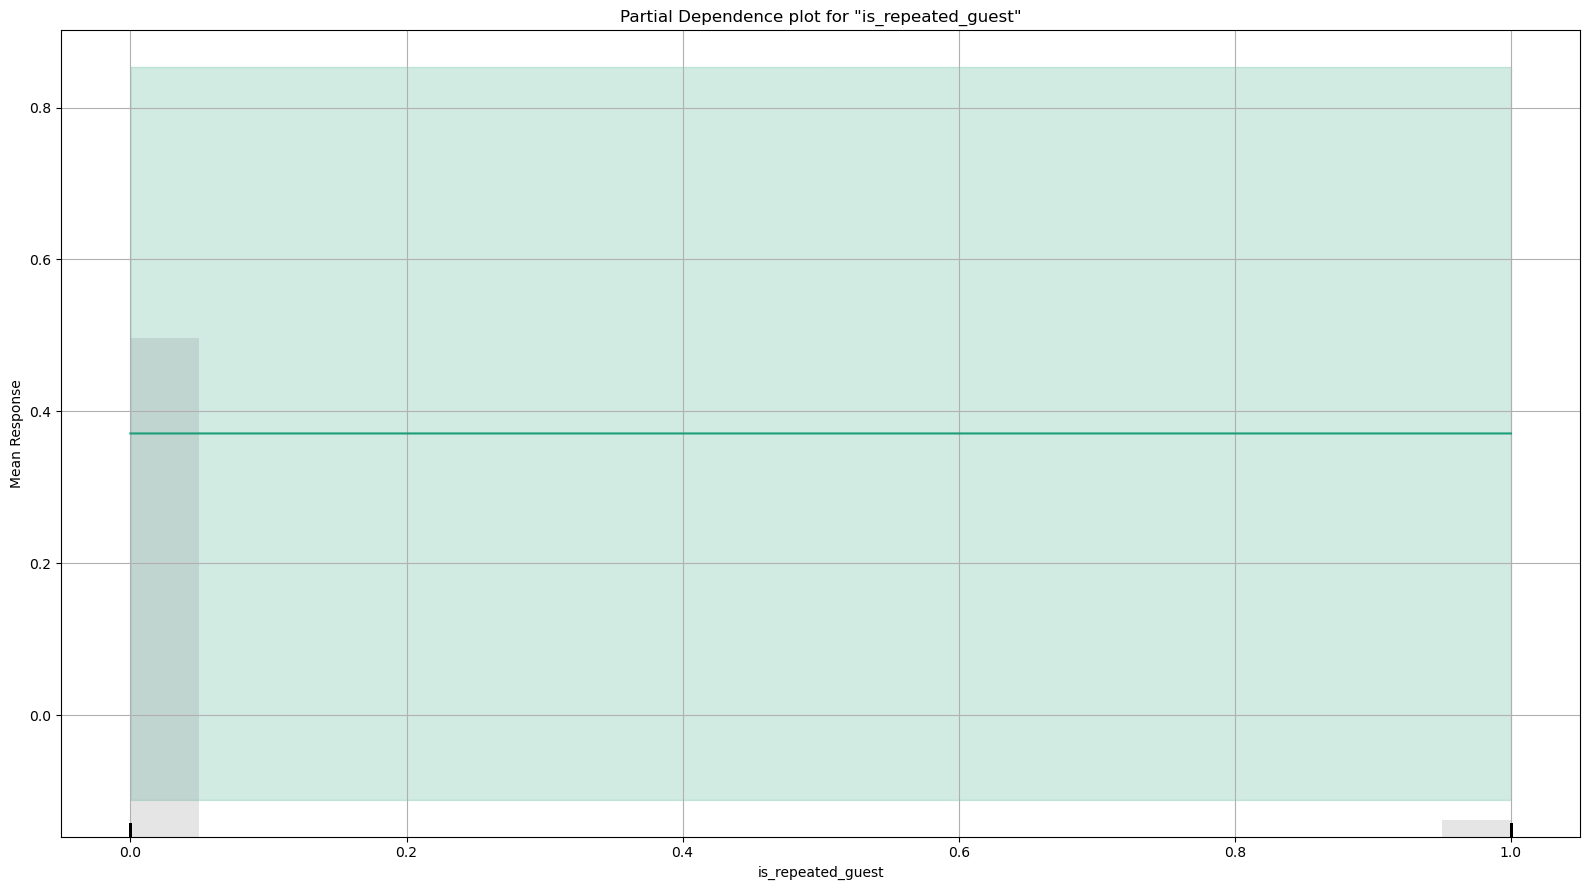

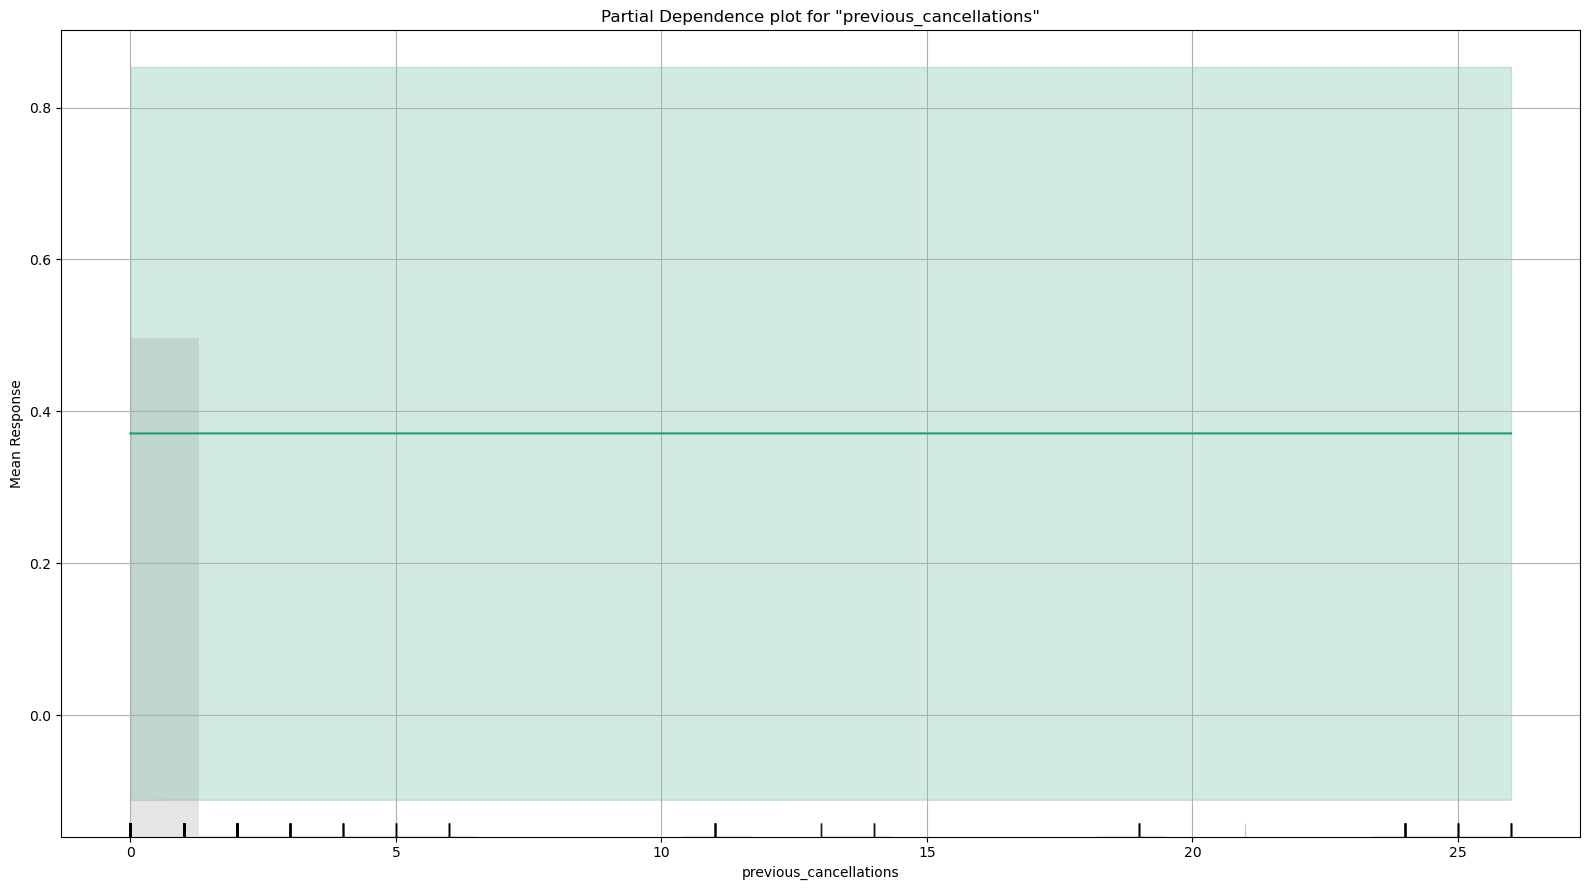

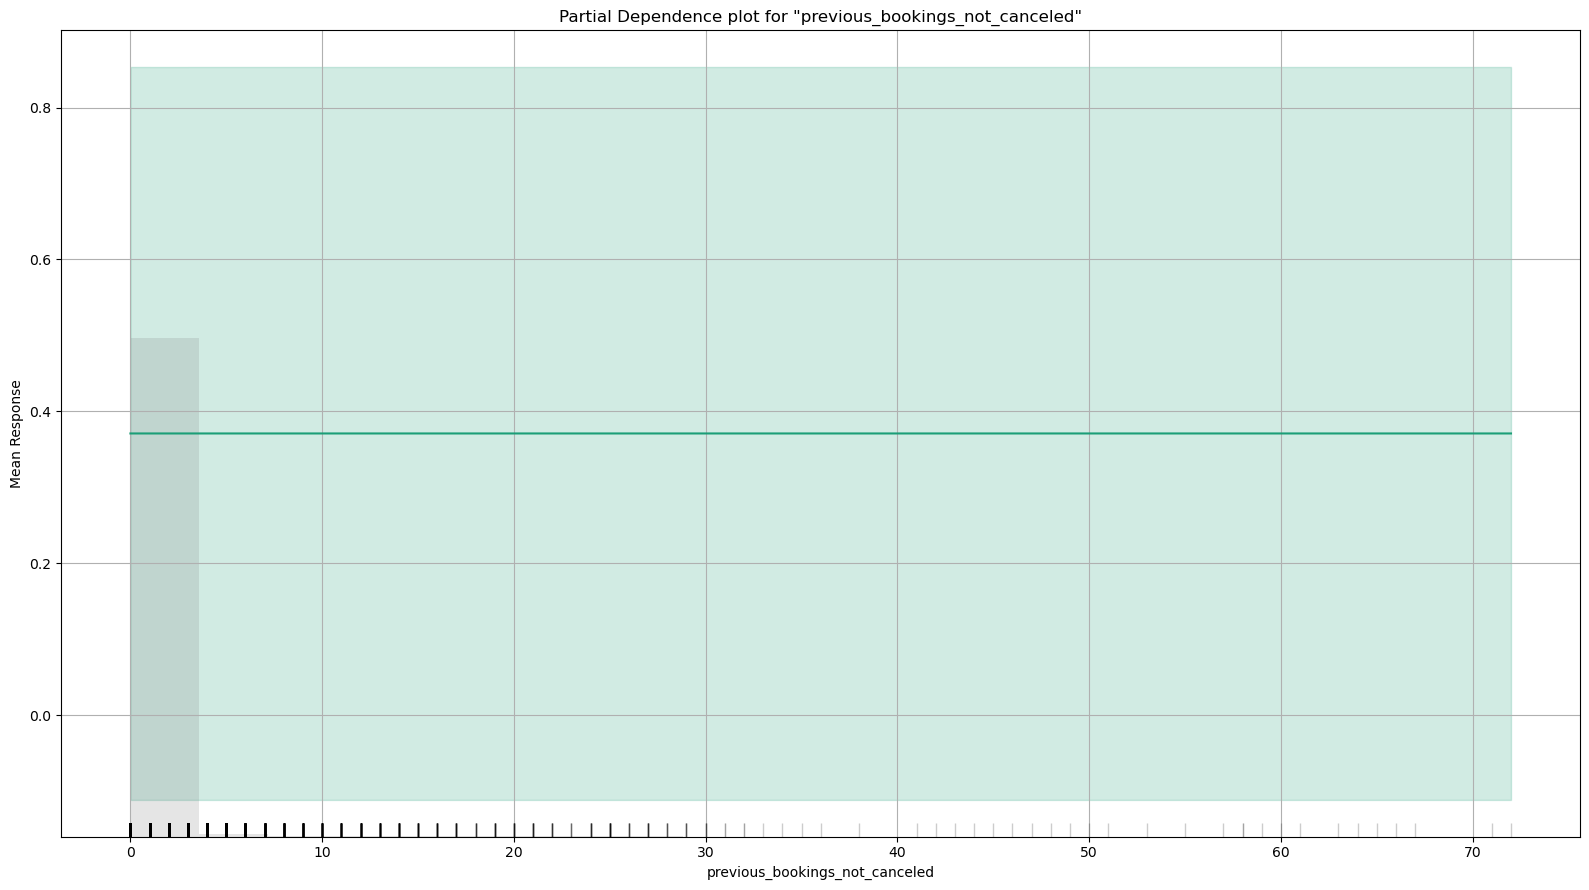

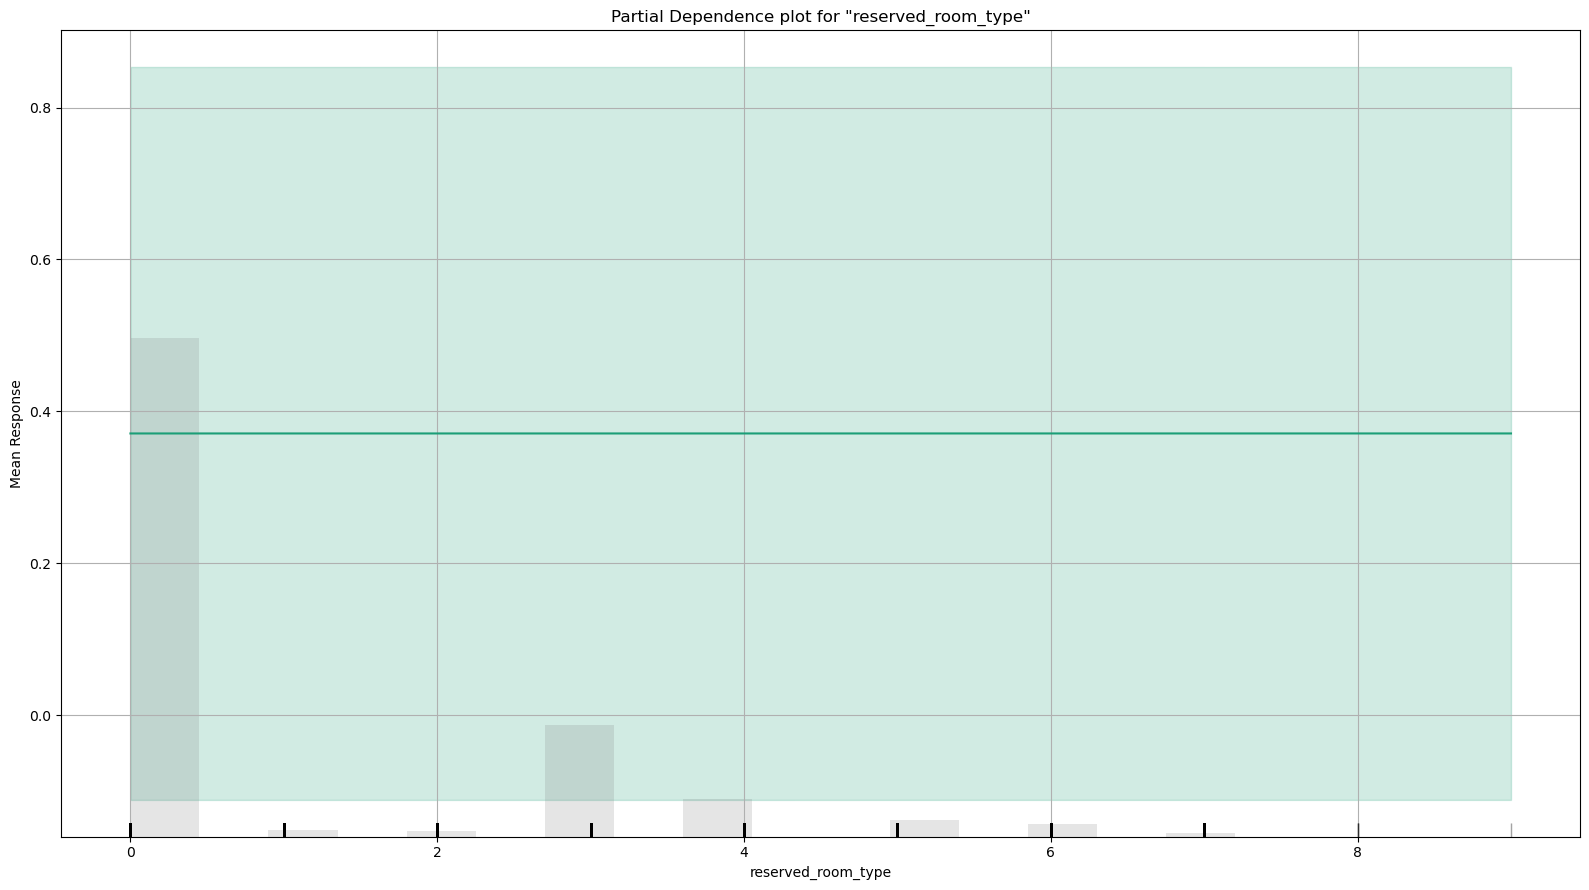

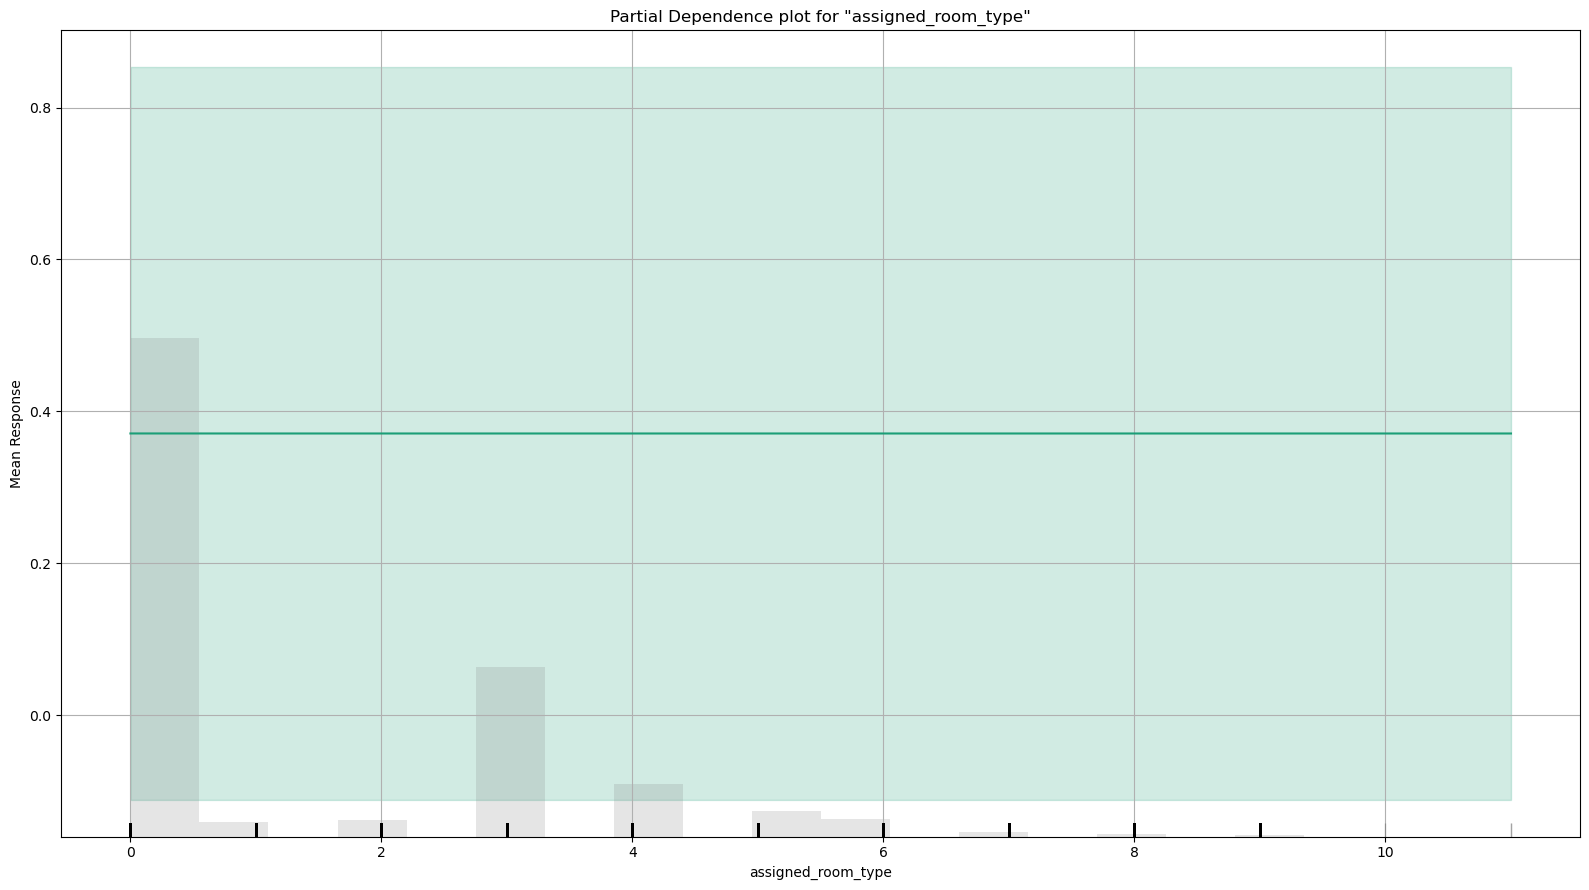

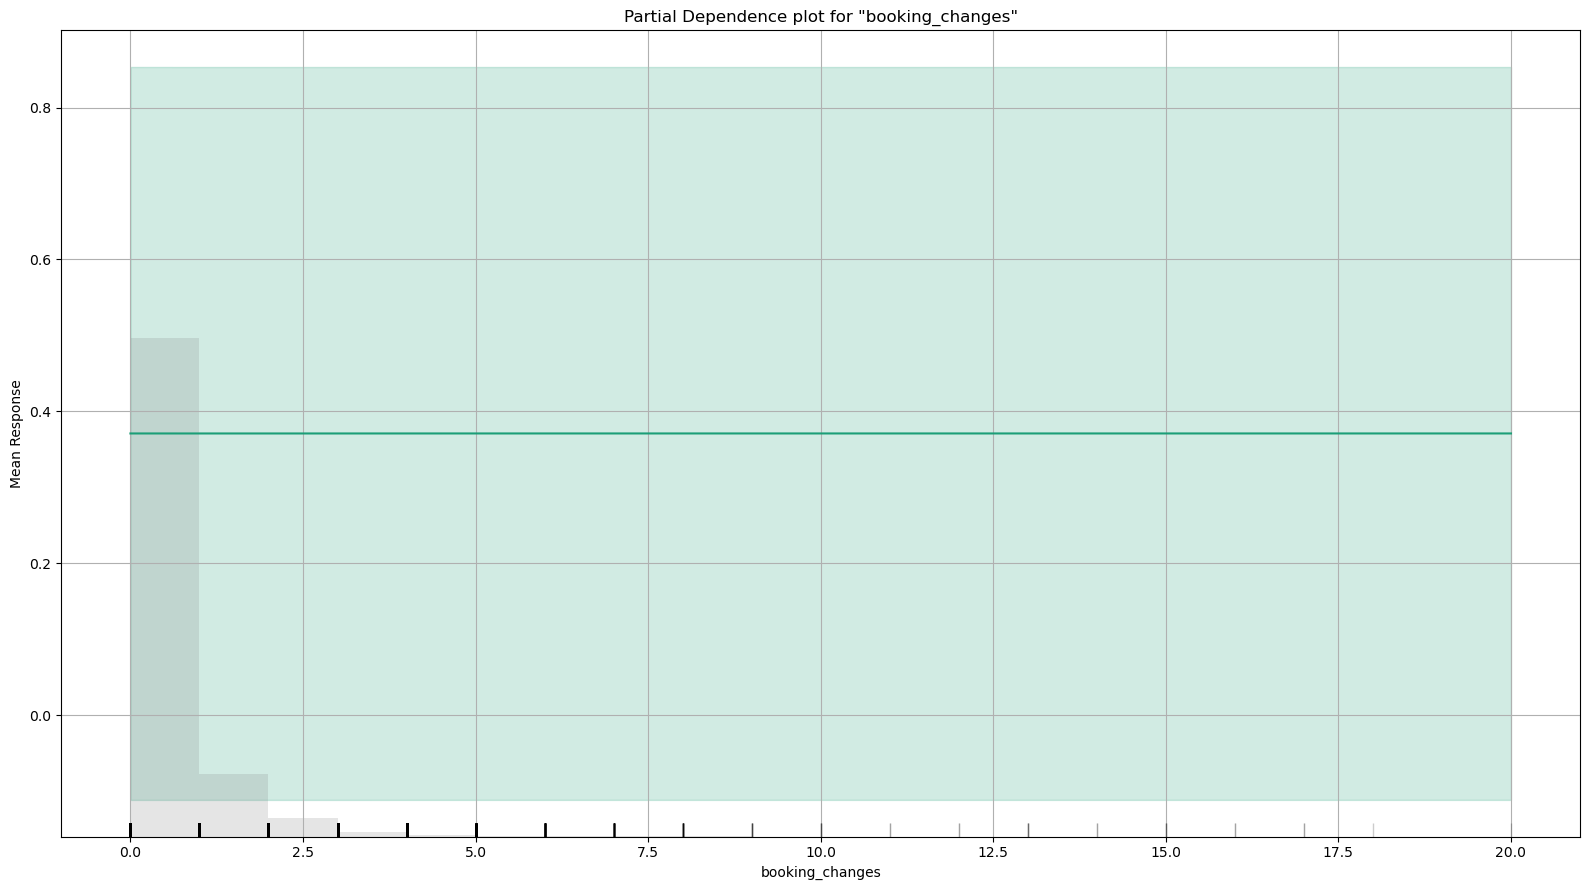

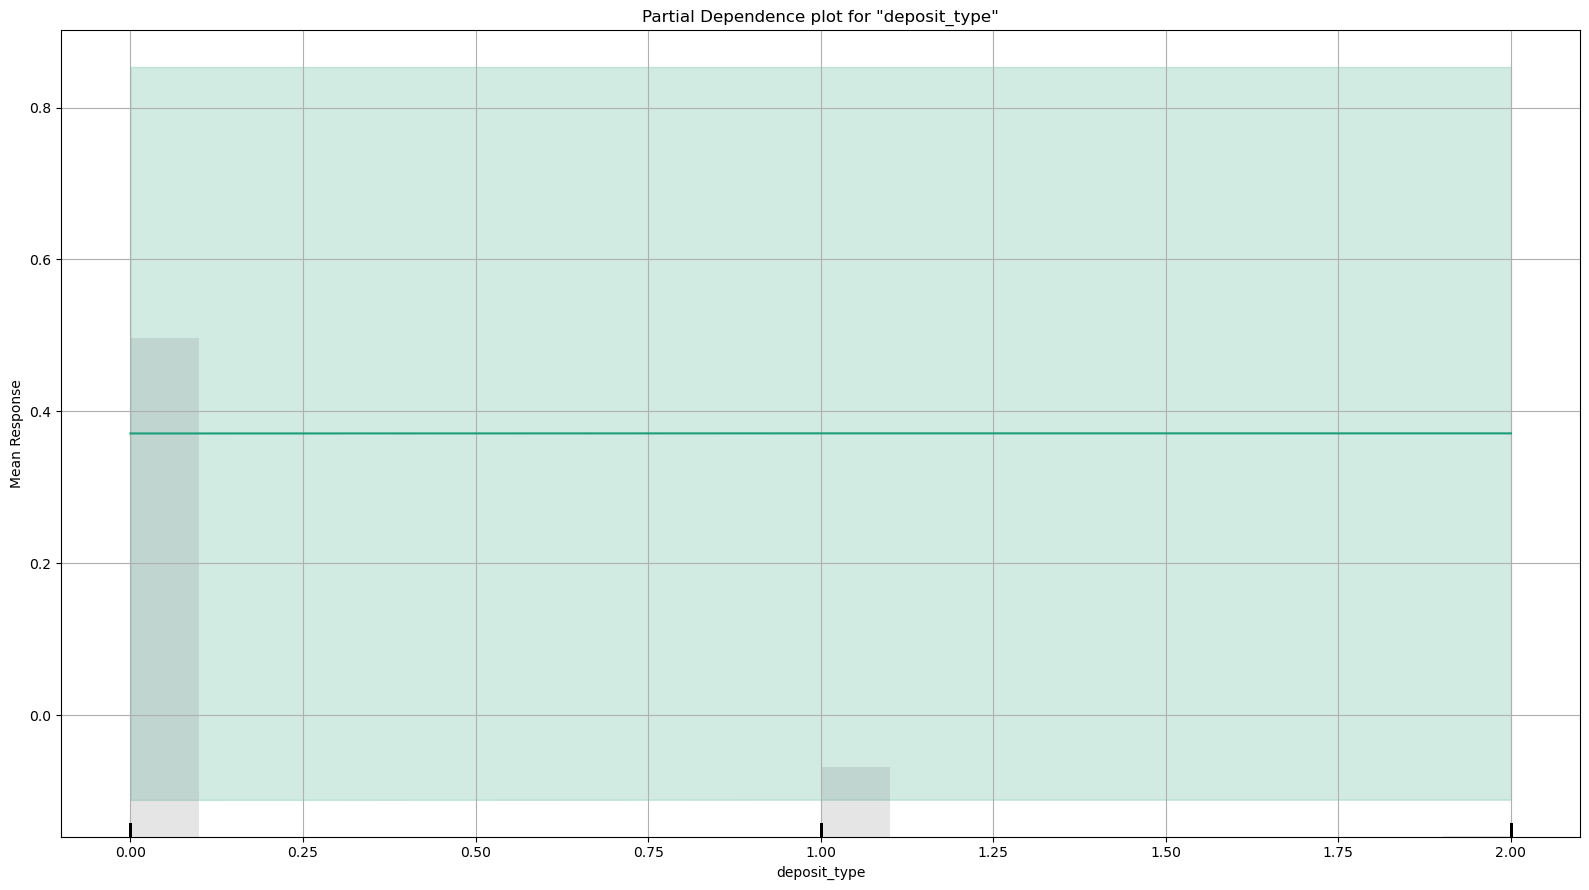

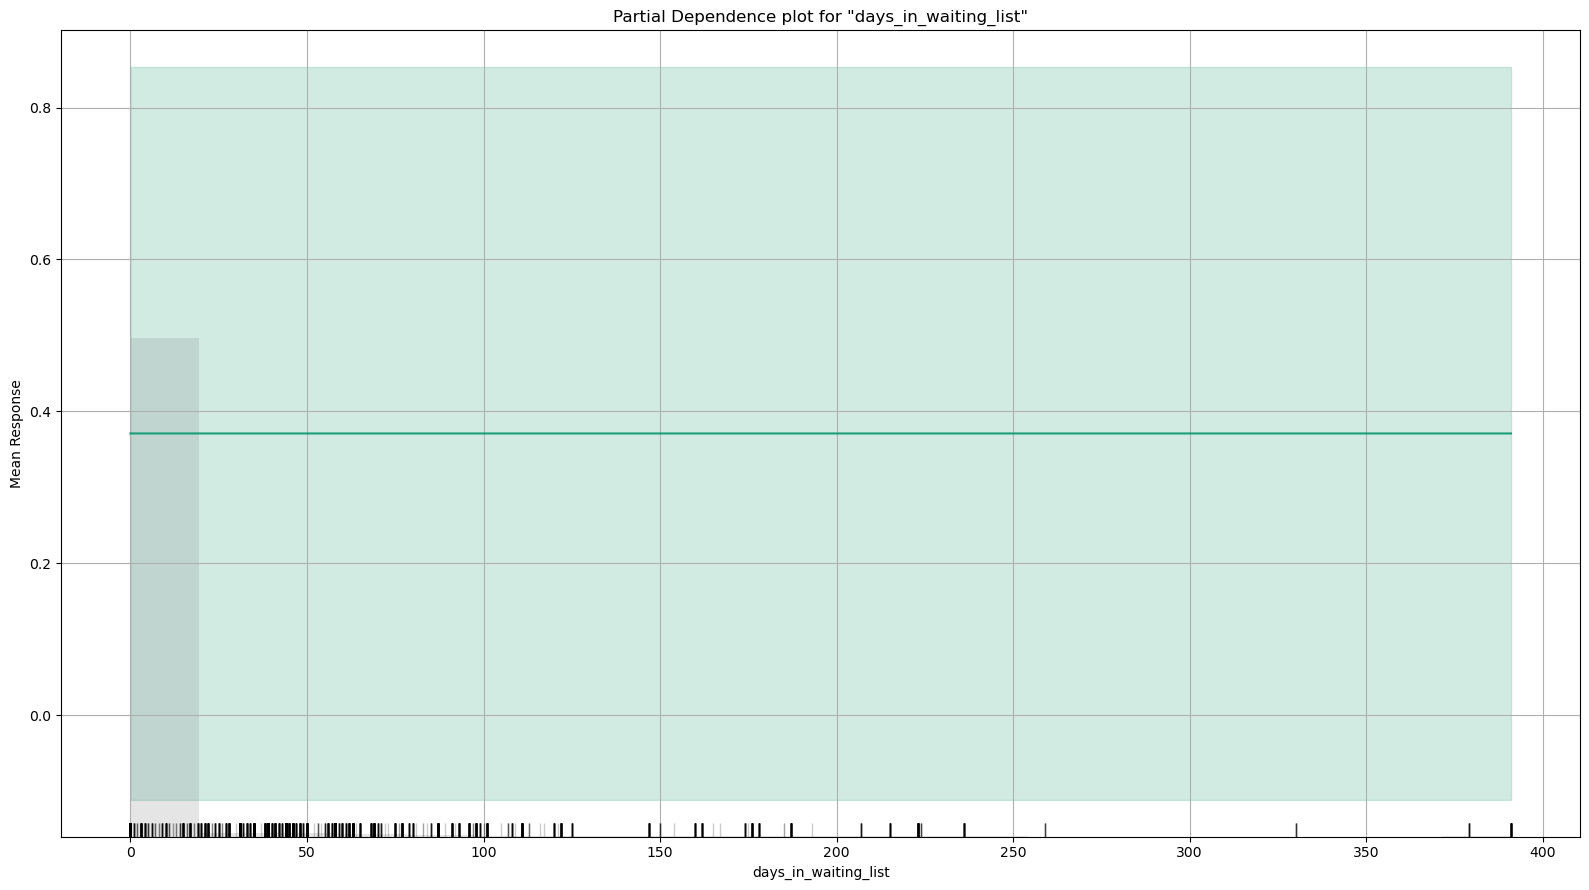

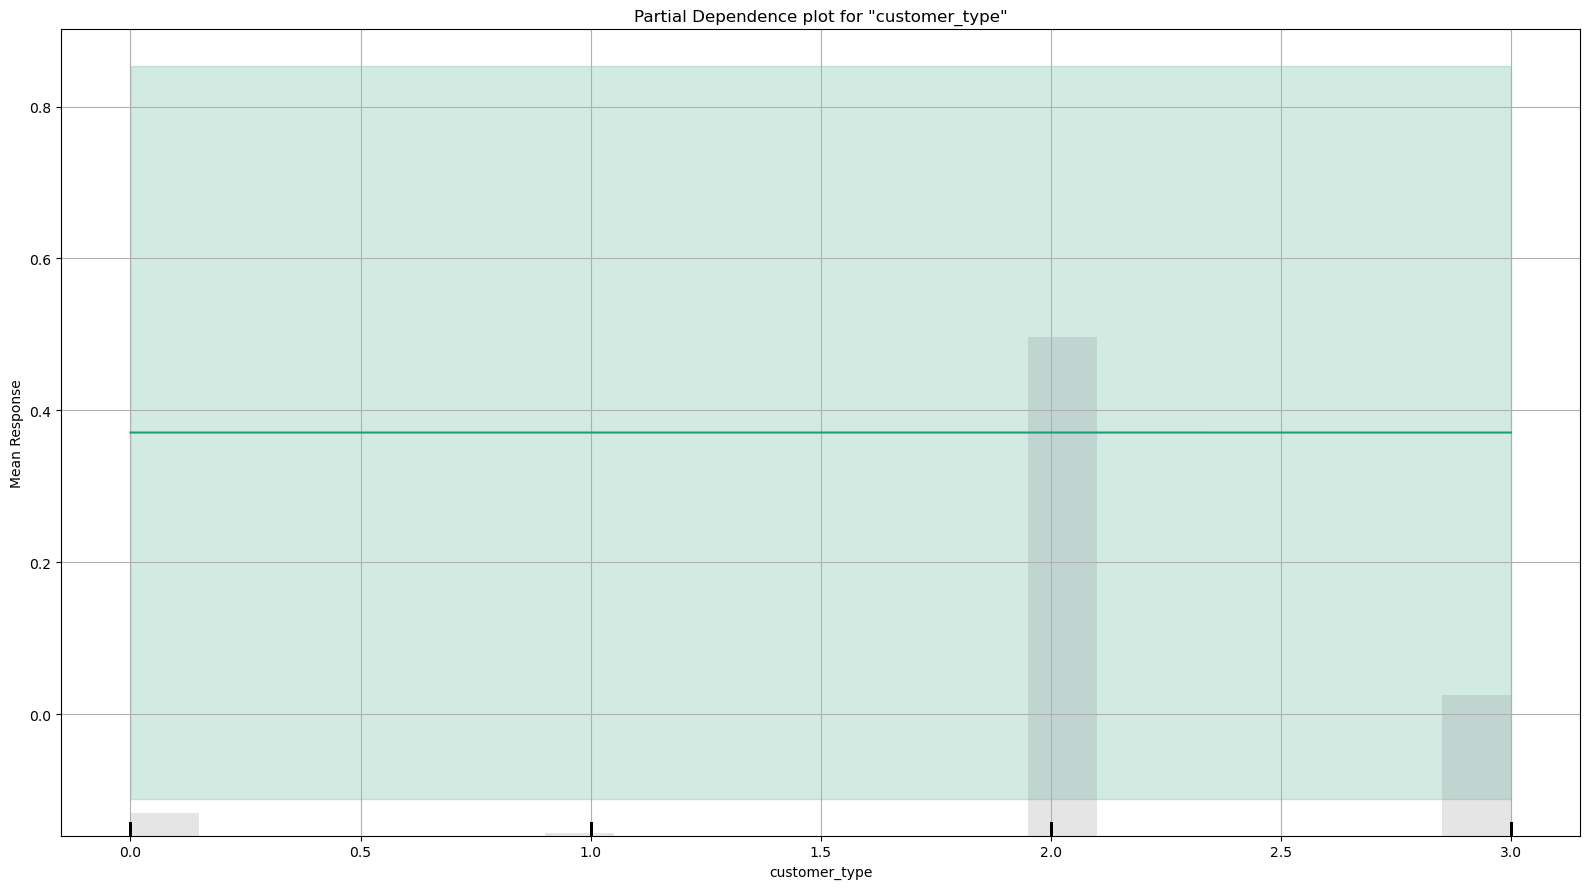

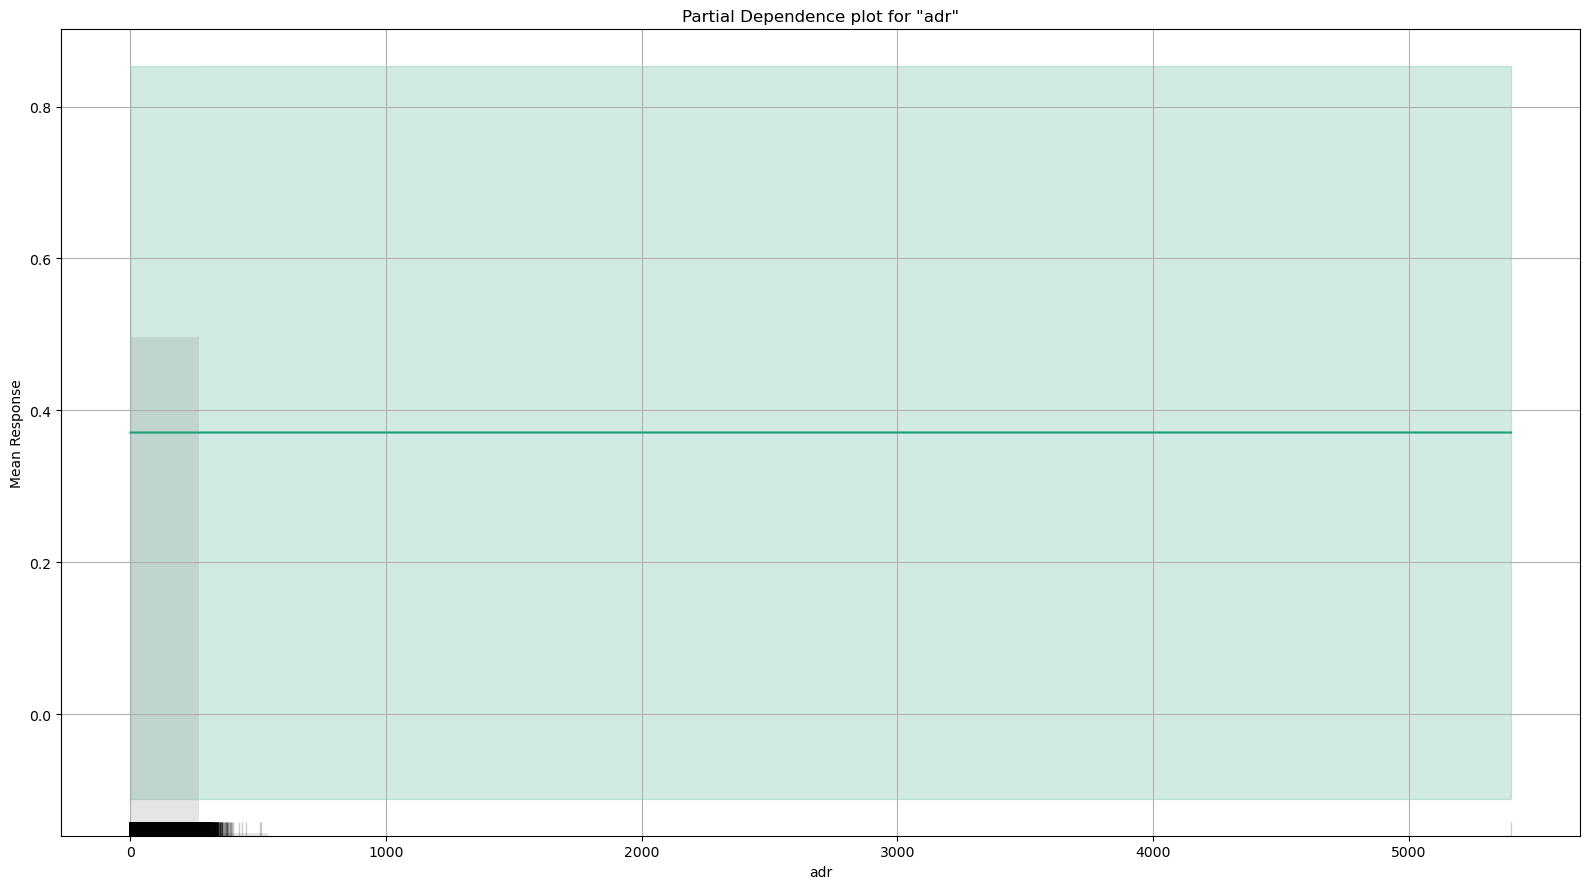

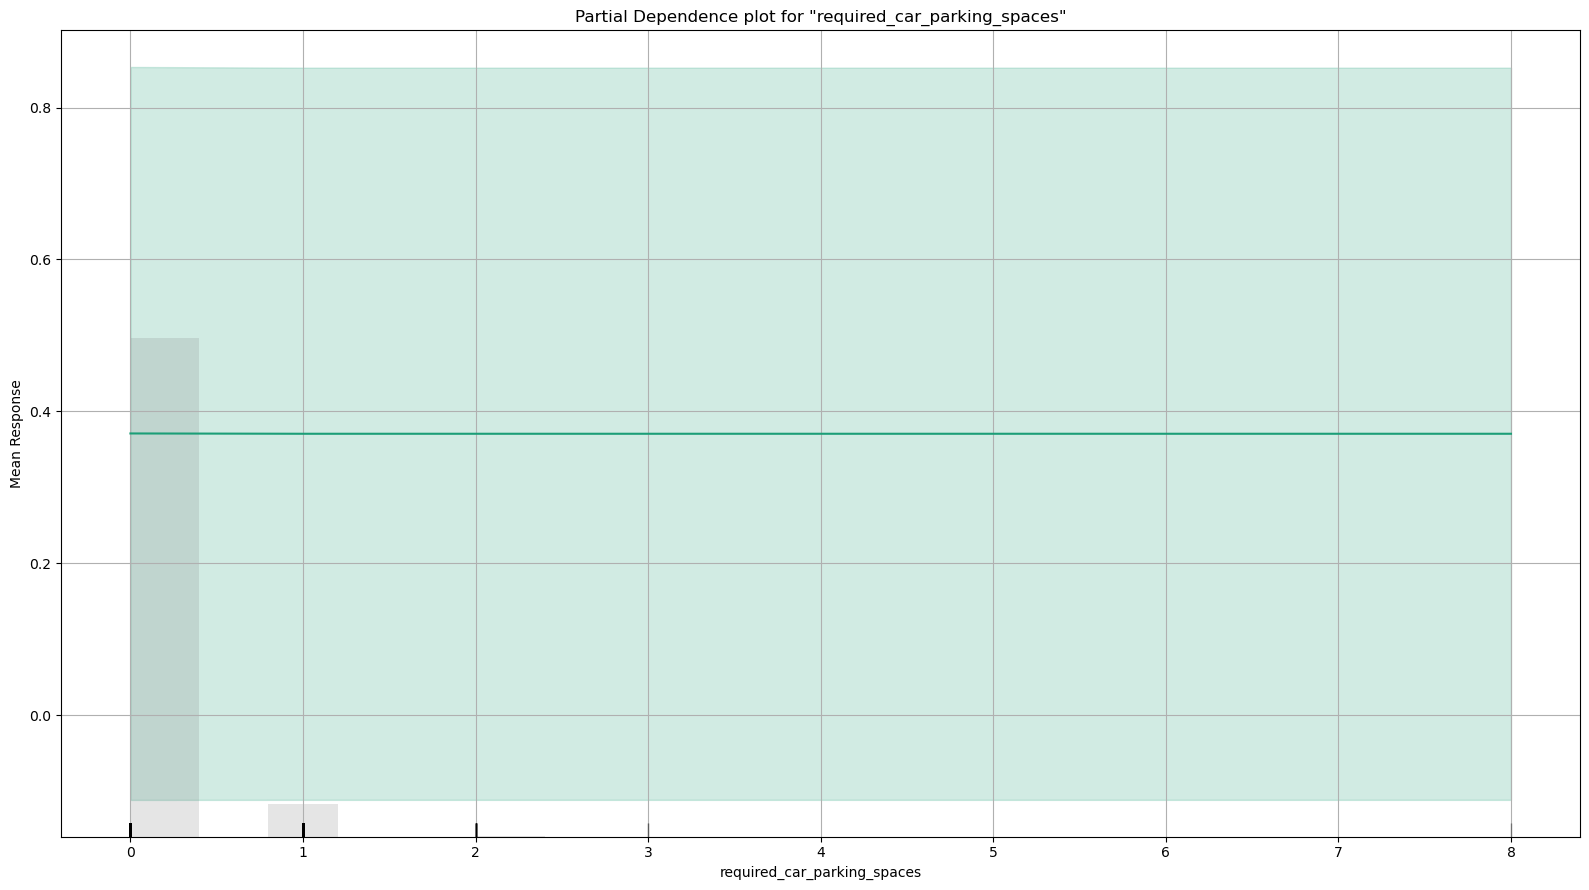

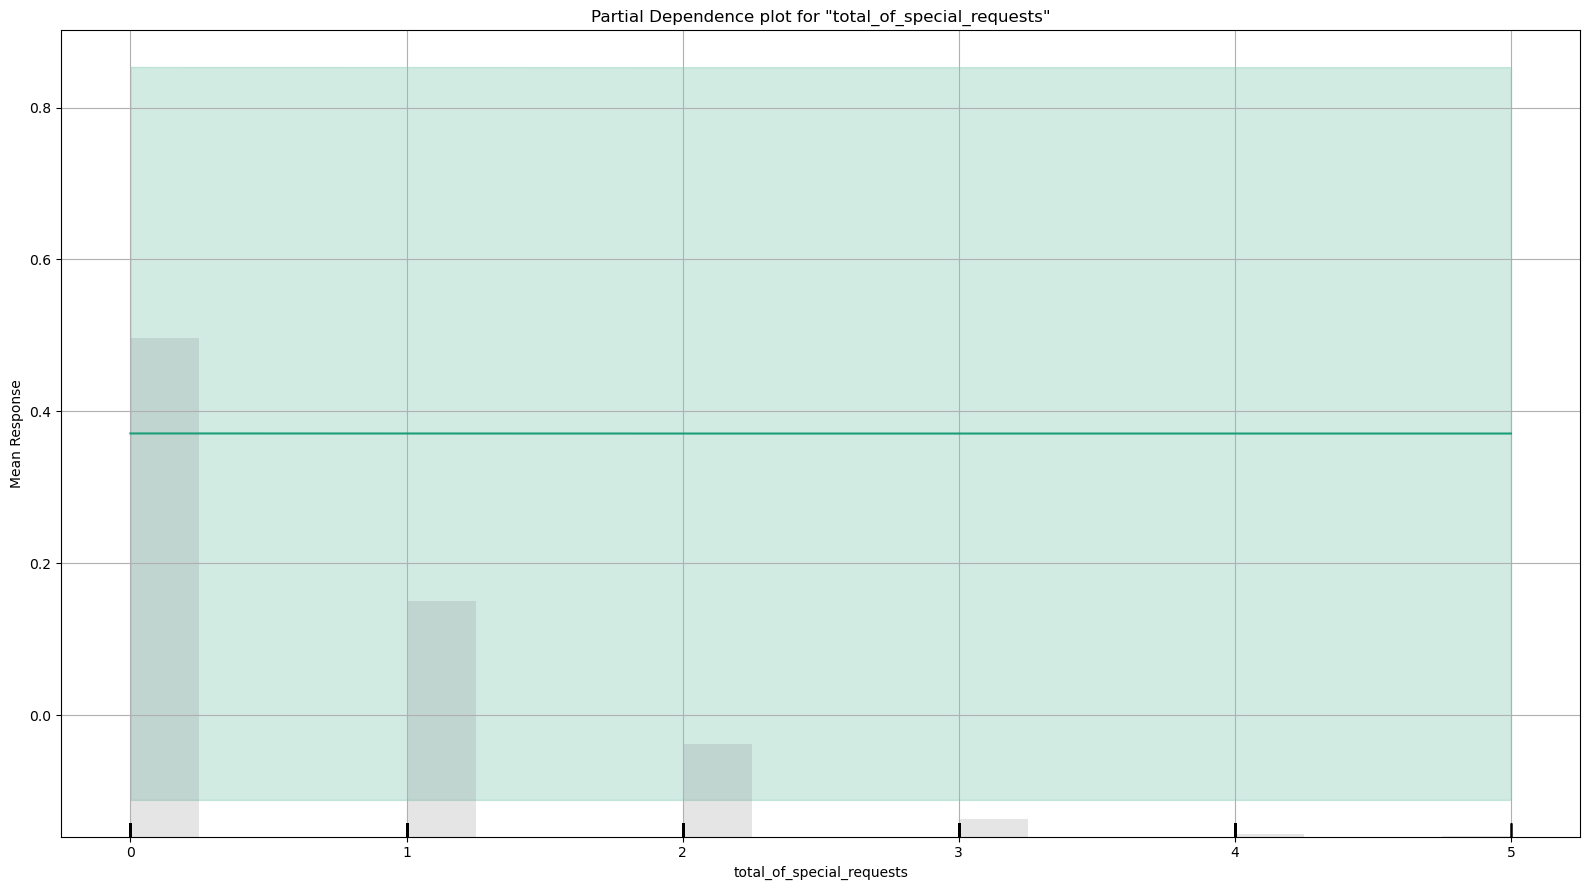

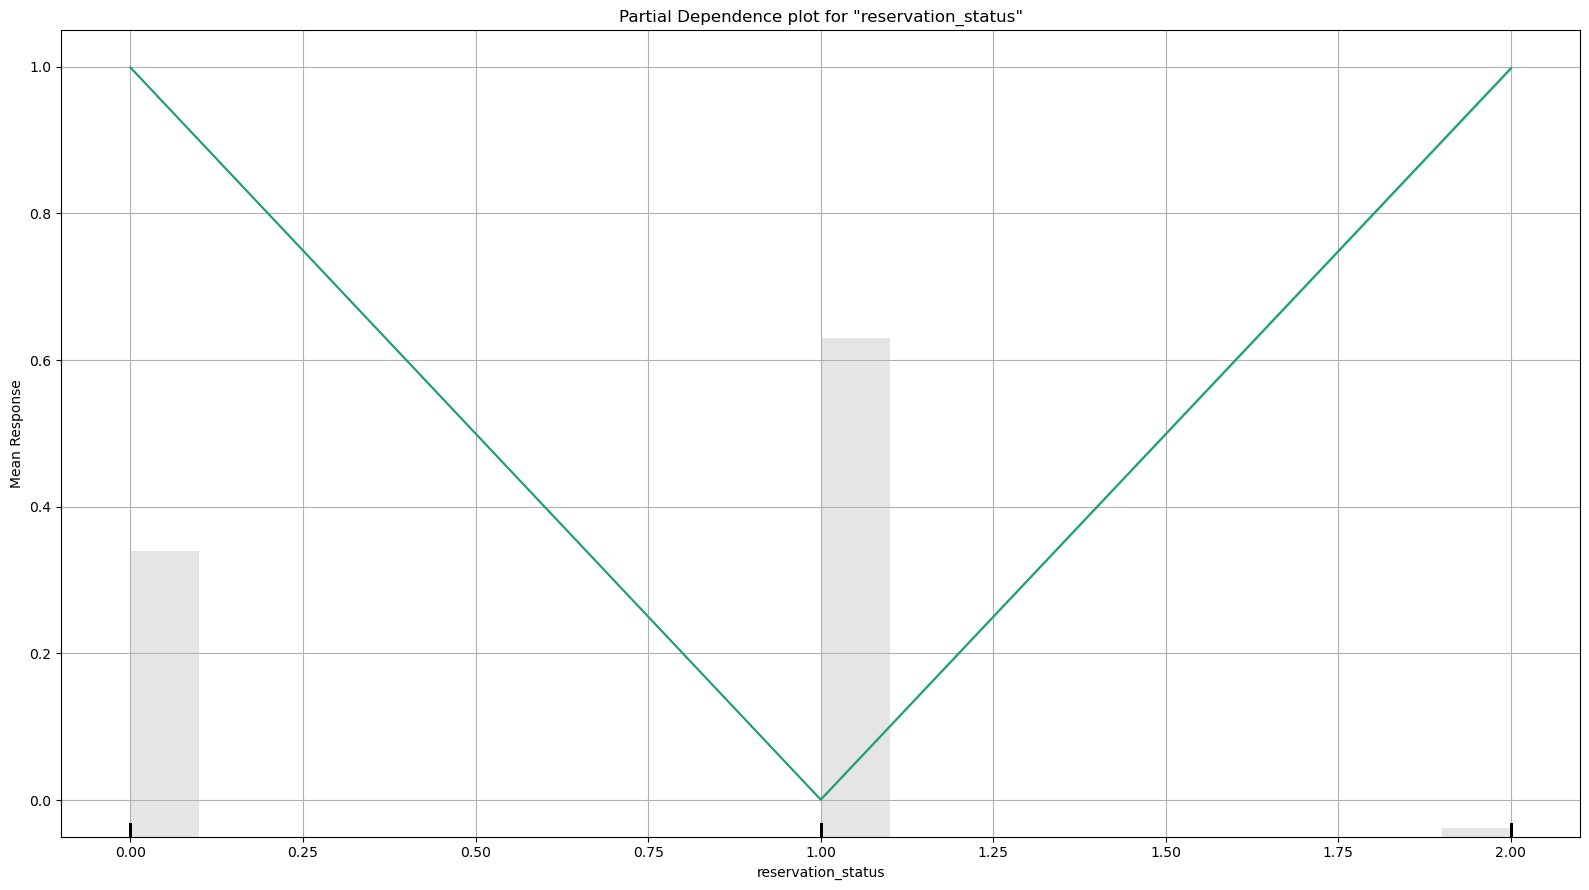

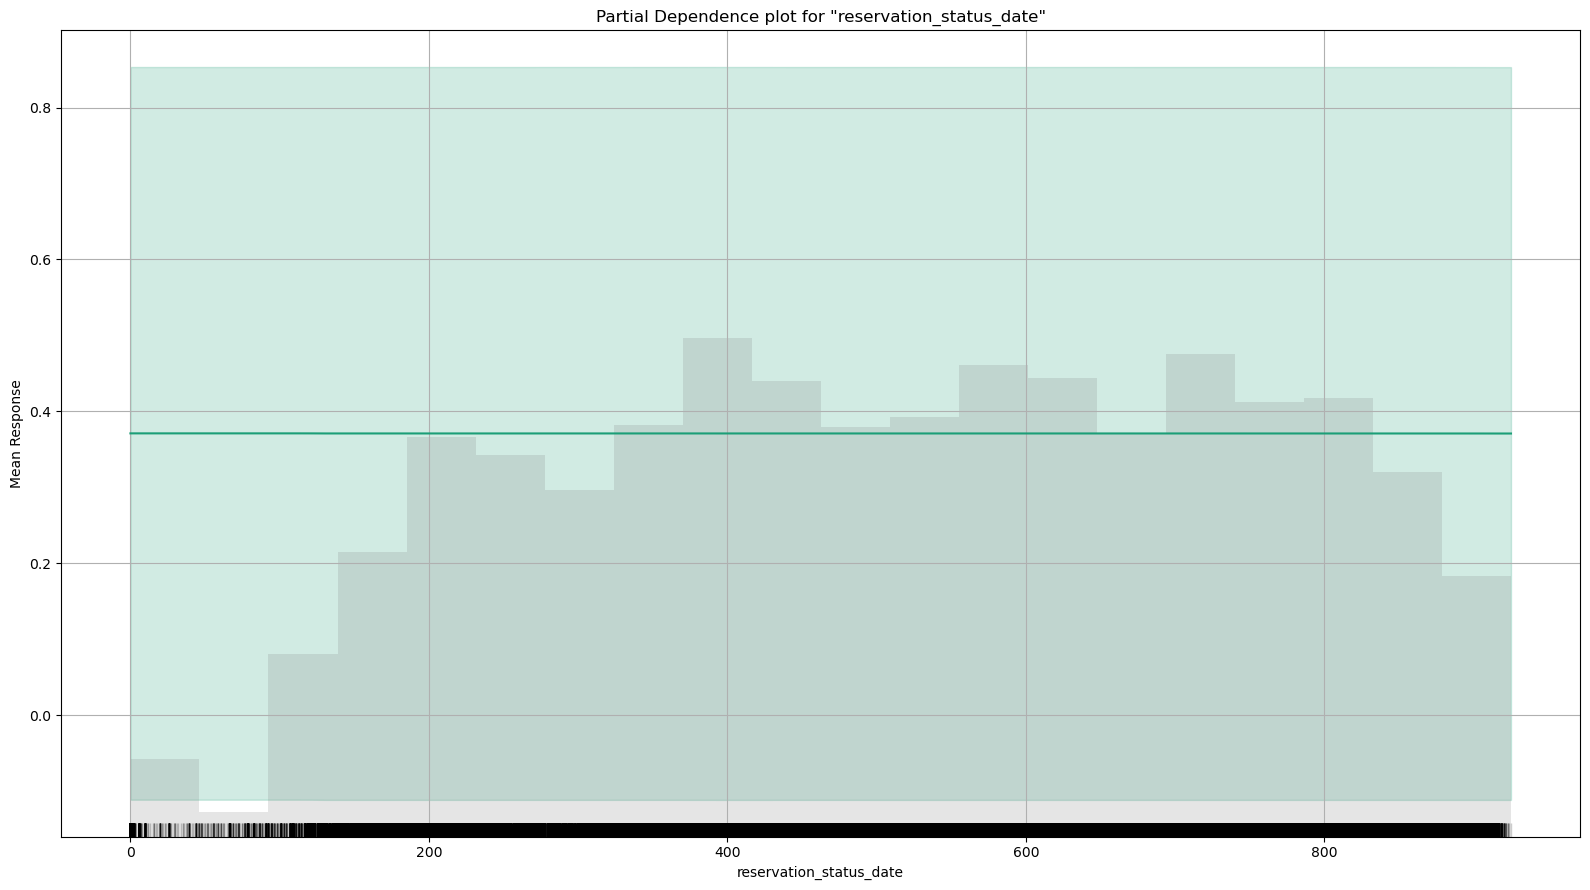

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20230329_193044

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9985882627559339
       0      1      Error    Rate
-----  -----  -----  -------  -------------
0      59858  0      0        (0.0/59858.0)
1      0      35283  0        (0.0/35283.0)
Total  59858  35283  0        (0.0/95141.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [52]:
aml.leader.explain(df_train)

## Interpreting Best Model from AutoML
### Residual Analysis
Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.
Variable Importance
In the variable importance plot we can observe that the plot replicates the results which we got from the Linear Model and Tree-Based Model above. The variable importance has been scaled between 0 to 1 for ease of understanding

### SHAP Summary
From the SHAP summary diagram, we can interpret a few conclusions -

All the features are listed as per their importance in making the prediction, that is reservation_status is more significant followed by deposit_type, and so on. Hence, arrival_date_year is the least significant predictor in our model.
The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see resrevation_status has the most impact on the hotel booking demand. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Hight amount of reservation status results in high hotel booking demand, a high amount of deposit type results in high booking demand, and so on. As we can see the distribution of red points in the reservation status feature is far more spread than the blue points. From this visual, we can interpret that the hotel booking demand vastly increases as the amount of reservation status increases. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on the hotel booking demand.
The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

### Partial Dependence Plot (PDP)
A partial dependence plot shows the marginal effect of a feature on the target (is_canceled in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - reservation_status & deposit_type.

1. As we can see that when the rest of the variables are kept constant and a marginal change is made in reservation_status, we can see the mean response increases. This could be interpreted as this range of reservation_status could be the deciding factor in the booking demand of hotel. 
2. Similarly when the rest of the variables are kept constant and a marginal change is made in deposit_type we can observe the mean response going up. Hence, it can be interpreted that this deposit_type is deciding factor in the booking demand of hotel.

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

### ICE (Individual Conditional Expectation) Plot
ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value.

Let us go back to the reservation_status and deposit_type features, as we interpreted in PDP hotel booking demand increases when reservation_status and deposit_type value is between 0.25 to 2 and 0.25 to 2 respectively. But is this true for every variable in the dataset? ICE plot has an answer to this question. As we can see in the ICE plot above the quality of a few variables(0th percentile instance) increases a lot in this range while the quality of a few doesn't change much(100th Percentile Instance).

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.

## References

1. [Regularization](https://harish-reddy.medium.com/regularization-in-python-699cfbad8622)
2. [SHAP Summary](https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454)
3. [AutoML](https://towardsdatascience.com/python-automl-sklearn-fd85d3b3c5e)
4. [Correlation-Analysis](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)
5. [OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html)
6. [AutoML](https://www.automl.org/automl/)

MIT License

Copyright (c) 2023 Naman Diwan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.